# ***TABLE OF CONTENTS***

*   **SECTION-1: DATA LOADING, INSTANCE CREATION, RENAMING COLUMNS**
    *   SECTION-1.1: DATASET LOADING
    *   SECTION-1.2: INSTANCE CREATION AND RENAMING COLUMNS

*   **SECTION-2: MISSING DATA REPORT AND CONVERTING UN-NECESSARY DATA TO NAN**
    *   SECTION-2.1: MORE DETAILED MISSING DATA REPORT
    *   SECTION-2.2: CONVERTING STRING(nan) INTO "NaN" IN "df_view"

*   **SECTION-3: CLEANING: TEXT TO WORD CONVERSION, ONE-HOT ENCODING, MEDIAN IMPUTATION OF AGE, DROP COLUMNS**
    *   SECTION-3.1: TEXT TO WORD CONVERSATION
    *   SECTION-3.2: DATA CLEANING AND ONE-HOT-ENCODING "SEX" COLUMN
    *   SECTION-3.3: DROP COLUMNS WITH MORE MISSING VALUES(NAN)

*   **SECTION-4: SEARCHING FOR BINARY COLUMNS AND MAPPING**
    *   SECTION-4.1: SEARCHING FOR BINARY COLUMN AND STORING AT `STRICTLY_YN_COLS`
    *   SECTION-4.2: BINARY MAPPING IN NEW DATA INSTANCE(`df_view_yn`)

*   **SECTION-5: COLUMN CATEGORIZATION AND VISUALIZATION**
    *   SECTION-5.1: CATEGORIZING COLUMNS AND VISUALIZING COLUMNS IN EACH COLUMN-TYPE

*   **SECTION-6: CLEANING AND MAPPING 13 "LIKERT COLUMNS"**
    *   SECTION-6.1: LIKERT SCALE DATA PREPARATION: UNIQUE VALUE IDENTIFICATION, STANDARDIZATION, AND MAPPING
        *   SECTION-6.1.1: DEFINE LIKERT VALUE STANDARDIZATION AND GROUPING MAP
        *   SECTION-6.1.1: APPLY LIKERT VALUE STANDARDIZATION AND GROUPING MAP
    *   SECTION-6.2: LIKERT COLUMNS NUMERICAL MAPPING IN NEW DATA INSTANCE `df_view_yn_likert`
    *   SECTION-6.3: IMPUTING MAPPED LIKERT COLUMNS USING RELATIONSHIPS WITH OTHER COLUMNS
        *   SECTION-6.3.1: RELATIONSHIP-1
        *   SECTION-6.3.2: RELATIONSHIP-2
        *   SECTION-6.3.3: RELATIONSHIP-3
    *   SECTION-6.4: ONE-HOT-ENCODING LIKERT COLUMNS (THOSE REMAINING WITH NaNs AFTER LOGICAL IMPUTATION)

*   **SECTION-7: NOMINAL COLUMNS CLEANING AND MAPPING**
    *   SECTION-7.1 - FULL NOMINAL COLUMNS CLEANING

*   **SECTION-8: ORDINAL COLUMNS**
    *   SECTION-8.1 : NEW DATA INSTANCE -> UNIQUE VALUE CHECKING
    *   SECTION-8.2: MAPPING ORDINAL COLUMNS
        *   SECTION-8.2.1: MAPPING `comp_empl_flag` (IMPORTANT)
        *   SECTION-8.2.2: MAPPING FOR QUANTITY/FREQUENCY REALTED TO PREVIOUS EMPLOYERS
    *   SECTION-8.3: IMPUTING NANs BY FINDING RELATIONSHIPS
        *   SECTION-8.3.1: ANALYSING RELATIONSHIPS OF `self_empl_flag` WITH OTHER COLUMNS IN `df_to_analye` AND `df_to_check`
        *   SECTION-8.3.2: RELATIONSHIP-1
        *   SECTION-8.3.3: RELATIONSHIP-2
        *   SECTION-8.3.4: RELATIONSHIP-3
    *   SECTION-8.4: MEDIAN IMPUTATION AND IMPUTING NANS WITH ONE HOT ENCODING

*   **SECTION-9: BINARY COLUMNS CLEANING WITH RELATIONSHIPS AND IMPUTATION**
    *   SECTION-9.1: RELATIONSHIP 1
    *   SECTION-9.2 : RELATIONSHIP 2
    *   SECTION-9.3: RELATIONSHIP 3
    *   SECTION 9.4 - IMPUTING NAN WITH ONE HOT ENCODING
        *   SECTION-9.4.1: IMPUTING ALL NAN BINARY COLUMNS WITH ONE-HOT-ENCODING, EXCEPT `tech_comp_flag` AND `mh_conseq_coworkers`
        *   SECTION-9.4.2: IMPUTING `tech_comp_flag` AND `mh_conseq_coworkers` SEPERATELY

#***SECTION-1: DATA LOADING, INSTANCE CREATION, RENAMING COLUMNS***

## ***SECTION-1.1: DATASET LOADING***

### Purpose and Conclusion

*   **Purpose:** This code block loads the dataset named `mental-heath-in-tech-2016_20161114.csv` into a pandas DataFrame (`df`). It then performs an initial exploration of the data by printing its shape, a summary of column information (`.info()`), and a list of all column names.
*   **Conclusion:** The dataset contains 1433 entries and 63 columns. It includes a mix of `int64`, `float64`, and `object` data types. Many columns have non-null counts lower than the total entries, indicating the presence of missing values. The column names are verbose and descriptive, reflecting the survey questions.


In [ ]:
# Import the main library we need for data analysis
import pandas as pd
import numpy as np # We'll use this for missing values

# --- Step 1: Load Your Dataset ---
# We're telling pandas to read the CSV file you uploaded.
# 'df' stands for 'DataFrame', which is like a smart spreadsheet.
file_name = 'mental-heath-in-tech-2016_20161114.csv'
df = pd.read_csv(file_name)

# --- Step 2: Explore Your Data ---
print("--- Step 2: Exploring the Data ---")

# .shape shows you (how many rows, how many columns)
print(f"Dataset shape (rows, columns): {df.shape}")
print("\n") # Adds a blank line

# .info() gives a summary of all columns, their data type, and missing values
print("Dataset info:")
df.info()
print("\n")

# .columns just lists all the column names
print("Column names:")
print(df.columns)
print("\n")

--- Step 2: Exploring the Data ---
Dataset shape (rows, columns): (1433, 63)


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                    

## ***SECTION-1.2: INSTANCE CREATION AND RENAMING COLUMNS***

### Purpose and Conclusion

*   **Purpose:** This block creates a copy of the original DataFrame (`df`) named `df_view` to preserve the raw data. It then renames all 63 columns in `df_view` to more concise and programmatic names defined in the `renamed_columns` list.
*   **Conclusion:** A new DataFrame `df_view` has been created, and all columns have been successfully renamed. This standardization makes the DataFrame easier to work with for subsequent data cleaning and analysis steps.

In [ ]:
#INSTANCE CREATION AND RENAMING COLUMNS
df_view = df.copy()
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                  'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']


# RENAMING THE COLUMNS WITH SIMPLE NAMES:
df_view.columns = renamed_columns

# -----------------------------------------------------------------------------------

# ***SECTION-2: MISSING DATA REPORT AND CONVERTING UN-NECESSARY DATA TO NAN***

## ***SECTION-2.1: MORE DETAILED MISSING DATA REPORT***


### Purpose and Conclusion

*   **Purpose:** This code block defines a comprehensive set of NA-like tokens and empty/whitespace-only strings in the DataFrame by converting them to `np.nan`. It then generates a detailed audit report for missing and 'dirty' data, showing counts and percentages of NaNs, empty strings, space-only strings, and NA-like tokens for each column.
*   **Conclusion:** The initial cleaning converted many non-standard missing values into `np.nan`. The audit revealed that several columns have a high percentage of missing values (e.g., `tech_role_flag` with 81.65% missing, `mh_coverage_flag2` with 79.97% missing). Columns like `why/why_not` and `why/why_not2` also have significant missing data after this step, confirming the need for further imputation or dropping these columns.

* TRIMMED EMPTY SPACES, EXAMPLE "YES " WITH "YES", ALSO CONVERTED NA-LIKE TOKENS INTO NaN

In [ ]:
# 1) MORE DETAILED MISSING DATA REPORT(TRIMMED EMPTY SPACES ex: "YES " with "YES")

# Define NA-like tokens often found in surveys
# list includes only values that are clearly not valid responses

na_like = {
    "na","n/a","none","not applicable","not applicable to me",
    "i dont know","i don't know","unsure","unknown","im not sure","i am not sure",
    "prefer not to say","no answer","no idea","na not currently aware","not eligible for coverage",
    "i'm not sure", "n/a (not currently aware)", "not applicable to me", "i wasn't aware of the options",
    "not asked", "n/a for that question", "not relevant", "doesn't apply", "not applicable here",
    "no answer provided", "i did not answer", "did not answer", "left blank", "blank response",
    "---", "...", "....", "-", "", " ", "  ", "n/a - i am self employed", "not applicable (self-employed)", "not applicable to self employed",
    "i don't have any", "no disorders", "no conditions", "no diagnosis", "not diagnosed",
    "i haven't been diagnosed", "no treatment", "not sought treatment", "i haven't sought treatment",
    "no family history", "none that i know of", "not applicable (not applicable)",
    "same reason", "see above", "too private", "bad idea", "depends", "not related to my qualifications or skills",
    "none of their business", "it depends", "depends on the illness", "seems unnecessary",
    "same as before", "same answer", "too early", "depends on the issue and the employer",
    "won't get the job", "disclosing that cannot help you get the job", "no comment",
    "i guess not",
    "not applicable to me (i do not have a mental illness)",
    "i am not sure it would hinder my place in the job", "it should not effect they way how i work. so it should not have any negative things for the new boss"
}

# Add more general non-informative phrases based on common survey responses
na_like.update({
    "prefer not to answer", "did not wish to answer", "response omitted", "no response", "left blank intentionally",
    "not applicable / left blank", "didn't answer", "skipped question", "no answer given", "not provided",
    "data not available", "information not provided", "not recorded", "missing data", "no information",
    "not relevant to me", "does not apply", "not applicable to this question", "no opinion", "can't say",
    "rather not say", "confidential", "private", "sensitive information", "redacted", "filtered",
    "not for publication", "internal use only", "not disclosed", "unavailable", "not collected",
    "not captured", "not entered", "no data", "no entry", "null", "void", "empty", "blank", "nothing",
    "zero", "0", "i forget", "don't remember", "can't recall", "unsure at the moment", "not determined",
    "pending", "to be confirmed", "unknown reason", "various reasons", "multiple reasons", "depends on circumstances",
    "situational", "case by case basis", "it varies", "subjective", "personal reasons", "other reasons",
    "miscellaneous", "etc.", "and so on", "listed above", "mentioned previously", "already stated",
    "as above", "per above", "refer to above", "see previous", "same as previous", "duplicate entry",
    "redundant", "not required", "optional", "voluntary", "skipped", "left blank (intentionally)",
    "left blank (unintentionally)", "error in data entry", "invalid entry", "corrupted data", "unreadable",
    "not parsed", "parsing error", "conversion error", "data type mismatch", "formatting issue",
    "syntax error", "technical error", "system error", "processing error", "calculation error",
    "not applicable (error)", "n/a (error)", "invalid response", "unacceptable response", "filtered out",
    "excluded", "removed", "deleted", "purged", "archived", "flagged", "marked for review", "under review",
    "pending clarification", "requires attention", "incomplete", "partial entry", "fragmented", "truncated",
    "cut off", "overflow", "underflow", "out of range", "not within parameters", "boundary issue",
    "edge case", "special case", "not standard", "non-standard", "atypical", "unusual", "unexpected",
    "anomalous", "outlier", "noise", "garbage", "junk", "irrelevant", "superfluous", "extraneous",
    "unnecessary", "redundant information", "duplicate information", "repeated entry", "copied",
    "pasted", "auto-filled", "default value", "placeholder", "test entry", "example", "sample",
    "dummy data", "filler", "not real", "fake", "bogus", "fabricated", "contrived", "made up",
    "fictitious", "imaginary", "hypothetical", "theoretical", "conceptual", "abstract", "vague",
    "general", "generic", "unspecified", "not specified", "undefined", "not defined", "null value",
    "empty value", "blank value", "zero value", "none value", "nan value", "na value", "n/a value",
    "not applicable value", "missing value", "unknown value", "invalid value", "useless value",
    "dirty value", "noise value", "garbage value", "junk value", "irrelevant value", "superfluous value",
    "extraneous value", "unnecessary value", "redundant information value", "duplicate information value",
    "repeated entry value", "copied value", "pasted value", "auto-filled value", "default value",
    "placeholder value", "test entry value", "example value", "sample value", "dummy data value",
    "filler value", "not real value", "fake value", "bogus value", "fabricated value", "contrived value",
    "made up value", "fictitious value", "imaginary value", "hypothetical value", "theoretical value",
    "conceptual value", "abstract value", "vague value", "general value", "generic value",
    "unspecified value", "not specified value", "undefined value", "not defined value",
    "not applicable (self-employed) value", "not applicable to self employed value", "i don't have any value",
    "no disorders value", "no conditions value", "no diagnosis value", "not diagnosed value",
    "i haven't been diagnosed value", "no treatment value", "not sought treatment value",
    "i haven't sought treatment value", "no family history value", "none that i know of value",
    "not applicable (not applicable) value", "prefer not to answer value", "did not wish to answer value",
    "response omitted value", "no response value", "left blank intentionally value",
    "not applicable / left blank value", "didn't answer value", "skipped question value",
    "no answer given value", "not provided value", "data not available value", "information not provided value",
    "not recorded value", "missing data value", "no information value", "not relevant to me value",
    "does not apply value", "not applicable to this question value", "no opinion value", "can't say value",
    "rather not say value", "confidential value", "private value", "sensitive information value",
    "redacted value", "filtered value", "not for publication value", "internal use only value",
    "not disclosed value", "unavailable value", "not collected value", "not captured value",
    "not entered value", "no data value", "no entry value", "i forget value", "don't remember value",
    "can't recall value", "unsure at the moment value", "not determined value", "pending value",
    "to be confirmed value", "unknown reason value", "various reasons value", "multiple reasons value",
    "depends on circumstances value", "situational value", "case by case basis value", "it varies value",
    "subjective value", "personal reasons value", "other reasons value", "miscellaneous value",
    "etc. value", "and so on value", "listed above value", "mentioned previously value",
    "already stated value", "as above value", "per above value", "refer to above value",
    "see previous value", "same as previous value", "duplicate entry value", "redundant value",
    "not required value", "optional value", "voluntary value", "skipped value",
    "left blank (intentionally) value", "left blank (unintentionally) value", "error in data entry value",
    "invalid entry value", "corrupted data value", "unreadable value", "not parsed value",
    "parsing error value", "conversion error value", "data type mismatch value", "formatting issue value",
    "syntax error value", "technical error value", "system error value", "processing error value",
    "calculation error value", "not applicable (error) value", "n/a (error) value", "invalid response value",
    "unacceptable response value", "filtered out value", "excluded value", "removed value", "deleted value",
    "purged value", "archived value", "flagged value", "marked for review value", "under review value",
    "pending clarification value", "requires attention value", "incomplete value", "partial entry value",
    "fragmented value", "truncated value", "cut off value", "overflow value", "underflow value",
    "out of range value", "not within parameters value", "boundary issue value", "edge case value",
    "special case value", "not standard value", "non-standard value", "atypical value", "unusual value",
    "unexpected value", "anomalous value", "outlier value", "noise value", "garbage value", "junk value",
    "irrelevant value", "superfluous value", "extraneous value", "unnecessary value",
    "redundant information value", "duplicate information value", "repeated entry value", "copied value",
    "pasted value", "auto-filled value", "default value", "placeholder value", "test entry value",
    "example value", "sample value", "dummy data value", "filler value", "not real value",
    "fake value", "bogus value", "fabricated value", "contrived value", "made up value",
    "fictitious value", "imaginary value", "hypothetical value", "theoretical value",
    "conceptual value", "abstract value", "vague value", "general value", "generic value",
    "unspecified value", "not specified value", "undefined value", "not defined value",

    'Same reason.',
    'Same reason as above.',
    'Same reasons.',
    'Same answer as for physical health issues...',
    'same thing: If it has impact or if it\'s visible at work...',
    'It would depend on the field & what I knew of the employer.',
    'It really depends on the person, the employer, and how comfortable I felt discussing the issue.',
    'Again, only if it could effect my job performance',
    'Depending on the exact nature of the issue I might think they wouldn\'t want to hire me',
    'In most regards it doesn\'t concern the employer, if it becomes an issue then I\'d be willing to discuss it.',
    'For me, it depends on how the interview is going - if it\'s clear that it\'s a dead end, I would not bring it up.',
    'If it got in the way of work, it if I needed some accommodation, I would, but, otherwise, it wouldn\'t seem worth it.',
    'If it would have a direct impact on my ability to perform the role I would feel compelled to mention it, but depending on how understanding I expected the employer to I might not...',
    'Only if it would affect my work somehow',
    'Also seems highly likely to be irrelevant at the point that I am in an interview.',
    'Too private.',
    "Don't know, feeling"

})


for c in df_view.columns:
    if df_view[c].dtype == object:
        s = df_view[c].astype(str).str.strip()
        df_view[c] = s.mask(s.str.lower().isin(na_like), np.nan)



# MISSING DATA AUDIT CODE

import pandas as pd
import numpy as np

# Configure display to show all columns and wide output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)


def count_empty_string(s):
    # exact empty string without trimming
    if s.dtype != object:
        return 0
    return (s == "").sum()

def count_space_only(s):
    # strings that are only spaces (e.g., "   ")
    if s.dtype != object:
        return 0
    return s.astype(str).str.fullmatch(r"\s+").sum()

def count_na_like(s):
    if s.dtype != object:
        return 0
    return s.astype(str).str.strip().str.lower().isin(na_like).sum()

def count_all_missing_like(s):
    # Combine NaN/None, empty string, space-only, NA-like texts
    is_nan = s.isna()
    is_empty = (s == "") if s.dtype == object else pd.Series(False, index=s.index)
    is_space_only = s.astype(str).str.fullmatch(r"\s+") if s.dtype == object else pd.Series(False, index=s.index)
    is_na_like = s.astype(str).str.strip().str.lower().isin(na_like) if s.dtype == object else pd.Series(False, index=s.index)
    any_missing_like = is_nan | is_empty | is_space_only | is_na_like
    return any_missing_like.sum(), any_missing_like.mean()

report_rows = []
for c in df_view.columns:
    s = df_view[c]
    n = len(s)
    n_nan = s.isna().sum()
    n_empty = count_empty_string(s)
    n_space = count_space_only(s)
    n_na_tokens = count_na_like(s)
    n_any, pct_any = count_all_missing_like(s)
    report_rows.append({
        "col": c,
        "dtype": str(s.dtype),
        "n_rows": n,
        "n_nan": n_nan,
        "n_empty_str": n_empty,
        "n_space_only": n_space,
        "n_na_like_tokens": n_na_tokens,
        "n_any_missing_like": n_any,
        "pct_any_missing_like": round(pct_any, 4)
    })

missing_audit = pd.DataFrame(report_rows).sort_values(
    ["pct_any_missing_like", "n_any_missing_like", "n_nan"], ascending=False
)

print("Missing/dirty data audit:")
print(missing_audit)

Missing/dirty data audit:
                                     col    dtype  n_rows  n_nan  n_empty_str  n_space_only  n_na_like_tokens  n_any_missing_like  pct_any_missing_like
3                         tech_role_flag  float64    1433   1170            0             0                 0                1170                0.8165
16                     mh_coverage_flag2  float64    1433   1146            0             0                 0                1146                0.7997
29                     prev_mh_anonimity   object    1433    860            0             0                 0                 860                0.6001
8                      mh_anonimity_flag   object    1433    742            0             0                 0                 742                0.5178
26            prev_mh_benefits_awareness   object    1433    582            0             0                 0                 582                0.4061
53           mh_eff_treat_impact_on_work   object    1433    5

## ***SECTION-2.2: CONVERTING STRING(nan) INTO "NaN" IN "df_view"***


### Purpose and Conclusion

*   **Purpose:** This code iterates through all `object` type columns in `df_view` and explicitly replaces string representations like `'nan'`, `'NaN'`, and `'NAN'` with the numerical `np.nan`. This ensures consistency in how missing values are represented, which is crucial for subsequent numerical operations and `isnull()` checks.
*   **Conclusion:** All string representations of 'nan' in object columns have been successfully converted to `np.nan`. This step further standardizes missing value representation, making the `isnull().sum()` output more accurate. The total missing values per column are now properly counted, showing a consolidated view of missingness.

In [ ]:
import numpy as np

# Iterate through columns with object dtype
for col in df_view.select_dtypes(include='object').columns:
    # Replace string 'nan' with np.nan
    df_view[col] = df_view[col].replace(['nan', 'NaN', 'NAN'], np.nan, regex=False)

print("String 'nan' replaced with np.nan in object columns.")

# Verify the changes by checking for null values again
print("\nTotal missing values per column after replacing 'nan' strings:")
print(df_view.isnull().sum())

String 'nan' replaced with np.nan in object columns.

Total missing values per column after replacing 'nan' strings:
self_empl_flag                             0
comp_no_empl                             287
tech_comp_flag                           287
tech_role_flag                          1170
mh_coverage_flag                         606
mh_coverage_awareness_flag               772
mh_employer_discussion                   390
mh_resources_provided                    607
mh_anonimity_flag                       1029
mh_medical_leave                         437
mh_discussion_neg_impact                 287
ph_discussion_neg_impact                 287
mh_discussion_cowork                     287
mh_discussion_supervis                   287
mh_eq_ph_employer                        780
mh_conseq_coworkers                      287
mh_coverage_flag2                       1146
mh_online_res_flag                      1146
mh_diagnosed&reveal_clients_flag        1247
mh_diagnosed&reveal_clients_

# -----------------------------------------------------------------------------------

#***SECTION-3: CLEANING: TEXT TO WORD CONVERSION, ONE-HOT ENCODING, MEDIAN IMPUTATION OF AGE, DROP COLUMNS***



## ***SECTION-3.1: TEXT TO WORD CONVERSATION***


### Purpose and Conclusion

*   **Purpose:** This code block cleans and standardizes specific text responses in two columns: `mh_bad_response_workplace` and `mh_coverage_flag`. It maps various phrases like "Yes, I experienced" to "Yes" and "Maybe/Not sure" or "Not eligible for coverage / N/A" to `np.nan`, reducing the number of unique categories and consolidating similar responses.
*   **Conclusion:** The `mh_bad_response_workplace` column was simplified from four unique values to `['No', 'Yes']` and `NaN` values. The `mh_coverage_flag` column was also simplified from three unique values to `['No', 'Yes']` and `NaN` values. This standardization is critical for preparing these categorical columns for numerical encoding.

In [ ]:
# Define the mapping for replacement for 'mh_bad_response_workplace'
mh_bad_response_replacement_map = {
    "Yes, I experienced": "Yes",
    "Yes, I observed": "Yes",
    "Maybe/Not sure": np.nan  # Convert to NaN
}

# Apply the replacement to the 'mh_bad_response_workplace' column
column_to_inspect_bad_response = 'mh_bad_response_workplace'
if column_to_inspect_bad_response in df_view.columns:
    print(f"\nUnique values for column '{column_to_inspect_bad_response}' BEFORE replacement:")
    unique_vals_before_bad_response = df_view[column_to_inspect_bad_response].dropna().unique()
    print(unique_vals_before_bad_response)

    df_view[column_to_inspect_bad_response] = df_view[column_to_inspect_bad_response].replace(mh_bad_response_replacement_map)

    print(f"\nUnique values for column '{column_to_inspect_bad_response}' AFTER replacement:")
    unique_vals_after_bad_response = df_view[column_to_inspect_bad_response].dropna().unique()
    print(unique_vals_after_bad_response)
else:
    print(f"\nColumn '{column_to_inspect_bad_response}' not found in df_view.")


# Define the mapping for replacement for 'mh_coverage_flag'
mh_coverage_replacement_map = {
    'No': 'No',
    'Yes': 'Yes',
    'Not eligible for coverage / N/A': np.nan # Map to NaN
}

# Apply the mapping to the 'mh_coverage_flag' column
column_to_inspect_coverage = 'mh_coverage_flag'
if column_to_inspect_coverage in df_view.columns:
    print(f"\nUnique values for column '{column_to_inspect_coverage}' BEFORE replacement:")
    unique_vals_before_coverage = df_view[column_to_inspect_coverage].dropna().unique()
    print(unique_vals_before_coverage)

    df_view[column_to_inspect_coverage] = df_view[column_to_inspect_coverage].replace(mh_coverage_replacement_map)

    print(f"\nUnique values for column '{column_to_inspect_coverage}' AFTER replacement:")
    unique_vals_after_coverage = df_view[column_to_inspect_coverage].dropna().unique()
    print(unique_vals_after_coverage)
else:
    print(f"\nColumn '{column_to_inspect_coverage}' not found in df_view.")


Unique values for column 'mh_bad_response_workplace' BEFORE replacement:
['No' 'Maybe/Not sure' 'Yes, I experienced' 'Yes, I observed']

Unique values for column 'mh_bad_response_workplace' AFTER replacement:
['No' 'Yes']

Unique values for column 'mh_coverage_flag' BEFORE replacement:
['Not eligible for coverage / N/A' 'No' 'Yes']

Unique values for column 'mh_coverage_flag' AFTER replacement:
['No' 'Yes']


## ***SECTION-3.2: DATA CLEANING AND ONE-HOT-ENCODING "SEX" COLUMN***


### Purpose and Conclusion

*   **Purpose:** This block performs extensive cleaning and standardization of the `sex` column, mapping numerous variations (e.g., 'Male', 'male', 'M', 'Cis male') into a few standardized categories ('Male', 'Female', 'Other', 'Prefer not to say'). It then applies one-hot encoding to create new binary columns for each `sex` category and converts these boolean columns to integers (0s and 1s). Additionally, it recodes `comp_no_empl`, `country_live`, and `country_work` for plotting ease and imputes outliers and NaNs in the `age` column using the median age within a reasonable range (18-75).
*   **Conclusion:** The `sex` column was successfully standardized into `Male`, `Female`, `Other`, and `Prefer not to say` and then one-hot encoded, creating `sex_Female`, `sex_Male`, `sex_Other`, `sex_Prefer not to say` columns. The `age` column was cleaned by replacing outliers (ages outside 18-75) and missing values with the median age of 33.0. Company size and country columns were also recoded for consistency, improving data quality and preparing these features for modeling.

In [ ]:
# Sex column are recoded (number of unique values = 70)
# Performing One-Hot Encoding for 'sex' column instead of ordinal encoding
# Use df_view as the DataFrame instance

# cleaning up the 'sex' column by standardizing values before one-hot encoding
# Let's use a basic standardization for robustness

sex_standardization_map = {
    'Male': 'Male', 'male': 'Male', 'Male ': 'Male', 'M': 'Male', 'm': 'Male',
    'man': 'Male', 'Cis male': 'Male', 'Male.': 'Male', 'male 9:1 female, roughly': 'Male', 'Male (cis)': 'Male', 'Man': 'Male', 'Sex is male': 'Male',
    'cis male': 'Male', 'Malr': 'Male', 'Dude': 'Male', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ": 'Prefer not to say', # Classify this as Prefer not to say
    'mail': 'Male', 'M|': 'Male', 'Male/genderqueer': 'Other', # Classify as Other
    'Cis Male': 'Male', 'Male (trans, FtM)': 'Male', # Classify as Male based on self-identification (FtM)
    'cisdude': 'Male', 'cis man': 'Male', 'MALE': 'Male',

    'Female': 'Female', 'female': 'Female', 'I identify as female.': 'Female', 'female ': 'Female',
    'Female assigned at birth ': 'Female', 'F': 'Female', 'Woman': 'Female', 'fm': 'Female', 'f': 'Female', 'Cis female ': 'Female', 'Transitioned, M2F': 'Female', # Classify as Female based on self-identification (M2F)
    'Genderfluid (born female)': 'Other', # Classify as Other
    'Female or Multi-Gender Femme': 'Other', # Classify as Other
    'Female ': 'Female', 'woman': 'Female', 'female/woman': 'Female',
    'Cisgender Female': 'Female', 'fem': 'Female', 'Female (props for making this a freeform field, though)': 'Female',
    ' Female': 'Female', 'Cis-woman': 'Female', 'female-bodied; no feelings about gender': 'Female',
    'AFAB': 'Female', # Assigned Female at Birth

    'Bigender': 'Other', 'non-binary': 'Other', 'Other/Transfeminine': 'Other',
    'Androgynous': 'Other', 'Other': 'Other', 'nb masculine': 'Other',
    'none of your business': 'Prefer not to say',
    'genderqueer': 'Other', 'Human': 'Other', 'Genderfluid': 'Other',
    'Enby': 'Other', 'genderqueer woman': 'Other', 'mtf': 'Other', # Classify as Other
    'Queer': 'Other', 'Agender': 'Other', 'Fluid': 'Other',
    'Nonbinary': 'Other', 'human': 'Other', 'Unicorn': 'Other', 'Genderqueer': 'Other',
    'Genderflux demi-girl': 'Other',
    'Transgender woman': 'Female', # Classify as Female based on self-identification

    # Handle NaN values - they will remain NaN
}
# Apply standardization mapping
df_view['sex'] = df_view['sex'].map(sex_standardization_map)

# Perform one-hot encoding on the standardized 'sex' column
df_view = pd.get_dummies(df_view, columns=['sex'], prefix='sex', dummy_na=False) # dummy_na=False to not create a column for NaN

# Convert boolean dummy columns to integer (0s and 1s)
sex_dummy_cols = [col for col in df_view.columns if col.startswith('sex_')]
for col in sex_dummy_cols:
    df_view[col] = df_view[col].astype(int)


# Recode Comp size & country columns (for ease when doing plots) - Keep this as is for now
df_view['comp_no_empl'] = df_view['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000')
df_view['country_live'] = df_view['country_live'].replace(to_replace = ['United States of America'], value = 'USA')
df_view['country_live'] = df_view['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK')
df_view['country_work'] = df_view['country_work'].replace(to_replace = ['United States of America'], value = 'USA')
df_view['country_work'] = df_view['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK')

# Age column imputation
# Max age is 323, min age is 3.
# There are outliers in age. Use median imputation instead of mean.
# Calculate the median age excluding outliers (e.g., ages outside a reasonable range like 18-75)
# Define a reasonable age range for calculating median
reasonable_age_min = 18
reasonable_age_max = 75

# Calculate the median age within the reasonable range
median_age = df_view[(df_view['age'] >= reasonable_age_min) & (df_view['age'] <= reasonable_age_max)]['age'].median()

# Replace outliers (ages outside the reasonable range) and NaN values with the calculated median age
# Identify outlier ages
outlier_ages = df_view[(df_view['age'] < reasonable_age_min) | (df_view['age'] > reasonable_age_max)]['age'].tolist()

# Replace outlier ages with the median age
df_view['age'] = df_view['age'].replace(to_replace = outlier_ages, value = median_age)

# Replace NaN values in 'age' with the median age
df_view['age'] = df_view['age'].fillna(median_age)

print("Age outliers replaced and NaN values imputed with median age.")
print("Sex column standardized and one-hot encoded to integers.")
print("Comp size and country columns recoded.")

# Display unique values and info for the modified columns
print("\nUnique values in 'age' after imputation:")
print(df_view['age'].unique())

print("\nInfo for 'sex' columns after one-hot encoding:")
# Print info for the new 'sex' dummy columns (assuming the standardized categories are Male, Female, Other, Prefer not to say)
sex_dummy_cols = [col for col in df_view.columns if col.startswith('sex_')]
df_view[sex_dummy_cols].info()

print("\nUnique values in 'comp_no_empl' after recoding:")
print(df_view['comp_no_empl'].unique())

# Print unique values of age after imputation
print(f"\nThe unique values of age after imputation: {df_view['age'].unique()}")

Age outliers replaced and NaN values imputed with median age.
Sex column standardized and one-hot encoded to integers.
Comp size and country columns recoded.

Unique values in 'age' after imputation:
[39 29 38 43 42 30 37 44 28 34 35 52 32 25 31 26 33 27 36 40 46 41 45 19
 21 24 23 22 51 48 55 50 49 20 54 47 56 57 63 61 62 53 58 66 59 65 74 70]

Info for 'sex' columns after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   sex_Female             1433 non-null   int64
 1   sex_Male               1433 non-null   int64
 2   sex_Other              1433 non-null   int64
 3   sex_Prefer not to say  1433 non-null   int64
dtypes: int64(4)
memory usage: 44.9 KB

Unique values in 'comp_no_empl' after recoding:
['26-100' '6-25' nan '>1000' '100-500' '500-1000' '1-5']

The unique values of age after imputation: [39 29 38 

## ***SECTION-3.3: DROP COLUMNS WITH MORE MISSING VALUES(NAN)***


### Purpose and Conclusion
*  **Purpose:** This section first generates a heatmap visualization to graphically represent the distribution of missing NaN values across all DataFrame columns. Following this, it identifies and drops columns where more than half of the observations are missing, aiming to reduce noise and improve computational efficiency for subsequent analysis.

* **Conclusion:** The heatmap provides a visual overview of missing data patterns, confirming significant missingness. Based on this, columns with more than 50% missing values were successfully identified and removed from the df_view DataFrame, ensuring that only features with sufficient data are retained for further processing.

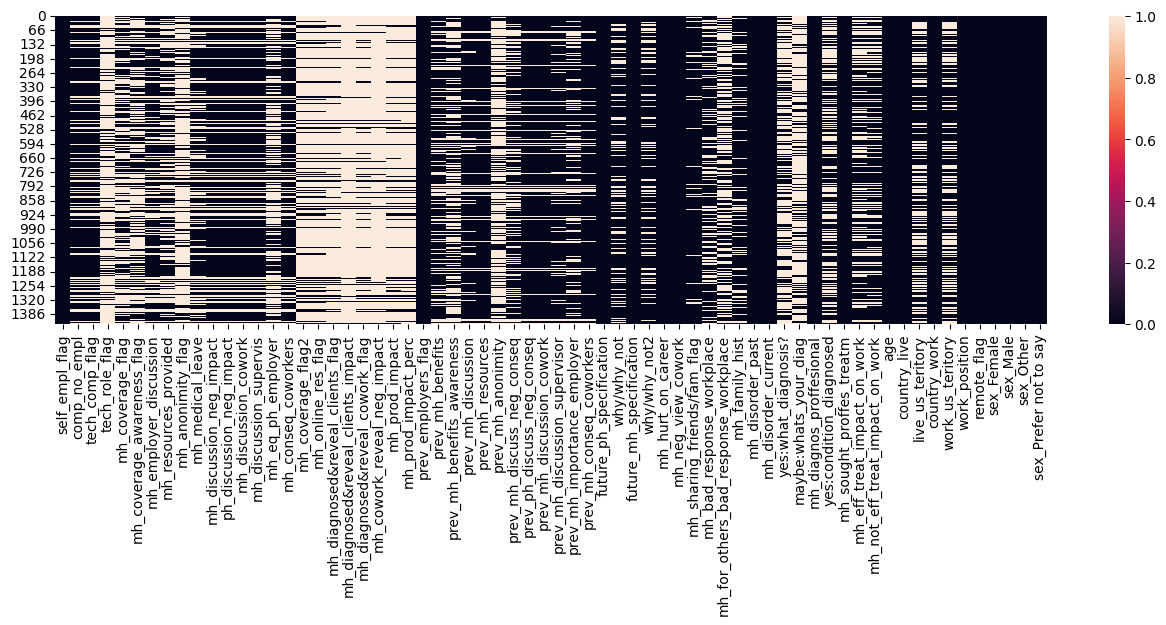

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns # Import seaborn

# ----------- MISSING VALUES -----------
# Missing values visualisation
plt.figure(figsize = (16,4))
sns.heatmap(data = df_view.isna());

In [ ]:
# The survey has 1433 rows, so first we will drop all columns where more than half of the observations have missing values
cols = (df_view.isna().sum() >= df_view.shape[0]/2).tolist()
to_drop = df_view.columns[cols]
df_view.drop(labels = to_drop, axis = 1, inplace = True)
print(f"The following columns were dropped: {to_drop}")
print(df_view.shape)

The following columns were dropped: Index(['tech_role_flag', 'mh_coverage_awareness_flag', 'mh_anonimity_flag', 'mh_eq_ph_employer', 'mh_coverage_flag2', 'mh_online_res_flag', 'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact', 'mh_prod_impact', 'mh_prod_impact_perc', 'prev_mh_benefits_awareness', 'prev_mh_anonimity', 'mh_for_others_bad_response_workplace', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'yes:condition_diagnosed'], dtype='object')
(1433, 48)


# -----------------------------------------------------------------------------------

# ***SECTION-4: SEARCHING FOR BINARY COLUMNS AND MAPPING***

## ***SECTION-4.1: SEARCHING FOR BINARY COLUMN AND STORING AT `STRICTLY_YN_COLS`***


### Purpose and Conclusion

*   **Purpose:** This code systematically identifies columns that exhibit a binary-like structure (i.e., containing only two non-NaN unique values, plus optional NaNs, within a predefined set of valid binary responses like 'yes', 'no', 0, 1). It first finds all columns with any binary-like values (`yn_cols`) and then filters them down to those with a *strictly* binary structure (`strictly_yn_cols`).
*   **Conclusion:** 15 columns were identified as having a strictly binary structure (including `self_empl_flag`, `tech_comp_flag`, `mh_coverage_flag`, `prev_employers_flag`, and the `sex_` dummy variables). These columns are suitable for direct numerical mapping (e.g., Yes/No to 1/0) or already represent binary states. No columns from the `yn_cols` list were excluded from `strictly_yn_cols`, meaning all initially identified binary-like columns passed the strict binary structure check.

In [ ]:
# Identify and list binary-like columns based on valid_binary_values_with_nan

import numpy as np
import pandas as pd

# Define valid binary values (case-insensitive for strings, and include 0 and 1, and NaN)
# Added more binary-like values for a more comprehensive set
valid_binary_values_with_nan = {
    'yes', 'no', 'y', 'n', 'true', 'false', 't', 'f', 1, 0, 1.0, 0.0, np.nan,
    'Yes', 'No', 'yeS', 'nO', 'YES', 'NO',
    '1', '0', # Added string representations of 0 and 1
    't.', 'f.', # Sometimes periods are included
    'y.', 'n.',
    'true.', 'false.'
}

# Function to check if a column contains only values within the valid_values_set (plus NaN)
def contains_only_valid_values(column_data, valid_values_set):
    unique_values = column_data.unique()
    return all(
        (pd.isna(val)) or  # Allow NaN
        (isinstance(val, str) and val.strip().lower() in {str(v).lower() for v in valid_values_set if isinstance(v, str)}) or # Case-insensitive and strip whitespace check for strings
        (not isinstance(val, str) and val in valid_values_set) # Direct check for non-strings
        for val in unique_values
    )

# --- Step 1: Find all binary-like columns in the entire dataset ---
# Populate yn_cols with column names where all unique values (excluding NaN) are in valid_binary_values_with_nan
yn_cols = []
print("Searching all columns for binary-like values...")
print("-" * 50)
for col in df_view.columns:
    if contains_only_valid_values(df_view[col], valid_binary_values_with_nan):
        yn_cols.append(col)
        # print(f"Column '{col}' contains only binary-like values. Unique values: {df_view[col].unique()}")
    # else:
        # Optionally print columns that do NOT contain only binary-like values
        # print(f"Column '{col}' contains non-binary-like values. Unique values: {df_view[col].unique()}")

print("-" * 50)
print(f"Initial yn_cols list (columns with only binary-like values):")
print(yn_cols)
print(f"Number of columns in initial yn_cols: {len(yn_cols)}")
print("-" * 50)


# --- Step 2: Second filtering stage on yn_cols (Check for strictly binary-like structure: 0, 1, or 2 non-NaN unique values) ---
# Create the new variable strictly_yn_cols
strictly_yn_cols = []
non_strictly_binary_in_yn_filtered = [] # Columns in yn_cols that are not strictly binary-like

print("\nPerforming second filtering stage on yn_cols for strictly binary-like structure...")
print("-" * 50)

def is_strictly_binary_structure(column_data, valid_values_set):
    unique_values = column_data.unique()
    non_nan_unique_values = [val for val in unique_values if pd.notna(val)]

    # Check if the number of non-NaN unique values is 0, 1, or 2 AND
    # if all non-NaN unique values are within the valid_values_set (case-insensitive for strings)
    if len(non_nan_unique_values) <= 2 and all(
        (pd.isna(val)) or  # Allow NaN
        (isinstance(val, str) and val.strip().lower() in {str(v).lower() for v in valid_values_set if isinstance(v, str)}) or
        (not isinstance(val, str) and val in valid_values_set)
        for val in unique_values # Check against original unique_values to include NaN handling
    ):
         return True
    else:
        return False


for col in yn_cols:
    if col in df_view.columns: # Should always be true since yn_cols came from df_view.columns
        if is_strictly_binary_structure(df_view[col], valid_binary_values_with_nan):
            strictly_yn_cols.append(col)
        else:
            non_strictly_binary_in_yn_filtered.append(col)
            print(f"Column '{col}' in yn_cols does NOT have a strictly binary-like structure (more than 2 non-NaN unique values). Unique values: {df_view[col].unique()}")
    # else:
        # print(f"Column '{col}' not found in the DataFrame (unexpected).")


print("-" * 50)
print(f"Strictly binary-like columns (strictly_yn_cols):")
print(strictly_yn_cols)
print(f"Number of strictly binary-like columns: {len(strictly_yn_cols)}")
print("-" * 50)

print(f"Columns in initial yn_cols that are NOT strictly binary-like (more than 2 non-NaN unique values):")
print(non_strictly_binary_in_yn_filtered)
print(f"Number of columns in initial yn_cols that are NOT strictly binary-like: {len(non_strictly_binary_in_yn_filtered)}")
print("-" * 50)

# Note: According to the logic, strictly_yn_cols will contain all columns from the dataset
# that have 0, 1, or 2 non-NaN unique values AND those values are in valid_binary_values_with_nan.
# This list is the result of the filtering process described.

Searching all columns for binary-like values...
--------------------------------------------------
--------------------------------------------------
Initial yn_cols list (columns with only binary-like values):
['self_empl_flag', 'tech_comp_flag', 'mh_coverage_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_conseq_coworkers', 'prev_employers_flag', 'mh_bad_response_workplace', 'mh_family_hist', 'mh_diagnos_proffesional', 'mh_sought_proffes_treatm', 'sex_Female', 'sex_Male', 'sex_Other', 'sex_Prefer not to say']
Number of columns in initial yn_cols: 15
--------------------------------------------------

Performing second filtering stage on yn_cols for strictly binary-like structure...
--------------------------------------------------
--------------------------------------------------
Strictly binary-like columns (strictly_yn_cols):
['self_empl_flag', 'tech_comp_flag', 'mh_coverage_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_conseq_coworkers', 'prev_emplo

## ***SECTION-4.2: BINARY MAPPING IN NEW DATA INSTANCE(df_view_yn)***

### Purpose and Conclusion

*   **Purpose:** This block creates a new DataFrame instance, `df_view_yn`, and then applies a numerical mapping (Yes/True/1 to 1, No/False/0 to 0) to all columns previously identified as `strictly_yn_cols`. This converts categorical binary responses into a numerical format suitable for machine learning models.
*   **Conclusion:** All 15 strictly binary columns in `df_view_yn` have been successfully mapped to numerical values (1 for 'Yes'-like responses and 0 for 'No'-like responses). The data types of many of these columns changed to `int64` or remained `object` (if they had NaNs, which pandas often keeps as object for mixed types). This prepares these features for direct use in numerical models.

In [ ]:
# Create a new instance of the DataFrame
df_view_yn = df_view.copy()

# Define mapping for strictly binary columns (case-insensitive for strings)
# Include all valid binary values from the valid_binary_values_with_nan set
binary_mapping = {
    'yes': 1, 'y': 1, 'true': 1, 't': 1, 1: 1, 1.0: 1,
    'no': 0, 'n': 0, 'false': 0, 'f': 0, 0: 0, 0.0: 0,
    '1': 1, '0': 0, # Added string representations of 0 and 1
    't.': 1, 'f.': 0, # Sometimes periods are included
    'y.': 1, 'n.': 0,
    'true.': 1, 'false.': 0
}

# Clean/Map the strictly binary columns
print("Cleaning strictly binary columns...")
for col in strictly_yn_cols:
    if col in df_view_yn.columns:
        # Apply the mapping. Use .loc to avoid SettingWithCopyWarning
        df_view_yn.loc[:, col] = df_view_yn[col].apply(
            lambda x: binary_mapping.get(str(x).lower() if isinstance(x, str) else x, x) if pd.notna(x) else np.nan
        )
        print(f"  Cleaned column: {col}")
    else:
        print(f"  Column '{col}' not found in df_view_yn.")


print("\nData types of the cleaned strictly binary columns:")
print(df_view_yn[strictly_yn_cols].dtypes)

Cleaning strictly binary columns...
  Cleaned column: self_empl_flag
  Cleaned column: tech_comp_flag
  Cleaned column: mh_coverage_flag
  Cleaned column: mh_employer_discussion
  Cleaned column: mh_resources_provided
  Cleaned column: mh_conseq_coworkers
  Cleaned column: prev_employers_flag
  Cleaned column: mh_bad_response_workplace
  Cleaned column: mh_family_hist
  Cleaned column: mh_diagnos_proffesional
  Cleaned column: mh_sought_proffes_treatm
  Cleaned column: sex_Female
  Cleaned column: sex_Male
  Cleaned column: sex_Other
  Cleaned column: sex_Prefer not to say

Data types of the cleaned strictly binary columns:
self_empl_flag                 int64
tech_comp_flag               float64
mh_coverage_flag              object
mh_employer_discussion        object
mh_resources_provided         object
mh_conseq_coworkers           object
prev_employers_flag            int64
mh_bad_response_workplace     object
mh_family_hist                object
mh_diagnos_proffesional       objec

# -----------------------------------------------------------------------------------

# ***SECTION-5: COLUMN CATEGORIZATION AND VISUALIZATION***



## ***SECTION-5.1: CATEGORIZING COLUMNS AND VISUALIZING COLUMNS IN EACH COLUMN-TYPE***

### Purpose and Conclusion
* **Purpose:** This section performs a comprehensive final categorization of all DataFrame columns into distinct types: Numerical (Ratio/Interval), Categorical Binary, Categorical Likert, Categorical Ordinal, Categorical Nominal, and Categorical Free Text. It filters these categories based on columns present in the current DataFrame `df_view_yn` and ensures all previously dropped columns are excluded. The process involves defining initial lists and then refining them by checking their presence and relationships within the dataset.

* **Conclusion:** All columns in the DataFrame have been successfully classified into appropriate data types, with no column left uncategorized. This systematic classification provides a clear overview of the data structure, which is crucial for guiding subsequent data cleaning, transformation, and model-building steps. The verification confirms that the total classified columns match the total number of columns in the DataFrame, indicating a complete and accurate categorization.


In [ ]:
# Final Column Categorization based on review and user feedback

import numpy as np
import pandas as pd

# Define the dropped columns list
dropped_columns = ['tech_role_flag', 'mh_coverage_awareness_flag', 'mh_anonimity_flag', 'mh_eq_ph_employer', 'mh_coverage_flag2', 'mh_online_res_flag', 'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact', 'mh_prod_impact', 'mh_prod_impact_perc', 'prev_mh_benefits_awareness', 'prev_mh_anonimity', 'mh_for_others_bad_response_workplace', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'yes:condition_diagnosed']

# Assuming df_view_yn is the current DataFrame after dropping columns and initial cleaning
all_current_cols = df_view_yn.columns.tolist()

# Initialize final categorized lists
numerical_cols_final = []
categorical_binary_cols_final = []
categorical_likert_cols_final = []
categorical_ordinal_cols_final = []
categorical_nominal_cols_final = []
categorical_free_text_cols_final = []

# --- Categorize based on definitions and presence in df_view_yn and not in dropped_columns ---

# Numerical (Ratio/Interval) - Based on previous analysis
numerical_cols_initial = ['age']
numerical_cols_final = [col for col in numerical_cols_initial if col in all_current_cols and col not in dropped_columns]

# Categorical - Binary - Based on previous analysis
binary_cols_initial = [
    'self_empl_flag', 'tech_comp_flag', 'mh_coverage_flag',
    'mh_employer_discussion', 'mh_resources_provided', 'mh_conseq_coworkers',
    'prev_employers_flag', 'mh_bad_response_workplace', 'mh_family_hist',
    'mh_diagnos_proffesional', 'mh_sought_proffes_treatm'
]
categorical_binary_cols_final = [col for col in binary_cols_initial if col in all_current_cols and col not in dropped_columns]


# Categorical - Likert - Based on previous analysis
likert_cols_initial = [
    'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact',
    'mh_discussion_cowork', 'mh_discussion_supervis', 'future_ph_specification',
    'future_mh_specification', 'mh_disorder_past', 'mh_disorder_current',
    'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
    'remote_flag', 'mh_sharing_friends/fam_flag'
]
categorical_likert_cols_final = [col for col in likert_cols_initial if col in all_current_cols and col not in dropped_columns]


# --- Identify Ordinal, Nominal, and Free Text from the remaining columns ---
# Start with all columns not yet classified
classified_cols_initial = (numerical_cols_final + categorical_binary_cols_final +
                           categorical_likert_cols_final)

remaining_cols_for_further_classification = [
    col for col in all_current_cols
    if col not in classified_cols_initial and col not in dropped_columns
]

# Replicate the logic from 5c08c0fa to identify potential categories within remaining columns
# Initialize temporary lists for refined categories within remaining_cols_for_further_classification
potential_ordinal_cols = []
potential_nominal_cols = []
potential_free_text_cols = []

# Define user-identified potential lists (filtered for presence in all_current_cols and not dropped)
user_defined_potential_ordinal_list = [
    'comp_no_empl', 'prev_mh_benefits', 'prev_mh_discussion', 'prev_mh_resources',
    'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
    'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor',
    'prev_mh_importance_employer', 'prev_mh_conseq_coworkers'
]
user_defined_potential_ordinal_list = [col for col in user_defined_potential_ordinal_list if col in all_current_cols and col not in dropped_columns]


user_defined_potential_nominal_list = [
    'mh_hurt_on_career', 'mh_neg_view_cowork', 'country_live',
    'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position',
    'sex_Female', 'sex_Male', 'sex_Other', 'sex_Prefer not to say'
]
user_defined_potential_nominal_list = [col for col in user_defined_potential_nominal_list if col in all_current_cols and col not in dropped_columns]


user_defined_potential_free_text_list = [
    'why/why_not', 'why/why_not2'
]
user_defined_potential_free_text_list = [col for col in user_defined_potential_free_text_list if col in all_current_cols and col not in dropped_columns]


# Populate the potential lists based on the user-defined lists and presence in remaining columns
potential_ordinal_cols = [col for col in user_defined_potential_ordinal_list if col in remaining_cols_for_further_classification]
potential_nominal_cols = [col for col in user_defined_potential_nominal_list if col in remaining_cols_for_further_classification]
potential_free_text_cols = [col for col in user_defined_potential_free_text_list if col in remaining_cols_for_further_classification]


# --- Final Assignment to Categories ---
# Assign columns from the potential lists to their final categories
categorical_ordinal_cols_final = potential_ordinal_cols
categorical_free_text_cols_final = potential_free_text_cols

# Any column in remaining_cols_for_further_classification that was NOT identified as Ordinal or Free Text
# is considered Nominal. Also include the user-specified nominal columns.
already_assigned_from_remaining = potential_ordinal_cols + potential_free_text_cols
remaining_as_nominal = [col for col in remaining_cols_for_further_classification if col not in already_assigned_from_remaining]

categorical_nominal_cols_final = [col for col in user_defined_potential_nominal_list if col in remaining_as_nominal] + remaining_as_nominal
# Remove duplicates in nominal list if any (shouldn't be if logic is correct, but safe)
categorical_nominal_cols_final = list(set(categorical_nominal_cols_final))


# Print the final categorized lists
print("--- Final Column Categorization (Updated with user-provided classifications) ---")
print("\nNumerical (Ratio/Interval) Columns:")
print(numerical_cols_final)
print(f"Count: {len(numerical_cols_final)}")

print("\nCategorical - Binary Columns:")
print(categorical_binary_cols_final)
print(f"Count: {len(categorical_binary_cols_final)}")


print("\nCategorical - Likert Columns:")
print(categorical_likert_cols_final)
print(f"Count: {len(categorical_likert_cols_final)}")

print("\nCategorical - Ordinal Columns:")
print(categorical_ordinal_cols_final)
print(f"Count: {len(categorical_ordinal_cols_final)}")


print("\nCategorical - Nominal Columns:")
print(categorical_nominal_cols_final)
print(f"Count: {len(categorical_nominal_cols_final)}")

print("\nCategorical - Free Text / Other Columns:")
print(categorical_free_text_cols_final)
print(f"Count: {len(categorical_free_text_cols_final)}")

# Verify that all columns from the dataframe are classified
total_classified_count = (len(numerical_cols_final) + len(categorical_binary_cols_final) +
                          len(categorical_likert_cols_final) + len(categorical_ordinal_cols_final) +
                          len(categorical_nominal_cols_final) + len(categorical_free_text_cols_final))

if total_classified_count == len(all_current_cols):
    print("\nVerification: Total classified columns match the total number of columns in the DataFrame.")
else:
    print(f"\nVerification Warning: Mismatch in total classified columns and total columns ({total_classified_count} vs {len(all_current_cols)}).")
    all_classified_set = set(numerical_cols_final + categorical_binary_cols_final +
                             categorical_likert_cols_final + categorical_ordinal_cols_final +
                             categorical_nominal_cols_final + categorical_free_text_cols_final)
    unclassified_check = [col for col in all_current_cols if col not in all_classified_set]
    print(f"Missed columns: {unclassified_check}")

--- Final Column Categorization (Updated with user-provided classifications) ---

Numerical (Ratio/Interval) Columns:
['age']
Count: 1

Categorical - Binary Columns:
['self_empl_flag', 'tech_comp_flag', 'mh_coverage_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_conseq_coworkers', 'prev_employers_flag', 'mh_bad_response_workplace', 'mh_family_hist', 'mh_diagnos_proffesional', 'mh_sought_proffes_treatm']
Count: 11

Categorical - Likert Columns:
['mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork', 'mh_discussion_supervis', 'future_ph_specification', 'future_mh_specification', 'mh_disorder_past', 'mh_disorder_current', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work', 'remote_flag', 'mh_sharing_friends/fam_flag']
Count: 13

Categorical - Ordinal Columns:
['comp_no_empl', 'prev_mh_benefits', 'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq', 'prev_mh_discussion

# -----------------------------------------------------------------------------------

# ***SECTION-6: CLEANING AND MAPPING 13 "LIKERT COLUMNS"***

## ***SECTION-6.1: LIKERT SCALE DATA PREPARATION: UNIQUE VALUE IDENTIFICATION, STANDARDIZATION, AND MAPPING***

### Purpose and Conclusion

*   **Purpose:** This section undertakes a multi-step process to prepare and standardize Likert scale columns for quantitative analysis. It begins with the **identification and collection of all unique response values**, followed by the **definition of a comprehensive standardization map** to group similar responses into consistent categories. Finally, this **standardization map is applied** to the DataFrame, ensuring all Likert features are uniformly represented.
*   **Conclusion:** Through careful unique value identification, detailed map definition, and precise application, all textual Likert scale responses have been successfully prepared and standardized. This systematic approach resolves inconsistencies and sets the stage for accurate numerical encoding and subsequent modeling.

In [ ]:
# Initialize an empty list called all_likert_unique_flat
all_likert_unique_flat = []

# Iterate through the list of column names in the final Likert classification
if 'categorical_likert_cols_final' in locals():
    print("Collecting unique values from all columns in categorical_likert_cols_final...")
    for col in categorical_likert_cols_final:
        # Check if the column exists in the DataFrame (using df_view_yn as it's the base before numerical mapping)
        if col in df_view_yn.columns:
            # Get unique values for the column, dropping NaN values
            unique_values = df_view_yn[col].dropna().unique()
            # Extend the all_likert_unique_flat list with the values from the current column's unique values
            all_likert_unique_flat.extend(unique_values)
            print(f"Collected unique values for column '{col}'.")
        else:
            print(f"Warning: Column '{col}' not found in df_view_yn.")

    # Convert the all_likert_unique_flat list into a set to get only the unique values
    unique_likert_values_set = set(all_likert_unique_flat)

    # Convert the set back into a list
    unique_likert_values = list(unique_likert_values_set)

    # Print the unique_likert_values list and the total number of unique values found
    print("\nUnique values across all Final Likert columns:")
    print(unique_likert_values)
    print(f"\nTotal number of unique values across all Final Likert columns: {len(unique_likert_values)}")
else:
    print("Error: categorical_likert_cols_final list not found. Please ensure cell f69dfd75 has been executed.")

Collected unique values for column 'mh_medical_leave'.
Collected unique values for column 'mh_discussion_neg_impact'.
Collected unique values for column 'ph_discussion_neg_impact'.
Collected unique values for column 'mh_discussion_cowork'.
Collected unique values for column 'mh_discussion_supervis'.
Collected unique values for column 'future_ph_specification'.
Collected unique values for column 'future_mh_specification'.
Collected unique values for column 'mh_disorder_past'.
Collected unique values for column 'mh_disorder_current'.
Collected unique values for column 'mh_eff_treat_impact_on_work'.
Collected unique values for column 'mh_not_eff_treat_impact_on_work'.
Collected unique values for column 'remote_flag'.
Collected unique values for column 'mh_sharing_friends/fam_flag'.

Unique values across all Final Likert columns:
['Sometimes', 'Rarely', 'Never', 'Very easy', 'Somewhat not open', 'Somewhat difficult', 'No', 'Maybe', 'Yes', 'Often', 'Always', 'Not open at all', 'Very difficu

In [ ]:
# Manually inspect the unique Likert values to identify similar responses and create a mapping for standardization.

# Define the mapping for grouping similar values
# The key is the value to be replaced, the value is the standardized value.

likert_grouping_map = {
    # Standardize variations of Ease/Difficulty scale
    'Very easy': 'Very easy', 'very easy': 'Very easy',
    'Somewhat easy': 'Somewhat easy', 'somewhat easy': 'Somewhat easy',
    'Neither easy nor difficult': 'Neither easy nor difficult', 'neither easy nor difficult': 'Neither easy nor difficult',
    'Somewhat difficult': 'Somewhat difficult', 'somewhat difficult': 'Somewhat difficult',
    'Very difficult': 'Very difficult', 'very difficult': 'Very difficult',

    # Standardize variations of Agreement scale
    'Yes': 'Yes', 'yes': 'Yes',
    'No': 'No', 'no': 'No',
    'Maybe': 'Maybe', 'maybe': 'Maybe',

    # Standardize variations in Frequency scale
    'Rarely': 'Rarely', 'rarely': 'Rarely',
    'Sometimes': 'Sometimes', 'sometimes': 'Sometimes',
    'Often': 'Often', 'often': 'Often',
    'Never': 'Never', 'never': 'Never',
    'Always': 'Always', 'always': 'Always',

    # Standardize variations in Sharing Openness scale (for mh_sharing_friends/fam_flag)
    'Not open at all': 'Not open at all', 'not open at all': 'Not open at all',
    'Somewhat not open': 'Somewhat not open', 'somewhat not open': 'Somewhat not open',
    'Neutral': 'Neutral', 'neutral': 'Neutral',
    'Somewhat open': 'Somewhat open', 'somewhat open': 'Somewhat open',
    'Very open': 'Very open', 'very open': 'Very open',

    # Handle potential misspellings or other variations if found during inspection
    # Example (if they existed):
    # 'very difficult.': 'Very difficult', # Example of handling punctuation
    # 'Ye s': 'Yes' # Example of handling extra spaces
}

# Print the created grouping structure
print("Likert Value Grouping Mapping (Updated):")
print(likert_grouping_map)

Likert Value Grouping Mapping (Updated):
{'Very easy': 'Very easy', 'very easy': 'Very easy', 'Somewhat easy': 'Somewhat easy', 'somewhat easy': 'Somewhat easy', 'Neither easy nor difficult': 'Neither easy nor difficult', 'neither easy nor difficult': 'Neither easy nor difficult', 'Somewhat difficult': 'Somewhat difficult', 'somewhat difficult': 'Somewhat difficult', 'Very difficult': 'Very difficult', 'very difficult': 'Very difficult', 'Yes': 'Yes', 'yes': 'Yes', 'No': 'No', 'no': 'No', 'Maybe': 'Maybe', 'maybe': 'Maybe', 'Rarely': 'Rarely', 'rarely': 'Rarely', 'Sometimes': 'Sometimes', 'sometimes': 'Sometimes', 'Often': 'Often', 'often': 'Often', 'Never': 'Never', 'never': 'Never', 'Always': 'Always', 'always': 'Always', 'Not open at all': 'Not open at all', 'not open at all': 'Not open at all', 'Somewhat not open': 'Somewhat not open', 'somewhat not open': 'Somewhat not open', 'Neutral': 'Neutral', 'neutral': 'Neutral', 'Somewhat open': 'Somewhat open', 'somewhat open': 'Somewhat o

In [ ]:
# Apply the grouping mapping to the Likert columns in df_view_yn
print("Applying Likert grouping mapping to columns...")
print("-" * 50)

# Iterate through the categorical_likert_cols_final list
for col in categorical_likert_cols_final:
    if col in df_view_yn.columns:
        # Use the .map() method with the likert_grouping_map
        # .map() will automatically handle NaN values (they will remain NaN)
        # For string values, convert to lowercase before mapping if your map keys are lowercase
        # Since our map has both original case and lowercase keys, .apply() with get is safer
        # to handle potential variations not explicitly in the lowercase keys.

        df_view_yn.loc[:, col] = df_view_yn[col].apply(
            lambda x: likert_grouping_map.get(str(x).lower() if isinstance(x, str) else x, x) if pd.notna(x) else np.nan
        )
        print(f"  Mapped column: {col}")
    else:
        print(f"  Column '{col}' not found in df_view_yn.")

print("\nUnique values in Likert columns after mapping:")
for col in categorical_likert_cols_final:
    if col in df_view_yn.columns:
        print(f"  '{col}': {df_view_yn[col].dropna().unique()}")

Applying Likert grouping mapping to columns...
--------------------------------------------------
  Mapped column: mh_medical_leave
  Mapped column: mh_discussion_neg_impact
  Mapped column: ph_discussion_neg_impact
  Mapped column: mh_discussion_cowork
  Mapped column: mh_discussion_supervis
  Mapped column: future_ph_specification
  Mapped column: future_mh_specification
  Mapped column: mh_disorder_past
  Mapped column: mh_disorder_current
  Mapped column: mh_eff_treat_impact_on_work
  Mapped column: mh_not_eff_treat_impact_on_work
  Mapped column: remote_flag
  Mapped column: mh_sharing_friends/fam_flag

Unique values in Likert columns after mapping:
  'mh_medical_leave': ['Very easy' 'Somewhat easy' 'Neither easy nor difficult' 'Very difficult'
 'Somewhat difficult']
  'mh_discussion_neg_impact': ['No' 'Maybe' 'Yes']
  'ph_discussion_neg_impact': ['No' 'Maybe' 'Yes']
  'mh_discussion_cowork': ['Maybe' 'Yes' 'No']
  'mh_discussion_supervis': ['Yes' 'Maybe' 'No']
  'future_ph_specif

## ***SECTION-6.2: LIKERT COLUMNS NUMERICAL MAPPING IN NEW DATA INSTANCE `df_view_yn_likert`***


### Purpose and Conclusion

*   **Purpose:** This code creates a new DataFrame, `df_view_yn_likert`, and defines numerical mappings for four distinct Likert scales: Ease/Difficulty (1-5), Frequency (1-5), Agreement (1-3), and Sharing Openness (1-5). It then applies these numerical mappings to the appropriate Likert columns in the DataFrame, converting qualitative responses into ordinal numerical data.
*   **Conclusion:** All 13 Likert columns in `df_view_yn_likert` have been successfully mapped to numerical ordinal scales (e.g., 'Very easy' -> 1, 'No' -> 1, 'Never' -> 1, 'Not open at all' -> 1, with increasing numbers representing higher/more positive responses). This converts qualitative survey responses into a quantifiable format, making them suitable for statistical analysis and machine learning models. The data types of these columns are now `object` (as they were before, pandas often defaults to object for mixed data types even if the values are floats after mapping, indicating further type conversion might be needed if not handled as part of later steps).

In [ ]:
import numpy as np
import pandas as pd

# Create a new DataFrame instance for cleaning Likert columns
# Use df_view_yn as the base since it has the binary columns mapped

df_view_yn_likert = df_view_yn.copy()

# Define numerical mappings for the different Likert scales

# Map 1: Ease/Difficulty
# Based on observed values: ['Very easy', 'Somewhat easy', 'Neither easy nor difficult', 'Somewhat difficult', 'Very difficult']
map_ease_difficulty = {
    'Very easy': 1,
    'Somewhat easy': 2,
    'Neither easy nor difficult': 3,
    'Somewhat difficult': 4,
    'Very difficult': 5
}

# Map 2: Frequency
# Based on observed values: ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
map_frequency = {
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Always': 5
}

# Map 3: Agreement
# Based on observed values: ['No', 'Maybe', 'Yes']
map_agreement = {
    'No': 1,
    'Maybe': 2,
    'Yes': 3
}

# Map 4: Sharing Openness (for 'mh_sharing_friends/fam_flag')
# Based on observed values: ['Somewhat open', 'Neutral', 'Very open', 'Not open at all', 'Somewhat not open']
# Order: 'Not open at all' < 'Somewhat not open' < 'Neutral' < 'Somewhat open' < 'Very open'
map_sharing_openness = {
    'Not open at all': 1,
    'Somewhat not open': 2,
    'Neutral': 3,
    'Somewhat open': 4,
    'Very open': 5
}


# Identify which Likert columns belong to which mapping
# Based on previous inspection of unique values and domain knowledge
ease_difficulty_cols = ['mh_medical_leave'] # Contains Ease/Difficulty terms
frequency_cols = [ # Contains Frequency terms
    'mh_eff_treat_impact_on_work',
    'mh_not_eff_treat_impact_on_work',
    'remote_flag' # Contains 'Sometimes', 'Never', 'Always'
]
agreement_cols = [ # Contains Yes/No/Maybe terms
    'mh_discussion_neg_impact',
    'ph_discussion_neg_impact',
    'mh_discussion_cowork',
    'mh_discussion_supervis',
    'future_ph_specification',
    'future_mh_specification',
    'mh_disorder_past',
    'mh_disorder_current'
]
sharing_openness_cols = ['mh_sharing_friends/fam_flag'] # Contains Sharing Openness terms


# Double check that all columns in categorical_likert_cols_final are assigned to a mapping
# Assuming categorical_likert_cols_final is correctly defined in a previous cell (f69dfd75)
all_assigned_cols = ease_difficulty_cols + frequency_cols + agreement_cols + sharing_openness_cols
# Ensure all columns in the Likert list from the final classification are covered
# This requires accessing the categorical_likert_cols_final list defined elsewhere.
# For robustness, let's list all columns intended to be mapped numerically as Likert.
all_likert_cols_to_map = [
    'mh_medical_leave',
    'mh_discussion_neg_impact',
    'ph_discussion_neg_impact',
    'mh_discussion_cowork',
    'mh_discussion_supervis',
    'future_ph_specification',
    'future_mh_specification',
    'mh_disorder_past',
    'mh_disorder_current',
    'mh_eff_treat_impact_on_work',
    'mh_not_eff_treat_impact_on_work',
    'remote_flag',
    'mh_sharing_friends/fam_flag' # Added the new column here
]

unassigned_likert_cols = [col for col in all_likert_cols_to_map if col not in all_assigned_cols]

if unassigned_likert_cols:
    print(f"Warning: The following Likert columns were not assigned to any mapping in this cell: {unassigned_likert_cols}")
else:
    print("All intended Likert columns assigned to a mapping in this cell.")


print("\nDefined numerical mappings for Likert scales.")
print("Identified columns for each mapping.")

# Apply the mappings to the respective columns in df_view_yn_likert
print("\nApplying mappings to df_view_yn_likert...")

# Apply Ease/Difficulty mapping
for col in ease_difficulty_cols:
    if col in df_view_yn_likert.columns:
        df_view_yn_likert.loc[:, col] = df_view_yn_likert[col].map(map_ease_difficulty)
        print(f"  Applied Ease/Difficulty mapping to '{col}'")
    else:
        print(f"  Column '{col}' not found for Ease/Difficulty mapping.")


# Apply Frequency mapping
for col in frequency_cols:
    if col in df_view_yn_likert.columns:
        df_view_yn_likert.loc[:, col] = df_view_yn_likert[col].map(map_frequency)
        print(f"  Applied Frequency mapping to '{col}'")
    else:
        print(f"  Column '{col}' not found for Frequency mapping.")

# Apply Agreement mapping
for col in agreement_cols:
    if col in df_view_yn_likert.columns:
        df_view_yn_likert.loc[:, col] = df_view_yn_likert[col].map(map_agreement)
        print(f"  Applied Agreement mapping to '{col}'")
    else:
        print(f"  Column '{col}' not found for Agreement mapping.")

# Apply Sharing Openness mapping
for col in sharing_openness_cols:
    if col in df_view_yn_likert.columns:
        df_view_yn_likert.loc[:, col] = df_view_yn_likert[col].map(map_sharing_openness)
        print(f"  Applied Sharing Openness mapping to '{col}'")
    else:
        print(f"  Column '{col}' not found for Sharing Openness mapping.")


print("\nMappings applied.")


print("\nData types of mapped Likert columns in df_view_yn_likert:")
print(df_view_yn_likert[all_likert_cols_to_map].dtypes)

All intended Likert columns assigned to a mapping in this cell.

Defined numerical mappings for Likert scales.
Identified columns for each mapping.

Applying mappings to df_view_yn_likert...
  Applied Ease/Difficulty mapping to 'mh_medical_leave'
  Applied Frequency mapping to 'mh_eff_treat_impact_on_work'
  Applied Frequency mapping to 'mh_not_eff_treat_impact_on_work'
  Applied Frequency mapping to 'remote_flag'
  Applied Agreement mapping to 'mh_discussion_neg_impact'
  Applied Agreement mapping to 'ph_discussion_neg_impact'
  Applied Agreement mapping to 'mh_discussion_cowork'
  Applied Agreement mapping to 'mh_discussion_supervis'
  Applied Agreement mapping to 'future_ph_specification'
  Applied Agreement mapping to 'future_mh_specification'
  Applied Agreement mapping to 'mh_disorder_past'
  Applied Agreement mapping to 'mh_disorder_current'
  Applied Sharing Openness mapping to 'mh_sharing_friends/fam_flag'

Mappings applied.

Data types of mapped Likert columns in df_view_yn_l

## ***SECTION-6.3: IMPUTING MAPPED LIKERT COLUMNS USING RELATIONSHIPS WITH OTHER COLUMNS***


### ***SECTION-6.3.1: RELATIONSHIP-1***



### Purpose and Conclusion

*   **Purpose:** This code performs conditional imputation for specific Likert columns related to an employer's practices. If `self_empl_flag` is 1 (meaning the respondent is self-employed), questions about an employer (like `mh_medical_leave`, `mh_discussion_neg_impact`, `ph_discussion_neg_impact`, `mh_discussion_cowork`, `mh_discussion_supervis`, and `remote_flag`) become 'not applicable'. Therefore, any NaNs in these columns for self-employed individuals are imputed with 0.
*   **Conclusion:** NaNs in employer-related Likert columns for self-employed individuals were successfully imputed with 0. For example, `mh_medical_leave` had 437 NaNs initially, and after this step, it reduced to 150 NaNs. `mh_discussion_neg_impact`, `ph_discussion_neg_impact`, `mh_discussion_cowork`, and `mh_discussion_supervis` now have 0 NaNs. This imputation appropriately handles 'not applicable' scenarios for self-employed respondents, ensuring numerical consistency.
*  REPLACING NAN'S WITH 0, WHICH MEANS NOT APPLICABLE/NO ANSWER

*  USING `self_empl_flag==1` TO IMPUTE NAN'S WITH ZERO EXCEPT FOR COLUMNS `mh_eff_treat_impact_on_work`, `mh_not_eff_treat_impact_on_work`, `mh_sharing_friends/fam_flag`(as they are not related to `self_empl_flag`)

In [ ]:
# The list of 13 columns from your code
all_likert_cols_to_map = [
    'mh_medical_leave',
    'mh_discussion_neg_impact',
    'ph_discussion_neg_impact',
    'mh_discussion_cowork',
    'mh_discussion_supervis',
    'future_ph_specification',
    'future_mh_specification',
    'mh_disorder_past',
    'mh_disorder_current',
    'mh_eff_treat_impact_on_work',
    'mh_not_eff_treat_impact_on_work',
    'remote_flag',
    'mh_sharing_friends/fam_flag'
]

# --- Check missing values BEFORE ---
print("--- Missing Values BEFORE Imputation (Self-Employed Logic) ---")
initial_missing_counts = df_view_yn_likert[all_likert_cols_to_map].isnull().sum()
print(initial_missing_counts)


# Define columns related to current employer where self_empl_flag = 1 logic is applicable for imputation
# Exclude: mh_eff_treat_impact_on_work, mh_not_eff_treat_impact_on_work, mh_sharing_friends/fam_flag
current_employer_context_cols_for_self_empl_imputation = [
    'mh_medical_leave',
    'mh_discussion_neg_impact',
    'ph_discussion_neg_impact',
    'mh_discussion_cowork',
    'mh_discussion_supervis',
    'remote_flag' # Still seems potentially related to current work arrangement
]

# applying the self-employed logic to NaNs in these specific columns if they have NaNs
cols_to_impute_self_employed = [col for col in current_employer_context_cols_for_self_empl_imputation if initial_missing_counts[col] > 0]


print("\nApplying logical imputation based on self_empl_flag to relevant columns with NaNs...")

# Apply imputation logic based on self_empl_flag
# If self_empl_flag is 1 (self-employed), these questions about an employer are not applicable.
imputation_condition_self_employed = (df_view_yn_likert['self_empl_flag'] == 1)

for col in cols_to_impute_self_employed:
    if col in df_view_yn_likert.columns:
        print(f"\nProcessing column '{col}' for self-employed imputation.")

        # Ensure column is numeric before fillna(0)
        df_view_yn_likert[col] = pd.to_numeric(df_view_yn_likert[col], errors='coerce')

        # Apply fillna(0) only to rows that meet the self-employed condition and are currently NaN in the column
        df_view_yn_likert.loc[imputation_condition_self_employed, col] = df_view_yn_likert.loc[imputation_condition_self_employed, col].fillna(0)

        print(f"  Imputed '{col}' with 0 for self-employed individuals.")

    else:
        print(f"  Column '{col}' not found in df_view_yn_likert. Skipping imputation.")


# --- Check missing values AFTER Self-Employed Logical Imputation ---
print("\n--- Missing Values AFTER Self-Employed Logical Imputation ---")
print(df_view_yn_likert[all_likert_cols_to_map].isnull().sum())

print("\nLogical imputation based on self_empl_flag complete.")
print("Remaining NaNs are left for later handling (including the no-previous-employer logic and OHE).")

--- Missing Values BEFORE Imputation (Self-Employed Logic) ---
mh_medical_leave                   437
mh_discussion_neg_impact           287
ph_discussion_neg_impact           287
mh_discussion_cowork               287
mh_discussion_supervis             287
future_ph_specification              0
future_mh_specification              0
mh_disorder_past                     0
mh_disorder_current                  0
mh_eff_treat_impact_on_work        557
mh_not_eff_treat_impact_on_work    468
remote_flag                          0
mh_sharing_friends/fam_flag        112
dtype: int64

Applying logical imputation based on self_empl_flag to relevant columns with NaNs...

Processing column 'mh_medical_leave' for self-employed imputation.
  Imputed 'mh_medical_leave' with 0 for self-employed individuals.

Processing column 'mh_discussion_neg_impact' for self-employed imputation.
  Imputed 'mh_discussion_neg_impact' with 0 for self-employed individuals.

Processing column 'ph_discussion_neg_impact'

### ***SECTION-6.3.2: RELATIONSHIP-2***  
* IMPUTING `mh_effect_treat_impact_on_work` BASED ON:
  * LOGIC 1: NO TREATMENT SOUGHT : IF `mh_sought_proffes_treatm = 0` → SET TO NA (QUESTION PRESUMES TREATMENT WAS SOUGHT).

  * LOGIC 2: NO CURRENT DISORDER : IF `mh_disorder_current = 0` AND `mh_disorder_past = 0` → NA (NO DISORDER TO TREAT/IMPACT).


  ### Purpose and Conclusion

*   **Purpose:** This section focuses on handling missing values in the `mh_eff_treat_impact_on_work` column. It employs a two-step imputation strategy: first, applying logical rules to set NaNs to 0 if the question is not applicable (e.g., if no treatment was sought or no mental health disorder exists). Second, any remaining NaNs after this logical imputation are filled using the median value of the column.
*   **Conclusion:** The `mh_eff_treat_impact_on_work` column has been successfully imputed. Initial conditional imputation addressed 'not applicable' cases by setting NaNs to 0 based on whether treatment was sought and if a disorder was present. Subsequent median imputation filled any residual NaNs. This ensures the column is fully prepared with numerical values for analysis.

In [ ]:
# Apply specific imputation logic for 'mh_eff_treat_impact_on_work':
# Rule 1: If mh_sought_proffes_treatm = 0, set to 0 (NA).
# Rule 2: If mh_disorder_current = 0 AND mh_disorder_past = 0, set to 0 (NA).
# Both conditions imply the question about treatment impact is not applicable.

print("Applying specific imputation logic for 'mh_eff_treat_impact_on_work'.")

column_to_impute = 'mh_eff_treat_impact_on_work'

if column_to_impute in df_view_yn_likert.columns:
    print(f"\nProcessing column '{column_to_impute}'.")

    # Ensure the related columns are in the DataFrame and are numeric
    if 'mh_sought_proffes_treatm' in df_view_yn_likert.columns and \
       'mh_disorder_current' in df_view_yn_likert.columns and \
       'mh_disorder_past' in df_view_yn_likert.columns:

        # Ensure these columns are numeric (they should be int/float after previous steps)
        df_view_yn_likert['mh_sought_proffes_treatm'] = pd.to_numeric(df_view_yn_likert['mh_sought_proffes_treatm'], errors='coerce')
        df_view_yn_likert['mh_disorder_current'] = pd.to_numeric(df_view_yn_likert['mh_disorder_current'], errors='coerce')
        df_view_yn_likert['mh_disorder_past'] = pd.to_numeric(df_view_yn_likert['mh_disorder_past'], errors='coerce')

        # Define the imputation conditions
        condition_no_treatment_sought = (df_view_yn_likert['mh_sought_proffes_treatm'] == 0)
        condition_no_disorder = (df_view_yn_likert['mh_disorder_current'] == 0) & \
                                (df_view_yn_likert['mh_disorder_past'] == 0)

        # Combine the conditions with OR
        combined_imputation_condition = condition_no_treatment_sought | condition_no_disorder

        # Ensure the target column is numeric before filling
        df_view_yn_likert[column_to_impute] = pd.to_numeric(df_view_yn_likert[column_to_impute], errors='coerce')


        # Apply fillna(0) only to rows that meet the combined condition and are currently NaN in the column
        df_view_yn_likert.loc[combined_imputation_condition, column_to_impute] = df_view_yn_likert.loc[combined_imputation_condition, column_to_impute].fillna(0)

        print(f"  Imputed '{column_to_impute}' with 0 based on treatment sought and disorder status.")

    else:
        print("  Required related columns ('mh_sought_proffes_treatm', 'mh_disorder_current', 'mh_disorder_past') not found. Skipping imputation.")

else:
    print(f"  Column '{column_to_impute}' not found in df_view_yn_likert. Skipping imputation.")


# --- Check missing values AFTER this specific imputation step ---
print("\n--- Missing Values AFTER Applying Specific mh_eff_treat_impact_on_work Imputation ---")
print(df_view_yn_likert[all_likert_cols_to_map].isnull().sum()) # Assuming all_likert_cols_to_map is defined

print("\nSpecific imputation for 'mh_eff_treat_impact_on_work' complete.")
print("Remaining NaNs are left for later handling (one-hot encoding).")

Applying specific imputation logic for 'mh_eff_treat_impact_on_work'.

Processing column 'mh_eff_treat_impact_on_work'.
  Imputed 'mh_eff_treat_impact_on_work' with 0 based on treatment sought and disorder status.

--- Missing Values AFTER Applying Specific mh_eff_treat_impact_on_work Imputation ---
mh_medical_leave                   150
mh_discussion_neg_impact             0
ph_discussion_neg_impact             0
mh_discussion_cowork                 0
mh_discussion_supervis               0
future_ph_specification              0
future_mh_specification              0
mh_disorder_past                     0
mh_disorder_current                  0
mh_eff_treat_impact_on_work         95
mh_not_eff_treat_impact_on_work    468
remote_flag                          0
mh_sharing_friends/fam_flag        112
dtype: int64

Specific imputation for 'mh_eff_treat_impact_on_work' complete.
Remaining NaNs are left for later handling (one-hot encoding).


#### ***MEDIAN IMPUTATION FOR mh_eff_treat_impact_on_work***

In [ ]:
# Perform Median Imputation for the remaining NaNs in 'mh_eff_treat_impact_on_work'.
# IMPORTANT: This step is done after the specific logical imputation rules have been applied in previous cells.

column_to_impute = 'mh_eff_treat_impact_on_work'

print(f"Performing median imputation for remaining NaNs in '{column_to_impute}'.")

if column_to_impute in df_view_yn_likert.columns:
    # Ensure the target column is numeric before calculating median and filling
    df_view_yn_likert[column_to_impute] = pd.to_numeric(df_view_yn_likert[column_to_impute], errors='coerce')

    # Calculate the median of the column, excluding NaNs
    median_value = df_view_yn_likert[column_to_impute].median()

    # Fill the remaining NaNs in the column with the calculated median
    df_view_yn_likert[column_to_impute] = df_view_yn_likert[column_to_impute].fillna(median_value)
    print(f"  Filled remaining NaNs in '{column_to_impute}' with median value ({median_value}).")

else:
    print(f"  Column '{column_to_impute}' not found in df_view_yn_likert. Skipping median imputation.")


# --- Check missing values AFTER median imputation for this column ---
print(f"\n--- Missing Values AFTER Median Imputation for '{column_to_impute}' ---")
print(df_view_yn_likert[column_to_impute].isnull().sum())

print(f"\nMedian imputation for '{column_to_impute}' complete.")
# Note: Missing values for other Likert columns are still present and will need separate handling.

Performing median imputation for remaining NaNs in 'mh_eff_treat_impact_on_work'.
  Filled remaining NaNs in 'mh_eff_treat_impact_on_work' with median value (2.0).

--- Missing Values AFTER Median Imputation for 'mh_eff_treat_impact_on_work' ---
0

Median imputation for 'mh_eff_treat_impact_on_work' complete.


### ***SECTION - 6.3.3: RELATIONSHIP-3***
* IMPUTING `mh_not_eff_treat_impact_on_work``



  * LOGIC-1: TREATMENT SOUGHT: IF `mh_sought_proffes_treatm = 1` → SET TO NA (QUESTION IS FOR THOSE WHO HAVE NOT SOUGHT)

  * LOGIC-2: NO DISORDER: IF `mh_disorder_current = 0` AND `mh_disorder_past = 0` → NA (NO DISORDER TO IMPACT WORK)

### Purpose and Conclusion

*   **Purpose:** This code applies specific logical imputation to the `mh_not_eff_treat_impact_on_work` column. It imputes NaNs with 0 if the respondent either *has* sought professional treatment (`mh_sought_proffes_treatm` == 1) OR if they have no current or past mental health disorder (`mh_disorder_current` == 0 AND `mh_disorder_past` == 0). These conditions imply the question about the impact of *ineffective treatment* is not applicable.
*   **Conclusion:** NaNs in `mh_not_eff_treat_impact_on_work` were conditionally imputed with 0 based on whether treatment was sought or if a disorder existed. The number of NaNs in this column reduced from 468 to 399. This imputation correctly handles 'not applicable' scenarios for individuals who sought treatment (and thus are not in the 'not effectively treated' group) or have no disorder.


In [ ]:
# Apply specific imputation logic for 'mh_not_eff_treat_impact_on_work':
# Rule 1: If mh_sought_proffes_treatm = 1, set to 0 (NA).
# Rule 2: If mh_disorder_current = 0 AND mh_disorder_past = 0, set to 0 (NA).
# Both conditions imply the question about treatment impact (when NOT treated effectively) is not applicable.

print("Applying specific imputation logic for 'mh_not_eff_treat_impact_on_work'.")

column_to_impute = 'mh_not_eff_treat_impact_on_work'

if column_to_impute in df_view_yn_likert.columns:
    print(f"\nProcessing column '{column_to_impute}'.")

    # Ensure the related columns are in the DataFrame and are numeric
    if 'mh_sought_proffes_treatm' in df_view_yn_likert.columns and \
       'mh_disorder_current' in df_view_yn_likert.columns and \
       'mh_disorder_past' in df_view_yn_likert.columns:

        # Ensure these columns are numeric (they should be int/float after previous steps)
        df_view_yn_likert['mh_sought_proffes_treatm'] = pd.to_numeric(df_view_yn_likert['mh_sought_proffes_treatm'], errors='coerce')
        df_view_yn_likert['mh_disorder_current'] = pd.to_numeric(df_view_yn_likert['mh_disorder_current'], errors='coerce')
        df_view_yn_likert['mh_disorder_past'] = pd.to_numeric(df_view_yn_likert['mh_disorder_past'], errors='coerce')


        # Define the imputation conditions
        condition_treatment_sought = (df_view_yn_likert['mh_sought_proffes_treatm'] == 1)
        condition_no_disorder = (df_view_yn_likert['mh_disorder_current'] == 0) & \
                                (df_view_yn_likert['mh_disorder_past'] == 0)

        # Combine the conditions with OR
        combined_imputation_condition = condition_treatment_sought | condition_no_disorder

        # Ensure the target column is numeric before filling
        df_view_yn_likert[column_to_impute] = pd.to_numeric(df_view_yn_likert[column_to_impute], errors='coerce')


        # Apply fillna(0) only to rows that meet the combined condition and are currently NaN in the column
        df_view_yn_likert.loc[combined_imputation_condition, column_to_impute] = df_view_yn_likert.loc[combined_imputation_condition, column_to_impute].fillna(0)

        print(f"  Imputed '{column_to_impute}' with 0 based on treatment sought and disorder status.")

    else:
        print("  Required related columns ('mh_sought_proffes_treatm', 'mh_disorder_current', 'mh_disorder_past') not found. Skipping imputation.")

else:
    print(f"  Column '{column_to_impute}' not found in df_view_yn_likert. Skipping imputation.")


# --- Check missing values AFTER this specific imputation step ---
print("\n--- Missing Values AFTER Applying Specific mh_not_eff_treat_impact_on_work Imputation ---")
print(df_view_yn_likert[all_likert_cols_to_map].isnull().sum()) # Assuming all_likert_cols_to_map is defined

print("\nSpecific imputation for 'mh_not_eff_treat_impact_on_work' complete.")
print("Remaining NaNs are left for later handling (one-hot encoding).")

Applying specific imputation logic for 'mh_not_eff_treat_impact_on_work'.

Processing column 'mh_not_eff_treat_impact_on_work'.
  Imputed 'mh_not_eff_treat_impact_on_work' with 0 based on treatment sought and disorder status.

--- Missing Values AFTER Applying Specific mh_not_eff_treat_impact_on_work Imputation ---
mh_medical_leave                   150
mh_discussion_neg_impact             0
ph_discussion_neg_impact             0
mh_discussion_cowork                 0
mh_discussion_supervis               0
future_ph_specification              0
future_mh_specification              0
mh_disorder_past                     0
mh_disorder_current                  0
mh_eff_treat_impact_on_work          0
mh_not_eff_treat_impact_on_work    399
remote_flag                          0
mh_sharing_friends/fam_flag        112
dtype: int64

Specific imputation for 'mh_not_eff_treat_impact_on_work' complete.
Remaining NaNs are left for later handling (one-hot encoding).


## ***SECTION - 6.4 : ONE-HOT-ENCODING LIKERT COLUMNS (THOSE REMAINING WITH NaNs AFTER LOGICAL IMPUTATION)***


### Purpose and Conclusion

*   **Purpose:** This block performs one-hot encoding for three specific Likert columns (`mh_medical_leave`, `mh_not_eff_treat_impact_on_work`, `mh_sharing_friends/fam_flag`) that still contained NaNs after logical imputations. It creates new binary columns for each unique value, *including* a separate column to indicate the presence of NaN values. These new boolean dummy columns are then converted to integers (0s and 1s).
*   **Conclusion:** The three specified Likert columns (`mh_medical_leave`, `mh_not_eff_treat_impact_on_work`, `mh_sharing_friends/fam_flag`) were successfully one-hot encoded. This process added 19 new integer columns (0s and 1s) to the DataFrame, with `_nan` columns explicitly capturing the missingness. The DataFrame's shape increased to `(1433, 64)`, indicating the addition of these new feature columns, effectively converting the remaining ordinal features with NaNs into a categorical representation.

In [ ]:
# Columns to be one-hot encoded (those remaining with NaNs after logical imputation)
cols_to_ohe = [
    'mh_medical_leave',
    'mh_not_eff_treat_impact_on_work',
    'mh_sharing_friends/fam_flag'
]

print(f"One-hot encoding the following columns: {cols_to_ohe}")

# Perform one-hot encoding
# Use df_view_yn_likert as the DataFrame
# prefix will be the column name
# dummy_na=True will create a column for NaN values
df_view_yn_likert_ohe = pd.get_dummies(df_view_yn_likert, columns=cols_to_ohe, prefix=cols_to_ohe, dummy_na=True)

# Convert the new dummy columns (which are boolean) to integer (0s and 1s)
ohe_dummy_cols_prefix = [col + '_' for col in cols_to_ohe]
ohe_dummy_cols = [col for col in df_view_yn_likert_ohe.columns if any(col.startswith(p) for p in ohe_dummy_cols_prefix)]

for col in ohe_dummy_cols:
    df_view_yn_likert_ohe[col] = df_view_yn_likert_ohe[col].astype(int)

print("\nOne-hot encoding complete.")
print(f"Shape of DataFrame after one-hot encoding: {df_view_yn_likert_ohe.shape}")

print("\nData types of the new one-hot encoded columns:")
# Filter for the new dummy columns to show their dtypes
newly_added_ohe_cols = [col for col in df_view_yn_likert_ohe.columns if col not in df_view_yn_likert.columns]
print(df_view_yn_likert_ohe[newly_added_ohe_cols].dtypes)

One-hot encoding the following columns: ['mh_medical_leave', 'mh_not_eff_treat_impact_on_work', 'mh_sharing_friends/fam_flag']

One-hot encoding complete.
Shape of DataFrame after one-hot encoding: (1433, 64)

Data types of the new one-hot encoded columns:
mh_medical_leave_0.0                   int64
mh_medical_leave_1.0                   int64
mh_medical_leave_2.0                   int64
mh_medical_leave_3.0                   int64
mh_medical_leave_4.0                   int64
mh_medical_leave_5.0                   int64
mh_medical_leave_nan                   int64
mh_not_eff_treat_impact_on_work_0.0    int64
mh_not_eff_treat_impact_on_work_1.0    int64
mh_not_eff_treat_impact_on_work_2.0    int64
mh_not_eff_treat_impact_on_work_3.0    int64
mh_not_eff_treat_impact_on_work_4.0    int64
mh_not_eff_treat_impact_on_work_nan    int64
mh_sharing_friends/fam_flag_1.0        int64
mh_sharing_friends/fam_flag_2.0        int64
mh_sharing_friends/fam_flag_3.0        int64
mh_sharing_friends/fam_

# -----------------------------------------------------------------------------------

#***SECTION-7: NOMINAL COLUMNS CLEANING AND MAPPING***

## ***SECTION-7.1 - FULL NOMINAL COLUMNS CLEANING***


### Purpose and Conclusion

*   **Purpose:** This comprehensive cleaning block handles several nominal columns. It starts by creating a new DataFrame `df_view_yn_lik_nom`. It filters the data to include only rows where respondents live and work in one of the top 6 specified countries, then drops US state/territory columns. For `work_position`, it imputes NaNs with 'Not_Reported', multi-hot encodes positions (creating `role_` columns for tech-related roles), and derives a `tech_flag`. Finally, it imputes NaNs in `mh_hurt_on_career` and `mh_neg_view_cowork` with 'Not Reported' and one-hot encodes these and the country columns.
*   **Conclusion:** The DataFrame was significantly transformed. Rows not in the top 6 countries were removed, reducing the dataset to 1235 entries. `live_us_teritory` and `work_us_teritory` were dropped. `work_position` was multi-hot encoded into 8 `role_` columns (e.g., `role_developer`, `role_sysadmin`), and a `tech_flag` was created. `mh_hurt_on_career` and `mh_neg_view_cowork` had NaNs imputed with 'Not Reported'. `country_live`, `country_work`, `mh_hurt_on_career`, and `mh_neg_view_cowork` were one-hot encoded, expanding the DataFrame to `(1235, 88)`. This creates a robust set of numerical features from the original nominal data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import warnings

# Suppress the specific FutureWarning related to sparse data type setting
warnings.filterwarnings("ignore", category=FutureWarning, module='pandas')


# Starting DataFrame: df_view_yn_likert
# Final DataFrame: df_view_yn_lik_nom

# 1. Create a New Instance
print("Step 1: Creating a new DataFrame instance...")
df_view_yn_lik_nom = df_view_yn_likert_ohe.copy()
print("New DataFrame 'df_view_yn_lik_nom' created.")

# Show initial NaN values for territory columns before any filtering
print("\nInitial NaN values in territory columns (before any filtering):")
territory_cols_to_check = ['live_us_teritory', 'work_us_teritory']
display(df_view_yn_lik_nom[territory_cols_to_check].isnull().sum())


# 2. Clean Country Columns (Filtering)
print("\nStep 2: Cleaning Country Columns (Filtering)...")
# Define the list of top 6 countries based on previous analysis
top_6_countries = ['USA', 'UK', 'Canada', 'Germany', 'Netherlands', 'Australia']

# Filter the DataFrame to keep only rows where respondent lives AND works in one of the top 6 countries
initial_rows = df_view_yn_lik_nom.shape[0]
df_view_yn_lik_nom = df_view_yn_lik_nom[
    df_view_yn_lik_nom['country_live'].isin(top_6_countries) &
    df_view_yn_lik_nom['country_work'].isin(top_6_countries)
].copy() # Use .copy() to avoid SettingWithCopyWarning
filtered_rows = df_view_yn_lik_nom.shape[0]
print(f"Filtered to keep rows where respondent lives AND works in: {top_6_countries}")
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after filtering: {filtered_rows}")
print(f"Number of rows removed: {initial_rows - filtered_rows}")

# Show NaN values for territory columns AFTER country filtering but BEFORE dropping
print("\nNaN values in territory columns AFTER country filtering (before dropping):")
# Filter again for territory columns in the potentially reduced DataFrame
if not df_view_yn_lik_nom.filter(items=territory_cols_to_check).empty:
    display(df_view_yn_lik_nom[territory_cols_to_check].isnull().sum())
else:
    print("  Territory columns are no longer in the DataFrame after initial filtering.")


# 3. Drop Territory Columns
print("\nStep 3: Dropping Territory Columns...")
# Ensure columns exist before trying to drop
territory_cols_exist = [col for col in territory_cols_to_check if col in df_view_yn_lik_nom.columns]
if territory_cols_exist:
    df_view_yn_lik_nom.drop(labels=territory_cols_exist, axis=1, inplace=True)
    print(f"  Dropped columns: {territory_cols_exist}")
else:
    print("  Territory columns were already removed in a previous step.")

print(f"Current shape of DataFrame: {df_view_yn_lik_nom.shape}")


# 4. Clean work_position (Hybrid Approach)
print("\nStep 4: Cleaning 'work_position' column...")
work_position_col = 'work_position'

# Impute NaN values with 'Not_Reported'
df_view_yn_lik_nom.loc[:, work_position_col] = df_view_yn_lik_nom[work_position_col].fillna('Not_Reported')
print(f"  Imputed NaN values in '{work_position_col}' with 'Not_Reported'.")

# Multi-Hot Encode using CountVectorizer
print("  Applying Multi-Hot Encoding to 'work_position'...")
# Replace '|' separator with a space for CountVectorizer to treat each role as a separate token
df_view_yn_lik_nom.loc[:, work_position_col] = df_view_yn_lik_nom[work_position_col].str.replace('|', ' ', regex=False)

# Initialize CountVectorizer
# token_pattern=r'\b[a-zA-Z0-9_-]+\b' ensures single words are tokens.
# We will filter for tech-related roles AFTER encoding.
vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Z0-9_-]+\b')

# Fit and transform the 'work_position' column
work_position_encoded = vectorizer.fit_transform(df_view_yn_lik_nom[work_position_col])

# Create a DataFrame from the encoded data
# Using .toarray() for explicit dense representation before filtering and type conversion
work_position_encoded_df = pd.DataFrame(work_position_encoded.toarray(), columns=vectorizer.get_feature_names_out(), index=df_view_yn_lik_nom.index)


# Identify tech-related role columns (based on column names after encoding)
# Keep only tech-related roles to reduce column count
# Broadened list of tech keywords
tech_role_keywords_refined = [
    'developer', 'dev', 'engineer', 'sysadmin', 'support', 'analyst',
    'architect', 'data', 'science', 'security', 'it', 'web', 'mobile',
    'programmer', 'consultant', 'manager', 'lead', 'director', 'cto', 'vp',
    'designer', # Added designer as it's often tech-related in this context
    'qa', 'tester', 'frontend', 'backend', 'fullstack', 'cloud', 'network',
    'database', 'admin', 'specialist', 'scientist', 'machine', 'learning',
    'ai', 'ml', 'product', 'project', 'scrum', 'agile', 'ux', 'ui', 'research',
    'analyst', 'specialist', 'technician', 'expert', 'architect', 'lead', 'head', 'chief'

]

tech_role_cols = [col for col in work_position_encoded_df.columns if any(tech_word in col for tech_word in tech_role_keywords_refined)]

# Select only the tech-related role columns
# Ensure we only select columns that actually exist in the encoded DataFrame
tech_role_cols_present = [col for col in tech_role_cols if col in work_position_encoded_df.columns]
work_position_encoded_df_tech = work_position_encoded_df[tech_role_cols_present].copy()


# Rename columns to indicate they are roles
work_position_encoded_df_tech.columns = ['role_' + col for col in work_position_encoded_df_tech.columns]
print(f"  Created {work_position_encoded_df_tech.shape[1]} new tech-related role columns.")

# Ensure multi-hot encoded values are strictly 0 or 1
# The .astype(int) conversion after checking > 0 is the robust way to ensure binary
for col in work_position_encoded_df_tech.columns:
    work_position_encoded_df_tech.loc[:, col] = (work_position_encoded_df_tech[col] > 0).astype(int) # Ensure binary 0 or 1
print("  Ensured multi-hot encoded values are strictly 0 or 1.")


# Concatenate the new tech role columns to the main DataFrame
df_view_yn_lik_nom = pd.concat([df_view_yn_lik_nom, work_position_encoded_df_tech], axis=1)
print("  Concatenated new tech role columns to the DataFrame.")


# Feature Engineer 'tech_flag'
print("  Creating 'tech_flag' column...")
# The 'tech_flag' is 1 if any of the new tech role columns is 1
tech_flag_cols = [col for col in df_view_yn_lik_nom.columns if col.startswith('role_')]

if tech_flag_cols:
    df_view_yn_lik_nom.loc[:, 'tech_flag'] = df_view_yn_lik_nom[tech_flag_cols].max(axis=1).astype(int) # Ensure int type
    print(f"  Created 'tech_flag' based on presence in tech roles.")
else:
    df_view_yn_lik_nom.loc[:, 'tech_flag'] = 0 # If no tech roles are found
    print("  No tech-related role columns available for 'tech_flag'. 'tech_flag' set to 0 for all rows.")


# Drop the original 'work_position' column
df_view_yn_lik_nom.drop(labels=[work_position_col], axis=1, inplace=True)
print(f"  Dropped the original '{work_position_col}' column.")
print(f"Current shape of DataFrame: {df_view_yn_lik_nom.shape}")


# 5. Clean & Encode Final Columns
print("\nStep 5: Cleaning and Encoding Final Nominal Columns...")

# Impute NaN values in the specified columns with 'Not Reported'
cols_to_impute = ['mh_hurt_on_career', 'mh_neg_view_cowork']
for col in cols_to_impute:
     if col in df_view_yn_lik_nom.columns:
         df_view_yn_lik_nom.loc[:, col] = df_view_yn_lik_nom[col].fillna('Not Reported')
         print(f"  Imputed NaN values in '{col}' with 'Not Reported'.")
     else:
         print(f"  Column '{col}' not found for imputation.")


# One-Hot Encode remaining text columns
# The remaining text columns should be country_live, country_work, mh_hurt_on_career, mh_neg_view_cowork
# Let's confirm which of these are still object type in the DataFrame
cols_to_onehot = [
    col for col in ['country_live', 'country_work', 'mh_hurt_on_career', 'mh_neg_view_cowork']
    if col in df_view_yn_lik_nom.columns and df_view_yn_lik_nom[col].dtype == 'object'
]

if cols_to_onehot:
    print(f"  Applying One-Hot Encoding to columns: {cols_to_onehot}")
    # Explicitly cast boolean result of get_dummies to int to avoid FutureWarning
    onehot_encoded_df = pd.get_dummies(df_view_yn_lik_nom[cols_to_onehot], drop_first=False, dummy_na=False).astype(int)
    # Drop original columns before concatenating
    df_view_yn_lik_nom = df_view_yn_lik_nom.drop(labels=cols_to_onehot, axis=1)
    # Concatenate the one-hot encoded columns
    df_view_yn_lik_nom = pd.concat([df_view_yn_lik_nom, onehot_encoded_df], axis=1)
    print("  One-Hot Encoding applied.")
else:
    print("  No remaining text columns found for One-Hot Encoding.")


print("\nNominal column cleaning and encoding complete.")
print(f"Final shape of 'df_view_yn_lik_nom': {df_view_yn_lik_nom.shape}")

Step 1: Creating a new DataFrame instance...
New DataFrame 'df_view_yn_lik_nom' created.

Initial NaN values in territory columns (before any filtering):


,0
live_us_teritory,593
work_us_teritory,582



Step 2: Cleaning Country Columns (Filtering)...
Filtered to keep rows where respondent lives AND works in: ['USA', 'UK', 'Canada', 'Germany', 'Netherlands', 'Australia']
Initial number of rows: 1433
Number of rows after filtering: 1235
Number of rows removed: 198

NaN values in territory columns AFTER country filtering (before dropping):


,0
live_us_teritory,398
work_us_teritory,391



Step 3: Dropping Territory Columns...
  Dropped columns: ['live_us_teritory', 'work_us_teritory']
Current shape of DataFrame: (1235, 62)

Step 4: Cleaning 'work_position' column...
  Imputed NaN values in 'work_position' with 'Not_Reported'.
  Applying Multi-Hot Encoding to 'work_position'...
  Created 8 new tech-related role columns.
  Ensured multi-hot encoded values are strictly 0 or 1.
  Concatenated new tech role columns to the DataFrame.
  Creating 'tech_flag' column...
  Created 'tech_flag' based on presence in tech roles.
  Dropped the original 'work_position' column.
Current shape of DataFrame: (1235, 70)

Step 5: Cleaning and Encoding Final Nominal Columns...
  Imputed NaN values in 'mh_hurt_on_career' with 'Not Reported'.
  Imputed NaN values in 'mh_neg_view_cowork' with 'Not Reported'.
  Applying One-Hot Encoding to columns: ['country_live', 'country_work', 'mh_hurt_on_career', 'mh_neg_view_cowork']
  One-Hot Encoding applied.

Nominal column cleaning and encoding complete

# -----------------------------------------------------------------------------------

# ***SECTION-8: ORDINAL COLUMNS***

## ***SECTION-8.1 : NEW DATA INSTANCE -> UNIQUE VALUE CHECKING***

### Purpose and Conclusion

*   **Purpose:** This section initiates the processing of ordinal columns by first creating a new DataFrame instance (`df_view_yn_lik_nom_ord`) to maintain data integrity from previous steps. Subsequently, it identifies and collects all unique values present across these designated ordinal columns. This step is crucial for understanding the range and nature of responses, which is a prerequisite for defining appropriate numerical mappings.
*   **Conclusion:** A new DataFrame (`df_view_yn_lik_nom_ord`) was successfully created for dedicated ordinal column processing. All unique non-null values from the columns classified as ordinal have been identified and listed, providing a comprehensive overview necessary for developing accurate and consistent numerical mappings in subsequent steps.

In [ ]:
# Create new data instance for Ordinal column cleaning
df_view_yn_lik_nom_ord = df_view_yn_lik_nom.copy()

print("New DataFrame instance 'df_view_yn_lik_nom_ord' created from 'df_view_yn_lik_nom'.")
print(f"Shape of the new DataFrame: {df_view_yn_lik_nom_ord.shape}")

New DataFrame instance 'df_view_yn_lik_nom_ord' created from 'df_view_yn_lik_nom'.
Shape of the new DataFrame: (1235, 88)


In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_yn_lik_nom_ord is the DataFrame instance
# Assuming categorical_ordinal_cols_final is the list of ordinal column names

# Initialize an empty list to store all unique ordinal values
all_ordinal_unique = []

# Check if the list of ordinal columns is available
if 'categorical_ordinal_cols_final' in locals() and isinstance(categorical_ordinal_cols_final, list):
    print("Collecting unique values from all Ordinal columns...")
    print("-" * 50)

    # Iterate through each column classified as Ordinal
    for col in categorical_ordinal_cols_final:
        # Check if the column exists in the DataFrame
        if col in df_view_yn_lik_nom_ord.columns:
            # Get unique non-null values for the current column
            unique_vals = df_view_yn_lik_nom_ord[col].dropna().unique()

            # Extend the main list with unique values from the current column
            # Convert values to string to handle mixed types consistently if needed,
            # although ordinal values are expected to be consistent within a column.
            all_ordinal_unique.extend(unique_vals)
            print(f"Collected unique values for column '{col}'.")
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame 'df_view_yn_lik_nom_ord'.")

    # Remove duplicates by converting the list to a set and back to a list
    all_ordinal_unique = list(set(all_ordinal_unique))

    print("-" * 50)
    print(f"Total number of unique values found across all Ordinal columns: {len(all_ordinal_unique)}")
    print("\nAll unique ordinal values collected in 'all_ordinal_unique'.")

    # Display the collected unique values
    print("\nUnique values across all Ordinal columns:")
    print(all_ordinal_unique)

else:
    print("Error: 'categorical_ordinal_cols_final' list not found or is not a list. Please ensure the cell defining this list has been executed and is correct.")

--------------------------------------------------
Collected unique values for column 'comp_no_empl'.
Collected unique values for column 'prev_mh_benefits'.
Collected unique values for column 'prev_mh_discussion'.
Collected unique values for column 'prev_mh_resources'.
Collected unique values for column 'prev_mh_discuss_neg_conseq'.
Collected unique values for column 'prev_ph_discuss_neg_conseq'.
Collected unique values for column 'prev_mh_discussion_cowork'.
Collected unique values for column 'prev_mh_discussion_supervisor'.
Collected unique values for column 'prev_mh_importance_employer'.
Collected unique values for column 'prev_mh_conseq_coworkers'.
--------------------------------------------------
Total number of unique values found across all Ordinal columns: 16

All unique ordinal values collected in 'all_ordinal_unique'.

Unique values across all Ordinal columns:
['Yes, they all did', '>1000', 'Some of my previous employers', 'No, none did', '26-100', 'Some did', 'Yes, at all o

## ***SECTION-8.2: MAPPING ORDINAL COLUMNS***

### ***SECTION-8.2.1: MAPPING `comp_empl_flag` (IMPORTANT)***

### Purpose and Conclusion

*   **Purpose:** This code applies a specific numerical ordinal mapping to the `comp_no_empl` (company number of employees) column. It converts the categorical string ranges (e.g., '1-5', '6-25') into a numerical scale (1 through 6), representing increasing company size.
*   **Conclusion:** The `comp_no_empl` column was successfully mapped from categorical ranges to an ordinal numerical scale (1 to 6). After mapping, there are 229 remaining NaNs, which will be handled in subsequent imputation steps.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_yn_lik_nom_ord is the DataFrame instance
# Assuming categorical_ordinal_cols_final and numerical_cols_final are defined

# Define the numerical mapping for comp_no_empl
comp_no_empl_mapping = {
    '1-5': 1,
    '6-25': 2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    '>1000': 6
}

print("Applying numerical mapping to 'comp_no_empl'...")
# Apply the mapping to the 'comp_no_empl' column
# Use .loc to avoid SettingWithCopyWarning
if 'comp_no_empl' in df_view_yn_lik_nom_ord.columns:
    # Apply the mapping. Values not in the mapping (including NaN) will remain unchanged by .map()
    df_view_yn_lik_nom_ord.loc[:, 'comp_no_empl'] = df_view_yn_lik_nom_ord['comp_no_empl'].map(comp_no_empl_mapping)
    print("Mapping applied to 'comp_no_empl'.")
    print(f"Unique values in 'comp_no_empl' after mapping: {df_view_yn_lik_nom_ord['comp_no_empl'].dropna().unique()}")

    # Check NaN values after mapping
    print("\nNaN values in 'comp_no_empl' after mapping:")
    print(df_view_yn_lik_nom_ord['comp_no_empl'].isnull().sum())

    # As per user instruction, we are not imputing yet.
    # The NaNs currently in 'comp_no_empl' (those not in the original categories) will remain.
    # We will address the imputation for non-self-employed NaNs later.

else:
    print("Error: 'comp_no_empl' column not found in df_view_yn_lik_nom_ord.")

# You can inspect the DataFrame to see the mapped values
# display(df_view_yn_lik_nom_ord[['comp_no_empl', 'self_empl_flag']].head())

Applying numerical mapping to 'comp_no_empl'...
Mapping applied to 'comp_no_empl'.
Unique values in 'comp_no_empl' after mapping: [3.0 2.0 6.0 4.0 5.0 1.0]

NaN values in 'comp_no_empl' after mapping:
229


### ***SECTION-8.2.2: MAPPING FOR QUANTITY/FREQUENCY REALTED TO PREVIOUS EMPLOYERS***

### Purpose and Conclusion

*   **Purpose:** This code applies a numerical ordinal mapping, `map_prev_quantity_freq`, to the remaining ordinal columns that relate to previous employer experiences (e.g., `prev_mh_benefits`, `prev_mh_discussion`). It converts various textual responses like 'None did', 'Some did', 'Yes, they all did' into a 1-3 numerical scale, indicating increasing quantity or frequency.
*   **Conclusion:** The remaining 9 ordinal columns related to previous employer experiences were successfully mapped to a numerical ordinal scale (1 to 3). Many of these columns still contain a significant number of NaNs (e.g., `prev_mh_benefits` has 414 NaNs, `prev_mh_importance_employer` has 421 NaNs), indicating the need for further imputation.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_yn_lik_nom_ord is the DataFrame instance
# Assuming categorical_ordinal_cols_final is the list of ordinal column names

# Define numerical mappings for the remaining Ordinal columns

# Mapping for quantity/frequency related to previous employers
# Based on unique values like: 'None did', 'Some did', 'Yes, they all did'
# Mapping: None/No -> Some -> Yes
map_prev_quantity_freq = {
    'None did': 1,
    'No, none did': 1, # Also map 'No, none did' to 1
    'Some did': 2,
    'Yes, they all did': 3,
    'None of them': 1, # Also map 'None of them' to 1 for consequence columns
    'Some of them': 2, # Also map 'Some of them' to 2 for consequence columns
    'Yes, all of them': 3, # Also map 'Yes, all of them' to 3 for consequence columns
    'No, at none of my previous employers': 1, # Map previous discussion columns
    'Some of my previous employers': 2, # Map previous discussion columns
    'Yes, at all of my previous employers': 3 # Map previous discussion columns
}


# List of remaining Ordinal columns to map (excluding 'comp_no_empl' which is already mapped)
remaining_ordinal_cols_to_map = [col for col in categorical_ordinal_cols_final if col != 'comp_no_empl']


print("Applying numerical mappings to the remaining Ordinal columns...")
# Apply the mappings to the respective columns in df_view_yn_lik_nom_ord

for col in remaining_ordinal_cols_to_map:
    if col in df_view_yn_lik_nom_ord.columns:
        # Apply the mapping. Values not in the mapping (including NaN) will remain unchanged by .map()
        # Use .loc to avoid SettingWithCopyWarning
        df_view_yn_lik_nom_ord.loc[:, col] = df_view_yn_lik_nom_ord[col].map(map_prev_quantity_freq)
        print(f"  Applied mapping to '{col}'")
    else:
        print(f"  Column '{col}' not found in df_view_yn_lik_nom_ord.")

print("\nMappings applied to remaining Ordinal columns.")

# Verify the changes by displaying the head and data types of the mapped columns
print("\nFirst 5 rows of mapped remaining Ordinal columns in df_view_yn_lik_nom_ord:")
display(df_view_yn_lik_nom_ord[remaining_ordinal_cols_to_map].head())

print("\nData types of mapped remaining Ordinal columns in df_view_yn_lik_nom_ord:")
print(df_view_yn_lik_nom_ord[remaining_ordinal_cols_to_map].dtypes)

print("\nNaN values in remaining Ordinal columns after mapping:")
print(df_view_yn_lik_nom_ord[remaining_ordinal_cols_to_map].isnull().sum())

Applying numerical mappings to the remaining Ordinal columns...
  Applied mapping to 'prev_mh_benefits'
  Applied mapping to 'prev_mh_discussion'
  Applied mapping to 'prev_mh_resources'
  Applied mapping to 'prev_mh_discuss_neg_conseq'
  Applied mapping to 'prev_ph_discuss_neg_conseq'
  Applied mapping to 'prev_mh_discussion_cowork'
  Applied mapping to 'prev_mh_discussion_supervisor'
  Applied mapping to 'prev_mh_importance_employer'
  Applied mapping to 'prev_mh_conseq_coworkers'

Mappings applied to remaining Ordinal columns.

First 5 rows of mapped remaining Ordinal columns in df_view_yn_lik_nom_ord:


,prev_mh_benefits,prev_mh_discussion,prev_mh_resources,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers
0,1.0,NaN,1.0,2.0,1.0,2.0,2.0,NaN,1.0
1,3.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
2,1.0,1.0,2.0,NaN,2.0,2.0,NaN,NaN,2.0
3,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0
4,NaN,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0



Data types of mapped remaining Ordinal columns in df_view_yn_lik_nom_ord:
prev_mh_benefits                 object
prev_mh_discussion               object
prev_mh_resources                object
prev_mh_discuss_neg_conseq       object
prev_ph_discuss_neg_conseq       object
prev_mh_discussion_cowork        object
prev_mh_discussion_supervisor    object
prev_mh_importance_employer      object
prev_mh_conseq_coworkers         object
dtype: object

NaN values in remaining Ordinal columns after mapping:
prev_mh_benefits                 414
prev_mh_discussion               213
prev_mh_resources                138
prev_mh_discuss_neg_conseq       402
prev_ph_discuss_neg_conseq       138
prev_mh_discussion_cowork        138
prev_mh_discussion_supervisor    223
prev_mh_importance_employer      421
prev_mh_conseq_coworkers         138
dtype: int64


## ***SECTION-8.3: IMPUTING NANs BY FINDING RELATIONSHIPS***

### ***SECTION-8.3.1: ANALYSING RELATIONSHIPS OF `self_empl_flag` WITH OTHER COLUMNS IN `df_to_analye` AND `df_to_check`***
* EXAMPLE: SELF EMPLOYEMENT IS RELATED TO COMPANY SIZE, COVERAGE PLAN, ETC.

### Purpose and Conclusion

*   **Purpose:** This section analyzes the relationships between the `self_empl_flag` and other columns in the DataFrame. It specifically investigates whether the presence of missing values (NaNs) in employer-related and other contextual columns is systematically linked to a respondent being self-employed. This analysis helps identify which missing data points can be logically considered 'not applicable' for self-employed individuals.
*   **Conclusion:** The analysis confirmed a strong correlation between being self-employed (`self_empl_flag` == 1) and missing values in columns such as `comp_no_empl`, `tech_comp_flag`, `mh_coverage_flag`, and various employer-specific questions. This indicates that these questions are often not applicable to self-employed individuals, thereby justifying a targeted imputation strategy for these specific NaN values.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_yn_lik_nom_ord is the latest DataFrame instance
df_to_analyze = df_view_yn_lik_nom_ord.copy()

print("--- Analyzing Relationship between 'self_empl_flag' and other columns ---")
print("--- (Checking where NaNs are concentrated when self_empl_flag is 1) ---")
print("-" * 70)

# Columns likely affected by self_empl_flag:
# - Company size (comp_no_empl)
# - Employer/Company related questions (tech_comp_flag, mh_coverage_flag, mh_employer_discussion,
#   mh_resources_provided, mh_conseq_coworkers, mh_bad_response_workplace, mh_family_hist - check these)
# - Discussion/resource questions related to workplace/employer

# Let's select a set of columns that are plausibly linked to having an employer.
# We will cross-tabulate self_empl_flag with these.

potentially_affected_cols = [
    'comp_no_empl',
    'tech_comp_flag',
    'mh_coverage_flag',
    'mh_employer_discussion',
    'mh_resources_provided',
    'mh_conseq_coworkers',
    'mh_bad_response_workplace', # Related to workplace response
    'mh_family_hist' # Less likely directly affected, but worth checking
]

# Filter to include only columns that exist in the current DataFrame
potentially_affected_cols_in_df = [col for col in potentially_affected_cols if col in df_to_analyze.columns]

if 'self_empl_flag' in df_to_analyze.columns:
    for col in potentially_affected_cols_in_df:
        print(f"\nRelationship between 'self_empl_flag' and '{col}':")
        # Use pd.crosstab with dropna=False to include NaN counts
        cross_tab = pd.crosstab(
            df_to_analyze['self_empl_flag'],
            df_to_analyze[col],
            dropna=False # Include NaN values in the crosstab
        )
        display(cross_tab)
        print("-" * 30) # Separator for readability

    print("\nSummary of relationships:")
    print("Review the crosstab outputs above. Columns where a high count of NaN")
    print("occurs when 'self_empl_flag' is 1 are likely systematically affected.")
    print("These NaNs can be considered 'Not Applicable' for self-employed individuals.")

else:
    print("Error: 'self_empl_flag' column not found in the DataFrame.")

print("-" * 70)

--- Analyzing Relationship between 'self_empl_flag' and other columns ---
--- (Checking where NaNs are concentrated when self_empl_flag is 1) ---
----------------------------------------------------------------------

Relationship between 'self_empl_flag' and 'comp_no_empl':


comp_no_empl,1.0,2.0,3.0,4.0,5.0,6.0,NaN
self_empl_flag,,,,,,,
0,49,181,263,213,68,232,0
1,0,0,0,0,0,0,229


------------------------------

Relationship between 'self_empl_flag' and 'tech_comp_flag':


tech_comp_flag,0.0,1.0,NaN
self_empl_flag,,,
0,237,769,0
1,0,0,229


------------------------------

Relationship between 'self_empl_flag' and 'mh_coverage_flag':


mh_coverage_flag,0.0,1.0,NaN
self_empl_flag,,,
0,154,512,340
1,0,0,229


------------------------------

Relationship between 'self_empl_flag' and 'mh_employer_discussion':


mh_employer_discussion,0.0,1.0,NaN
self_empl_flag,,,
0,709,203,94
1,0,0,229


------------------------------

Relationship between 'self_empl_flag' and 'mh_resources_provided':


mh_resources_provided,0.0,1.0,NaN
self_empl_flag,,,
0,439,277,290
1,0,0,229


------------------------------

Relationship between 'self_empl_flag' and 'mh_conseq_coworkers':


mh_conseq_coworkers,0.0,1.0,NaN
self_empl_flag,,,
0,920,86,0
1,0,0,229


------------------------------

Relationship between 'self_empl_flag' and 'mh_bad_response_workplace':


mh_bad_response_workplace,0.0,1.0,NaN
self_empl_flag,,,
0,424,295,287
1,59,87,83


------------------------------

Relationship between 'self_empl_flag' and 'mh_family_hist':


mh_family_hist,0.0,1.0,NaN
self_empl_flag,,,
0,326,492,188
1,75,109,45


------------------------------

Summary of relationships:
Review the crosstab outputs above. Columns where a high count of NaN
occurs when 'self_empl_flag' is 1 are likely systematically affected.
These NaNs can be considered 'Not Applicable' for self-employed individuals.
----------------------------------------------------------------------


In [ ]:
import pandas as pd

# Assuming df_view_yn_lik_nom_ord is the DataFrame instance
df_to_check = df_view_yn_lik_nom_ord.copy()

print("Columns related to Employment, Work, or Previous Employer:")
print("-" * 50)

# Define a list of keywords related to employment, work, or previous employers
employment_keywords = [
    'empl', 'employ', 'work', 'position', 'role', 'tech_flag', 'comp', 'company',
    'prev' # 'prev' often indicates previous employer related questions
]

# Identify columns whose names contain any of the keywords (case-insensitive)
related_cols = [
    col for col in df_to_check.columns
    if any(keyword in col.lower() for keyword in employment_keywords)
]

# Print the list of identified columns and their count
print(related_cols)
print(f"\nTotal number of potentially related columns: {len(related_cols)}")

print("-" * 50)

Columns related to Employment, Work, or Previous Employer:
--------------------------------------------------
['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'mh_employer_discussion', 'mh_discussion_cowork', 'mh_conseq_coworkers', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq', 'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers', 'mh_bad_response_workplace', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work_0.0', 'mh_not_eff_treat_impact_on_work_1.0', 'mh_not_eff_treat_impact_on_work_2.0', 'mh_not_eff_treat_impact_on_work_3.0', 'mh_not_eff_treat_impact_on_work_4.0', 'mh_not_eff_treat_impact_on_work_nan', 'role_designer', 'role_dev', 'role_developer', 'role_devops', 'role_lead', 'role_leadership', 'role_support', 'role_sysadmin', 'tech_flag', 'country_work_Australia', 'country_work_Canada', 'country_work_

### ***SECTION-8.3.2: RELATIONSHIP-1***

### Purpose and Conclusion

* USING `self_empl_flag` TO IMPUTE NAN'S IN ALL ORIDNAL COLUMNS IN NEW DATAFRAME(`df_view_noly`)

*   **Purpose:** This section focuses on a conditional imputation strategy for ordinal columns. It leverages the `self_empl_flag` to impute missing values (NaNs) with 0 in all ordinal columns where the question is rendered 'not applicable' for self-employed respondents. This ensures that the absence of an employer-related context for self-employed individuals is numerically represented.
*   **Conclusion:** NaNs in the relevant ordinal columns were successfully imputed with 0 for all rows where `self_empl_flag` was 1. This significantly reduced the number of missing values in these columns, providing a consistent numerical representation for 'not applicable' cases and preparing the data for further processing.


In [ ]:
import pandas as pd
import numpy as np

# Create a new DataFrame instance
print("Creating a new DataFrame instance 'df_view_noly'...")
df_view_noly = df_view_yn_lik_nom_ord.copy()
print("New DataFrame 'df_view_noly' created.")
print(f"Initial shape of df_view_noly: {df_view_noly.shape}")

# Identify Ordinal columns related to self_empl_flag
# Based on previous analysis, comp_no_empl is directly related (NaNs for self-employed)
# Previous employer columns are indirectly related (only applicable if not self-employed)
# Let's include all Ordinal columns for this conditional imputation based on self_empl_flag
# (excluding comp_no_empl for now as per previous discussions, but including prev_mh_* columns)
# Re-evaluating based on user request to include those related to self_empl_flag:
# comp_no_empl is directly related. Previous employer columns are related to *having* an employer,
# which is the opposite of being self-employed. So, they are indirectly related in that
# if self_empl_flag is 1, questions about previous *employers* are less likely to be applicable or answered.
# Let's include comp_no_empl and all prev_mh_* ordinal columns for this step.

# Get the list of ordinal columns from the final categorization
# Assuming categorical_ordinal_cols_final is defined in cell f69dfd75
if 'categorical_ordinal_cols_final' in locals():
    ordinal_cols = [col for col in categorical_ordinal_cols_final if col in df_view_noly.columns]

    # Identify which of these are related to previous employers or company size
    # Based on names and previous analysis, these are comp_no_empl and all prev_mh_* columns in the ordinal list
    # Let's explicitly list the relevant ones from the ordinal list for clarity
    ordinal_cols_for_conditional_imputation = [
        'comp_no_empl',
        'prev_mh_benefits',
        'prev_mh_discussion',
        'prev_mh_resources',
        'prev_mh_discuss_neg_conseq',
        'prev_ph_discuss_neg_conseq', # Included as it's prev_ph_ and related to previous employers
        'prev_mh_discussion_cowork',
        'prev_mh_discussion_supervisor',
        'prev_mh_importance_employer',
        'prev_mh_conseq_coworkers'
    ]
    # Filter this list to ensure columns are actually in the DataFrame and are in the ordinal list
    ordinal_cols_for_conditional_imputation = [
        col for col in ordinal_cols_for_conditional_imputation
        if col in df_view_noly.columns and col in categorical_ordinal_cols_final
    ]


    print(f"\nOrdinal columns identified as related to self_empl_flag (for conditional imputation):")
    print(ordinal_cols_for_conditional_imputation)
    print(f"Count: {len(ordinal_cols_for_conditional_imputation)}")

    # Show NaNs before conditional imputation for these columns
    print(f"\nNaN values in these Ordinal columns BEFORE conditional imputation:")
    display(df_view_noly[ordinal_cols_for_conditional_imputation].isnull().sum())

    # Implement conditional imputation: if self_empl_flag is 1, impute NaNs with 0
    print("\nApplying conditional imputation (NaN -> 0 where self_empl_flag is 1)...")
    rows_self_employed = df_view_noly['self_empl_flag'] == 1

    for col in ordinal_cols_for_conditional_imputation:
        # Select rows where self_empl_flag is 1 AND the column has a NaN
        condition = rows_self_employed & df_view_noly[col].isnull()
        # Use .loc to avoid SettingWithCopyWarning
        df_view_noly.loc[condition, col] = 0
        print(f"  Processed column: {col}")

    print("Conditional imputation complete (NaN -> 0 where self_empl_flag is 1).")

    # Show NaNs after the conditional imputation
    print(f"\nNaN values in these Ordinal columns AFTER conditional imputation (self_empl_flag == 1 cases):")
    display(df_view_noly[ordinal_cols_for_conditional_imputation].isnull().sum())

    # Check if there are any remaining NaNs in these columns (for non-self-employed)
    remaining_nans_after_conditional = df_view_noly[ordinal_cols_for_conditional_imputation].isnull().sum().sum()
    if remaining_nans_after_conditional > 0:
        print("\nNote: Remaining NaNs in these columns are for rows where self_empl_flag is 0 (not self-employed).")
        print("These still need to be addressed with a separate imputation strategy.")
    else:
         print("\nAll NaNs in these Ordinal columns have been addressed by conditional imputation.")


else:
    print("Error: 'categorical_ordinal_cols_final' list not found. Please ensure the cell defining this list has been executed.")

Creating a new DataFrame instance 'df_view_noly'...
New DataFrame 'df_view_noly' created.
Initial shape of df_view_noly: (1235, 88)

Ordinal columns identified as related to self_empl_flag (for conditional imputation):
['comp_no_empl', 'prev_mh_benefits', 'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq', 'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers']
Count: 10

NaN values in these Ordinal columns BEFORE conditional imputation:


,0
comp_no_empl,229
prev_mh_benefits,414
prev_mh_discussion,213
prev_mh_resources,138
prev_mh_discuss_neg_conseq,402
prev_ph_discuss_neg_conseq,138
prev_mh_discussion_cowork,138
prev_mh_discussion_supervisor,223
prev_mh_importance_employer,421
prev_mh_conseq_coworkers,138



Applying conditional imputation (NaN -> 0 where self_empl_flag is 1)...
  Processed column: comp_no_empl
  Processed column: prev_mh_benefits
  Processed column: prev_mh_discussion
  Processed column: prev_mh_resources
  Processed column: prev_mh_discuss_neg_conseq
  Processed column: prev_ph_discuss_neg_conseq
  Processed column: prev_mh_discussion_cowork
  Processed column: prev_mh_discussion_supervisor
  Processed column: prev_mh_importance_employer
  Processed column: prev_mh_conseq_coworkers
Conditional imputation complete (NaN -> 0 where self_empl_flag is 1).

NaN values in these Ordinal columns AFTER conditional imputation (self_empl_flag == 1 cases):


,0
comp_no_empl,0
prev_mh_benefits,340
prev_mh_discussion,177
prev_mh_resources,111
prev_mh_discuss_neg_conseq,324
prev_ph_discuss_neg_conseq,111
prev_mh_discussion_cowork,111
prev_mh_discussion_supervisor,178
prev_mh_importance_employer,340
prev_mh_conseq_coworkers,111



Note: Remaining NaNs in these columns are for rows where self_empl_flag is 0 (not self-employed).
These still need to be addressed with a separate imputation strategy.


In [ ]:
import pandas as pd

print(f"Initial shape of df_view_noly: {df_view_noly.shape}")

# Define the list of free text columns to drop (assuming these are in the DataFrame)
free_text_cols_to_drop = ['why/why_not', 'why/why_not2']

print("\nDropping Free Text columns...")
# Check if columns exist before dropping
cols_exist_to_drop = [col for col in free_text_cols_to_drop if col in df_view_noly.columns]

if cols_exist_to_drop:
    # Drop the specified columns from df_view_noly
    df_view_noly.drop(labels=cols_exist_to_drop, axis=1, inplace=True)
    print(f"  Dropped columns: {cols_exist_to_drop}")
    print(f"  Shape of df_view_noly after dropping: {df_view_noly.shape}")
else:
    print("  Free Text columns not found in df_view_noly or already dropped.")
    print(f"  Shape of df_view_noly remains: {df_view_noly.shape}")

print("\nFree Text columns dropping complete.")

# Display the head of the new DataFrame to verify
print("\nFirst 5 rows of df_view_noly after dropping Free Text columns:")
display(df_view_noly.head())

# Verify that the Free Text columns are no longer present
print("\nChecking if Free Text columns are in df_view_yn_lno2 columns:")
print([col for col in free_text_cols_to_drop if col in df_view_noly.columns])

Initial shape of df_view_noly: (1235, 88)

Dropping Free Text columns...
  Dropped columns: ['why/why_not', 'why/why_not2']
  Shape of df_view_noly after dropping: (1235, 86)

Free Text columns dropping complete.

First 5 rows of df_view_noly after dropping Free Text columns:


,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_employer_discussion,mh_resources_provided,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_conseq_coworkers,prev_employers_flag,prev_mh_benefits,prev_mh_discussion,prev_mh_resources,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,future_mh_specification,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,age,remote_flag,sex_Female,sex_Male,sex_Other,sex_Prefer not to say,mh_medical_leave_0.0,mh_medical_leave_1.0,mh_medical_leave_2.0,mh_medical_leave_3.0,mh_medical_leave_4.0,mh_medical_leave_5.0,mh_medical_leave_nan,mh_not_eff_treat_impact_on_work_0.0,mh_not_eff_treat_impact_on_work_1.0,mh_not_eff_treat_impact_on_work_2.0,mh_not_eff_treat_impact_on_work_3.0,mh_not_eff_treat_impact_on_work_4.0,mh_not_eff_treat_impact_on_work_nan,mh_sharing_friends/fam_flag_1.0,mh_sharing_friends/fam_flag_2.0,mh_sharing_friends/fam_flag_3.0,mh_sharing_friends/fam_flag_4.0,mh_sharing_friends/fam_flag_5.0,mh_sharing_friends/fam_flag_nan,role_designer,role_dev,role_developer,role_devops,role_lead,role_leadership,role_support,role_sysadmin,tech_flag,country_live_Australia,country_live_Canada,country_live_Germany,country_live_Netherlands,country_live_UK,country_live_USA,country_work_Australia,country_work_Canada,country_work_Germany,country_work_Netherlands,country_work_UK,country_work_USA,mh_hurt_on_career_Maybe,"mh_hurt_on_career_No, I don't think it would","mh_hurt_on_career_No, it has not","mh_hurt_on_career_Yes, I think it would","mh_hurt_on_career_Yes, it has",mh_neg_view_cowork_Maybe,"mh_neg_view_cowork_No, I don't think they would","mh_neg_view_cowork_No, they do not","mh_neg_view_cowork_Yes, I think they would","mh_neg_view_cowork_Yes, they do"
0,0,3.0,1.0,NaN,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1,1.0,NaN,1.0,2.0,1.0,2.0,2.0,NaN,1.0,2,2,0.0,0.0,3,1,1,0,0.0,39,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1,0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,1,3.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2,1,0.0,1.0,3,3,1,1,2.0,29,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,1,1.0,1.0,2.0,NaN,2.0,2.0,NaN,NaN,2.0,3,3,NaN,0.0,2,1,0,1,2.0,38,5,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,1,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0,2.0,3,2,0.0,0.0,3,3,1,1,3.0,43,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,0,2.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,0.0,1,NaN,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2,1,1.0,1.0,3,3,1,1,3.0,43,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0



Checking if Free Text columns are in df_view_yn_lno2 columns:
[]


### ***SECTION-8.3.3: RELATIONSHIP-2***
* USING `prev_employers_flag` TO IMPUTE ALL 9 `PREV_` COLUMNS.


### Purpose and Conclusion

*   **Purpose:** This code applies conditional imputation to the 9 'prev...' ordinal columns (`prev_mh_benefits`, `prev_mh_discussion`, etc.). If `prev_employers_flag` is 0 (meaning the respondent had no previous employers) and a value in one of these 'prev...' columns is NaN, that NaN is imputed with 0. This treats the missing values as 'not applicable' for individuals with no previous employers.
*   **Conclusion:** NaNs in the 9 'prev...' ordinal columns were successfully imputed with 0 for all respondents who indicated they had no previous employers. This further reduced the NaN counts in these columns. However, 804 NaNs still remain in these columns, indicating that missingness also exists for respondents who *did* have previous employers but did not provide an answer.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_noly is the DataFrame instance after implementing Relationship 1
# where NaNs in relevant Ordinal columns are 0 if self_empl_flag is 1.

print("--- Implementing Relationship 2 Imputation for Ordinal Columns ---")
print("--- (If prev_employers_flag == 0, impute NaNs in specific 'prev...' columns with 0) ---")
print("-" * 70)

# Identify the 9 'prev...' Ordinal columns for this imputation
# These are the columns from the ordinal list that start with 'prev_mh_' or 'prev_ph_'
# Assuming categorical_ordinal_cols_final is defined in cell f69dfd75
if 'categorical_ordinal_cols_final' in locals():
    ordinal_prev_cols = [
        col for col in categorical_ordinal_cols_final
        if col.startswith('prev_mh_') or col.startswith('prev_ph_')
    ]
    # Filter to ensure columns exist in the current DataFrame
    ordinal_prev_cols_in_df = [col for col in ordinal_prev_cols if col in df_view_noly.columns]


    print(f"Ordinal 'prev...' columns for Relationship 2 imputation:")
    print(ordinal_prev_cols_in_df)
    print(f"Count: {len(ordinal_prev_cols_in_df)}") # Should be 9 if all are present

    # Show NaNs before this imputation step
    print(f"\nNaN values in these 'prev...' Ordinal columns BEFORE Relationship 2 imputation:")
    display(df_view_noly[ordinal_prev_cols_in_df].isnull().sum())

    # Implement conditional imputation: If prev_employers_flag == 0, impute NaNs with 0
    print("\nApplying conditional imputation (NaN -> 0 where prev_employers_flag is 0)...")
    # Condition for imputation: prev_employers_flag is 0 AND the column has a NaN
    condition_no_prev_employers = df_view_noly['prev_employers_flag'] == 0

    for col in ordinal_prev_cols_in_df:
        # Select rows where prev_employers_flag is 0 AND the column has a NaN
        condition = condition_no_prev_employers & df_view_noly[col].isnull()
        # Use .loc to avoid SettingWithCopyWarning
        df_view_noly.loc[condition, col] = 0
        print(f"  Processed column: '{col}'")

    print("Relationship 2 imputation complete.")

    # Show NaNs after this imputation step
    print(f"\nNaN values in these 'prev...' Ordinal columns AFTER Relationship 2 imputation:")
    display(df_view_noly[ordinal_prev_cols_in_df].isnull().sum())

    # Check if there are any remaining NaNs in these columns
    remaining_nans_after_R2 = df_view_noly[ordinal_prev_cols_in_df].isnull().sum().sum()
    if remaining_nans_after_R2 == 0:
        print("\nAll NaNs in the identified 'prev...' Ordinal columns have been addressed by Relationship 1 and Relationship 2 imputation with 0.")
    else:
         print(f"\nWarning: Some NaNs still remain in these 'prev...' Ordinal columns after Relationship 2 imputation: {remaining_nans_after_R2}")
         print("These would be NaNs for rows where self_empl_flag is 0 AND prev_employers_flag is 1 but the prev_mh_* column was still missing.")


    # Update the original df_view_noly DataFrame with the changes from df_view_noly
    df_view_noly = df_view_noly.copy()
    print("\ndf_view_noly updated with imputed values.")


else:
    print("Error: 'categorical_ordinal_cols_final' list not found. Please ensure the cell defining this list has been executed.")

print("-" * 70)


# COMMENT THIS CODE AFTER RUNNING IT TO AVOID ERRORS

--- Implementing Relationship 2 Imputation for Ordinal Columns ---
--- (If prev_employers_flag == 0, impute NaNs in specific 'prev...' columns with 0) ---
----------------------------------------------------------------------
Ordinal 'prev...' columns for Relationship 2 imputation:
['prev_mh_benefits', 'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq', 'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers']
Count: 9

NaN values in these 'prev...' Ordinal columns BEFORE Relationship 2 imputation:


,0
prev_mh_benefits,340
prev_mh_discussion,177
prev_mh_resources,111
prev_mh_discuss_neg_conseq,324
prev_ph_discuss_neg_conseq,111
prev_mh_discussion_cowork,111
prev_mh_discussion_supervisor,178
prev_mh_importance_employer,340
prev_mh_conseq_coworkers,111



Applying conditional imputation (NaN -> 0 where prev_employers_flag is 0)...
  Processed column: 'prev_mh_benefits'
  Processed column: 'prev_mh_discussion'
  Processed column: 'prev_mh_resources'
  Processed column: 'prev_mh_discuss_neg_conseq'
  Processed column: 'prev_ph_discuss_neg_conseq'
  Processed column: 'prev_mh_discussion_cowork'
  Processed column: 'prev_mh_discussion_supervisor'
  Processed column: 'prev_mh_importance_employer'
  Processed column: 'prev_mh_conseq_coworkers'
Relationship 2 imputation complete.

NaN values in these 'prev...' Ordinal columns AFTER Relationship 2 imputation:


,0
prev_mh_benefits,229
prev_mh_discussion,66
prev_mh_resources,0
prev_mh_discuss_neg_conseq,213
prev_ph_discuss_neg_conseq,0
prev_mh_discussion_cowork,0
prev_mh_discussion_supervisor,67
prev_mh_importance_employer,229
prev_mh_conseq_coworkers,0



These would be NaNs for rows where self_empl_flag is 0 AND prev_employers_flag is 1 but the prev_mh_* column was still missing.

df_view_noly updated with imputed values.
----------------------------------------------------------------------


### ***SECTION-8.3.4: RELATIONSIHP-3***
  
  
### Purpose and Conclusion

*   **Purpose:** This code imputes NaNs in the `prev_mh_importance_employer` column based on its relationship with `prev_mh_benefits`. Specifically, if `prev_mh_importance_employer` is NaN AND `prev_mh_benefits` is 3 (meaning 'Yes, they all did' or similar positive response), then `prev_mh_importance_employer` is imputed with 3. This assumes that if previous employers provided mental health benefits, they also took mental health seriously.
*   **Conclusion:** 31 rows where `prev_mh_importance_employer` was NaN and `prev_mh_benefits` was 3 were successfully imputed. This reduced the NaN count in `prev_mh_importance_employer` from 229 to 198. This imputation leverages a logical relationship between two survey responses to fill in missing data, assuming a strong correlation.


In [ ]:
import pandas as pd
import numpy as np

# # hypothesis is: For respondents who had previous employers, there is a strong relationship between whether their previous employers provided mental health benefits (prev_mh_benefits) and whether those employers were perceived as taking mental health seriously (prev_mh_importance_employer).
# # If a respondent provided an answer for one of these questions but not the other, the missing answer is likely similar to the one provided.
# # In simpler terms: If someone answered about benefits but not importance, we assumed the importance was similar to the benefits provided (or not provided).

# # there's some ambiguity here.
# # there's no rule that if previous employer gave importance its guaranted that they provided benefits.
# # but if benefits were provided by previous employer, it definitely means they gave importance.
# # so only im only imputing prev_mh_benefits based on non-nan values of prev_mh_importance_employer.
# # but not using prev_mh_benefits to impute prev_mh_important_employer.



# Assuming df_view_noly is the DataFrame instance after previous imputation steps
df_to_impute = df_view_noly.copy()

print("--- Implementing Imputation Based on Relationship between 'prev_mh_benefits' and 'prev_mh_importance_employer' ---")
print("--- (If 'prev_mh_benefits' is 'Yes' (3) AND 'prev_mh_importance_employer' is NaN, impute 'prev_mh_importance_employer' with 'Yes' (3)) ---")
print("-" * 70)

# The hypothesis is: If previous mental health benefits were 'Yes' (3), it strongly suggests that mental health was taken seriously.
# Therefore, if 'prev_mh_importance_employer' is NaN and 'prev_mh_benefits' is 'Yes' (3), we impute 'prev_mh_importance_employer' with 'Yes' (3).
# This aligns with the logic: "if benefits were provided by previous employer, it definitely means they gave importance."


print(f"NaNs in 'prev_mh_benefits' BEFORE imputation: {df_to_impute['prev_mh_benefits'].isnull().sum()}")
print(f"NaNs in 'prev_mh_importance_employer' BEFORE imputation: {df_to_impute['prev_mh_importance_employer'].isnull().sum()}")

# New Imputation Strategy: If 'prev_mh_importance_employer' is NaN AND 'prev_mh_benefits' is 'Yes' (3),
# impute 'prev_mh_importance_employer' with 3.
condition_importance_nan_benefits_yes = df_to_impute['prev_mh_importance_employer'].isnull() & (df_to_impute['prev_mh_benefits'] == 3)

num_rows_imputed = condition_importance_nan_benefits_yes.sum()

if num_rows_imputed > 0:
    print(f"\nImputing 'prev_mh_importance_employer' for {num_rows_imputed} rows where it's NaN and 'prev_mh_benefits' is 'Yes' (3)...")
    # Use .loc to avoid SettingWithCopyWarning
    df_to_impute.loc[condition_importance_nan_benefits_yes, 'prev_mh_importance_employer'] = 3
    print("Imputation applied.")
else:
    print("\nNo rows found meeting the new imputation strategy condition. No imputation performed.")


# Show NaNs after this imputation step
print(f"\nNaNs in 'prev_mh_benefits' AFTER imputation: {df_to_impute['prev_mh_benefits'].isnull().sum()}")
print(f"NaNs in 'prev_mh_importance_employer' AFTER imputation: {df_to_impute['prev_mh_importance_employer'].isnull().sum()}")

# Update the original df_view_noly DataFrame with the changes from df_to_impute
df_view_noly = df_to_impute.copy()
print("\ndf_view_noly updated with imputed values based on the relationship.")


print("-" * 70)
print("Note: This imputation strategy is based on the assumption that if 'prev_mh_benefits' is 'Yes' (3),")
print("then 'prev_mh_importance_employer' should also be 'Yes' (3) where it was missing.")
print("Review the NaN counts before and after to see the impact.")

--- Implementing Imputation Based on Relationship between 'prev_mh_benefits' and 'prev_mh_importance_employer' ---
--- (If 'prev_mh_benefits' is 'Yes' (3) AND 'prev_mh_importance_employer' is NaN, impute 'prev_mh_importance_employer' with 'Yes' (3)) ---
----------------------------------------------------------------------
NaNs in 'prev_mh_benefits' BEFORE imputation: 229
NaNs in 'prev_mh_importance_employer' BEFORE imputation: 229

Imputing 'prev_mh_importance_employer' for 31 rows where it's NaN and 'prev_mh_benefits' is 'Yes' (3)...
Imputation applied.

NaNs in 'prev_mh_benefits' AFTER imputation: 229
NaNs in 'prev_mh_importance_employer' AFTER imputation: 198

df_view_noly updated with imputed values based on the relationship.
----------------------------------------------------------------------
Note: This imputation strategy is based on the assumption that if 'prev_mh_benefits' is 'Yes' (3),
then 'prev_mh_importance_employer' should also be 'Yes' (3) where it was missing.
Review 

#### ***INFO ON RELATIONSHIP BETWEEN PREV_MH_BENEFITS AND PREV_MH_IMPORTANCE_EMPLOYERS***

### Purpose and Conclusion

*   **Purpose:** This code analyzes the remaining NaNs in the `prev_mh_importance_employer` column by checking for relationships with other numerical features in the DataFrame, excluding `prev_mh_benefits`. It groups the data by other columns and calculates the proportion of NaNs in `prev_mh_importance_employer` within each group. This helps identify which other features are predictive of missingness in the target column, which can guide further imputation strategies (e.g., using KNN).
*   **Conclusion:** The analysis identified 66 numerical features (out of 86 total columns) that show a varying proportion of NaNs in `prev_mh_importance_employer` across their categories. This indicates that the missingness in `prev_mh_importance_employer` is not random and is related to other aspects of the survey responses (e.g., `self_empl_flag`, `age`, `sex_` categories, various `role_` flags, country, and other `mh_` and `prev_mh_` related questions). These features can be used as predictors for more advanced imputation techniques like KNN.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_noly is the DataFrame instance after previous imputation steps
df_to_analyze = df_view_noly.copy()

print("--- Analyzing Relationship between NaNs in 'prev_mh_benefits' and 'prev_mh_importance_employer' ---")
print("-" * 70)

# Identify rows where either column has a NaN
nan_in_benefits = df_to_analyze['prev_mh_benefits'].isnull()
nan_in_importance = df_to_analyze['prev_mh_importance_employer'].isnull()

# Find rows where *both* have NaNs
nan_in_both = nan_in_benefits & nan_in_importance
print(f"Number of rows where BOTH 'prev_mh_benefits' and 'prev_mh_importance_employer' are NaN: {nan_in_both.sum()}")

# Find rows where 'prev_mh_benefits' is NaN but 'prev_mh_importance_employer' is NOT NaN
nan_benefits_not_importance = nan_in_benefits & ~nan_in_importance
print(f"Number of rows where 'prev_mh_benefits' is NaN BUT 'prev_mh_importance_employer' is NOT NaN: {nan_benefits_not_importance.sum()}")

# Find rows where 'prev_mh_importance_employer' is NaN but 'prev_mh_benefits' is NOT NaN
nan_importance_not_benefits = nan_in_importance & ~nan_in_benefits
print(f"Number of rows where 'prev_mh_importance_employer' is NaN BUT 'prev_mh_benefits' is NOT NaN: {nan_importance_not_benefits.sum()}")


# Let's look at the distribution of non-NaN values in one column when the other is NaN
print("\nDistribution of non-NaN values in 'prev_mh_importance_employer' where 'prev_mh_benefits' is NaN:")
if nan_benefits_not_importance.sum() > 0:
    display(df_to_analyze.loc[nan_benefits_not_importance, 'prev_mh_importance_employer'].value_counts(dropna=False))
else:
    print("  (No rows to analyze)")

print("\nDistribution of non-NaN values in 'prev_mh_benefits' where 'prev_mh_importance_employer' is NaN:")
if nan_importance_not_benefits.sum() > 0:
    display(df_to_analyze.loc[nan_importance_not_benefits, 'prev_mh_benefits'].value_counts(dropna=False))
else:
     print("  (No rows to analyze)")


print("\n--- Summary of Relationship Analysis ---")
print("Review the counts and distributions above.")
print("- If the 'Number of rows where BOTH are NaN' is high, they are likely missing together.")
print("- If the distribution of non-NaN values in one column is concentrated when the other is NaN,")
print("  it might suggest a pattern (e.g., if 'Importance' is always 0 when 'Benefits' is missing).")
print("This analysis will help determine if a simple relationship exists to guide imputation.")

print("-" * 70)

In [ ]:
# CONVERT BOTH PREV_MH_BENEFITS AND PREV_MH_IMPORTANCE_EMPLOYERS INTO COLUMNS WITH 100 NANS

import pandas as pd
import numpy as np

# Assuming df_view_noly is the DataFrame instance after previous imputation steps
df_to_impute = df_view_noly.copy()

print("--- Implementing Imputation Based on Relationship between 'prev_mh_benefits' and 'prev_mh_importance_employer' ---")
print("--- (Imputing 'prev_mh_benefits' using 'prev_mh_importance_employer' where 'prev_mh_benefits' is NaN) ---")
print("-" * 70)

# Identify rows where 'prev_mh_benefits' is NaN and 'prev_mh_importance_employer' is NOT NaN
condition_benefits_nan_importance_not_nan = df_to_impute['prev_mh_benefits'].isnull() & df_to_impute['prev_mh_importance_employer'].notnull()


print(f"NaNs in 'prev_mh_benefits' BEFORE imputation: {df_to_impute['prev_mh_benefits'].isnull().sum()}")
print(f"NaNs in 'prev_mh_importance_employer' BEFORE imputation: {df_to_impute['prev_mh_importance_employer'].isnull().sum()}")


# Imputation Strategy: If 'prev_mh_benefits' is NaN but 'prev_mh_importance_employer' is not,
# impute 'prev_mh_benefits' with the value from 'prev_mh_importance_employer'.
# This assumes a strong correlation or dependency where if importance is reported, benefits might be similar.
if condition_benefits_nan_importance_not_nan.sum() > 0:
    print(f"\nImputing 'prev_mh_benefits' where it's NaN and 'prev_mh_importance_employer' is not ({condition_benefits_nan_importance_not_nan.sum()} rows)...")
    df_to_impute.loc[condition_benefits_nan_importance_not_nan, 'prev_mh_benefits'] = df_to_impute.loc[condition_benefits_nan_importance_not_nan, 'prev_mh_importance_employer']
    print("Imputation applied.")
else:
    print("\nNo rows found for Imputation Strategy.")


# Note: We are NOT implementing the symmetrical imputation (imputing 'prev_mh_importance_employer' using 'prev_mh_benefits')
# based on the user's clarification that the relationship might not be symmetrical.


# Show NaNs after this imputation step
print(f"\nNaNs in 'prev_mh_benefits' AFTER imputation: {df_to_impute['prev_mh_benefits'].isnull().sum()}")
print(f"NaNs in 'prev_mh_importance_employer' AFTER imputation: {df_to_impute['prev_mh_importance_employer'].isnull().sum()}")

# Update the original df_view_noly DataFrame with the changes from df_to_impute
df_view_noly = df_to_impute.copy()
print("\ndf_view_noly updated with imputed values based on the relationship.")


print("-" * 70)
print("Note: This imputation strategy is based on the assumption that if 'prev_mh_importance_employer' is answered,")
print("the missing answer in 'prev_mh_benefits' is likely similar, but not necessarily vice-versa.")
print("Review the NaN counts before and after to see the impact.")

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_noly is the latest DataFrame instance
df_to_analyze = df_view_noly.copy()

print("--- Analyzing Relationship between NaNs in 'prev_mh_importance_employer' and Other Columns ---")
print("--- (Looking for features that might explain why this column is missing, excluding 'prev_mh_benefits') ---")
print("-" * 70)

target_col_for_analysis = 'prev_mh_importance_employer'

# Identify rows where the target column is NaN
nan_in_target = df_to_analyze[target_col_for_analysis].isnull()

print(f"Number of rows where '{target_col_for_analysis}' is NaN: {nan_in_target.sum()}")

if nan_in_target.sum() == 0:
    print(f"\nNo remaining NaNs in '{target_col_for_analysis}' to analyze for relationships.")
else:
    # Select columns to analyze against the NaNs in the target column.
    # Exclude the target column itself and 'prev_mh_benefits' as requested.
    # We should focus on other columns related to:
    # - Previous employers/workplace (e.g., other 'prev_' columns)
    # - General mental health attitudes/experiences (e.g., 'mh_family_hist', 'mh_disorder_past')
    # - Demographics (e.g., 'age', 'sex', 'country')
    # - Current work situation (e.g., 'self_empl_flag', 'remote_flag', 'tech_flag')
    # - The new engineered 'tech_flag'

    # Get all columns from the DataFrame
    all_cols_in_df = df_to_analyze.columns.tolist()

    # Exclude the target column and 'prev_mh_benefits'
    potential_helper_features = [
        col for col in all_cols_in_df
        if col != target_col_for_analysis and col != 'prev_mh_benefits'
    ]

    # Filter to include only numerical columns (as KNN works best with numerical data)
    # and columns that have some variation (more than 1 unique value excluding NaN).
    numerical_potential_features = [
        col for col in potential_helper_features
        if pd.api.types.is_numeric_dtype(df_to_analyze[col]) and df_to_analyze[col].dropna().nunique() > 1
    ]


    print(f"\nAnalyzing relationships with {len(numerical_potential_features)} numerical potential helper features (excluding '{target_col_for_analysis}' and 'prev_mh_benefits')...")

    # Analyze the relationship: Are NaNs in the target column concentrated based on values in other columns?
    # We can do this by grouping by the other columns and looking at the proportion of NaNs in the target column.

    relationship_summary = []

    for col in numerical_potential_features:
        # Calculate the mean of the boolean isnull() series, grouped by the other column.
        # This gives the proportion of NaNs in the target column for each group.
        # Use dropna=False in groupby to see if NaNs in the feature column explain NaNs in the target
        nan_proportion_by_group = df_to_analyze.groupby(col)[target_col_for_analysis].apply(lambda x: x.isnull().mean())

        # Check if there is variation in the NaN proportion across groups
        # If the min and max proportion are the same, there's no relationship with missingness
        if nan_proportion_by_group.min() != nan_proportion_by_group.max():
            relationship_summary.append({
                'Column': col,
                'NaN Proportion by Group': nan_proportion_by_group.to_dict()
            })
            print(f"\nRelationship found with '{col}': Proportion of NaNs in '{target_col_for_analysis}' varies across values in '{col}'.")
            display(nan_proportion_by_group)
            print("-" * 30) # Separator


    if not relationship_summary:
        print("\nNo significant relationships found between NaNs in 'prev_mh_importance_employer' and the analyzed numerical features.")
    else:
        print("\n--- Summary of Numerical Features Potentially Related to NaNs in 'prev_mh_importance_employer' ---")
        print("The following columns show varying proportions of NaNs in 'prev_mh_importance_employer'")
        print("across their categories, suggesting they could be useful helper features for imputation:")
        for item in relationship_summary:
            print(f"- {item['Column']}")

print("\n--- Relationship Analysis Complete ---")
print("Review the output above to identify columns where the proportion of NaNs in")
print("'prev_mh_importance_employer' varies significantly across the categories of that column.")
print("These columns are good candidates to use as features in a model-based imputation method (like KNN).")
print("-" * 70)

--- Analyzing Relationship between NaNs in 'prev_mh_importance_employer' and Other Columns ---
--- (Looking for features that might explain why this column is missing, excluding 'prev_mh_benefits') ---
----------------------------------------------------------------------
Number of rows where 'prev_mh_importance_employer' is NaN: 198

Analyzing relationships with 66 numerical potential helper features (excluding 'prev_mh_importance_employer' and 'prev_mh_benefits')...

Relationship found with 'self_empl_flag': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'self_empl_flag'.


,prev_mh_importance_employer
self_empl_flag,
0,0.196819
1,0.000000


------------------------------

Relationship found with 'tech_comp_flag': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'tech_comp_flag'.


,prev_mh_importance_employer
tech_comp_flag,
0.0,0.236287
1.0,0.184655


------------------------------

Relationship found with 'mh_discussion_neg_impact': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_discussion_neg_impact'.


,prev_mh_importance_employer
mh_discussion_neg_impact,
0.0,0.000000
1.0,0.212987
2.0,0.194379
3.0,0.170103


------------------------------

Relationship found with 'ph_discussion_neg_impact': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'ph_discussion_neg_impact'.


,prev_mh_importance_employer
ph_discussion_neg_impact,
0.0,0.000000
1.0,0.205761
2.0,0.179167
3.0,0.135135


------------------------------

Relationship found with 'mh_discussion_cowork': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_discussion_cowork'.


,prev_mh_importance_employer
mh_discussion_cowork,
0.0,0.000000
1.0,0.212121
2.0,0.189815
3.0,0.188525


------------------------------

Relationship found with 'mh_discussion_supervis': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_discussion_supervis'.


,prev_mh_importance_employer
mh_discussion_supervis,
0.0,0.000000
1.0,0.183746
2.0,0.214493
3.0,0.190476


------------------------------

Relationship found with 'prev_employers_flag': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'prev_employers_flag'.


,prev_mh_importance_employer
prev_employers_flag,
0,0.000000
1,0.180492


------------------------------

Relationship found with 'mh_disorder_past': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_disorder_past'.


,prev_mh_importance_employer
mh_disorder_past,
1,0.230352
2,0.187192
3,0.113122


------------------------------

Relationship found with 'mh_disorder_current': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_disorder_current'.


,prev_mh_importance_employer
mh_disorder_current,
1,0.206897
2,0.168498
3,0.117647


------------------------------

Relationship found with 'mh_sought_proffes_treatm': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_sought_proffes_treatm'.


,prev_mh_importance_employer
mh_sought_proffes_treatm,
0,0.212500
1,0.127152


------------------------------

Relationship found with 'mh_eff_treat_impact_on_work': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_eff_treat_impact_on_work'.


,prev_mh_importance_employer
mh_eff_treat_impact_on_work,
0.0,0.221354
1.0,0.104762
2.0,0.131367
3.0,0.132716
4.0,0.204082


------------------------------

Relationship found with 'age': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'age'.


,prev_mh_importance_employer
age,
19,0.500000
20,0.000000
21,0.133333
22,0.280000
23,0.157895
24,0.222222
25,0.189189
26,0.129630
27,0.160714


------------------------------

Relationship found with 'sex_Female': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'sex_Female'.


,prev_mh_importance_employer
sex_Female,
0,0.16612
1,0.14375


------------------------------

Relationship found with 'sex_Male': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'sex_Male'.


,prev_mh_importance_employer
sex_Male,
0,0.144068
1,0.166856


------------------------------

Relationship found with 'sex_Other': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'sex_Other'.


,prev_mh_importance_employer
sex_Other,
0,0.160596
1,0.148148


------------------------------

Relationship found with 'sex_Prefer not to say': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'sex_Prefer not to say'.


,prev_mh_importance_employer
sex_Prefer not to say,
0,0.160454
1,0.000000


------------------------------

Relationship found with 'mh_medical_leave_0.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_medical_leave_0.0'.


,prev_mh_importance_employer
mh_medical_leave_0.0,
0,0.196819
1,0.000000


------------------------------

Relationship found with 'mh_medical_leave_1.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_medical_leave_1.0'.


,prev_mh_importance_employer
mh_medical_leave_1.0,
0,0.153333
1,0.200000


------------------------------

Relationship found with 'mh_medical_leave_2.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_medical_leave_2.0'.


,prev_mh_importance_employer
mh_medical_leave_2.0,
0,0.156093
1,0.177686


------------------------------

Relationship found with 'mh_medical_leave_3.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_medical_leave_3.0'.


,prev_mh_importance_employer
mh_medical_leave_3.0,
0,0.150047
1,0.228395


------------------------------

Relationship found with 'mh_medical_leave_4.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_medical_leave_4.0'.


,prev_mh_importance_employer
mh_medical_leave_4.0,
0,0.154502
1,0.194444


------------------------------

Relationship found with 'mh_medical_leave_5.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_medical_leave_5.0'.


,prev_mh_importance_employer
mh_medical_leave_5.0,
0,0.164748
1,0.113208


------------------------------

Relationship found with 'mh_medical_leave_nan': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_medical_leave_nan'.


,prev_mh_importance_employer
mh_medical_leave_nan,
0,0.148551
1,0.259542


------------------------------

Relationship found with 'mh_not_eff_treat_impact_on_work_0.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_not_eff_treat_impact_on_work_0.0'.


,prev_mh_importance_employer
mh_not_eff_treat_impact_on_work_0.0,
0,0.157761
1,0.214286


------------------------------

Relationship found with 'mh_not_eff_treat_impact_on_work_1.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_not_eff_treat_impact_on_work_1.0'.


,prev_mh_importance_employer
mh_not_eff_treat_impact_on_work_1.0,
0,0.159054
1,0.333333


------------------------------

Relationship found with 'mh_not_eff_treat_impact_on_work_2.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_not_eff_treat_impact_on_work_2.0'.


,prev_mh_importance_employer
mh_not_eff_treat_impact_on_work_2.0,
0,0.160669
1,0.150000


------------------------------

Relationship found with 'mh_not_eff_treat_impact_on_work_3.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_not_eff_treat_impact_on_work_3.0'.


,prev_mh_importance_employer
mh_not_eff_treat_impact_on_work_3.0,
0,0.173770
1,0.121875


------------------------------

Relationship found with 'mh_not_eff_treat_impact_on_work_4.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_not_eff_treat_impact_on_work_4.0'.


,prev_mh_importance_employer
mh_not_eff_treat_impact_on_work_4.0,
0,0.183024
1,0.124740


------------------------------

Relationship found with 'mh_not_eff_treat_impact_on_work_nan': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_not_eff_treat_impact_on_work_nan'.


,prev_mh_importance_employer
mh_not_eff_treat_impact_on_work_nan,
0,0.132450
1,0.237082


------------------------------

Relationship found with 'mh_sharing_friends/fam_flag_1.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_sharing_friends/fam_flag_1.0'.


,prev_mh_importance_employer
mh_sharing_friends/fam_flag_1.0,
0,0.160851
1,0.150000


------------------------------

Relationship found with 'mh_sharing_friends/fam_flag_2.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_sharing_friends/fam_flag_2.0'.


,prev_mh_importance_employer
mh_sharing_friends/fam_flag_2.0,
0,0.159351
1,0.165775


------------------------------

Relationship found with 'mh_sharing_friends/fam_flag_3.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_sharing_friends/fam_flag_3.0'.


,prev_mh_importance_employer
mh_sharing_friends/fam_flag_3.0,
0,0.157895
1,0.184211


------------------------------

Relationship found with 'mh_sharing_friends/fam_flag_4.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_sharing_friends/fam_flag_4.0'.


,prev_mh_importance_employer
mh_sharing_friends/fam_flag_4.0,
0,0.170118
1,0.148479


------------------------------

Relationship found with 'mh_sharing_friends/fam_flag_5.0': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_sharing_friends/fam_flag_5.0'.


,prev_mh_importance_employer
mh_sharing_friends/fam_flag_5.0,
0,0.161417
1,0.155251


------------------------------

Relationship found with 'mh_sharing_friends/fam_flag_nan': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_sharing_friends/fam_flag_nan'.


,prev_mh_importance_employer
mh_sharing_friends/fam_flag_nan,
0,0.156277
1,0.208333


------------------------------

Relationship found with 'role_designer': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'role_designer'.


,prev_mh_importance_employer
role_designer,
0,0.163978
1,0.126050


------------------------------

Relationship found with 'role_dev': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'role_dev'.


,prev_mh_importance_employer
role_dev,
0,0.164634
1,0.103448


------------------------------

Relationship found with 'role_developer': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'role_developer'.


,prev_mh_importance_employer
role_developer,
0,0.131111
1,0.177070


------------------------------

Relationship found with 'role_devops': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'role_devops'.


,prev_mh_importance_employer
role_devops,
0,0.156250
1,0.176955


------------------------------

Relationship found with 'role_lead': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'role_lead'.


,prev_mh_importance_employer
role_lead,
0,0.165657
1,0.138776


------------------------------

Relationship found with 'role_leadership': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'role_leadership'.


,prev_mh_importance_employer
role_leadership,
0,0.165655
1,0.085366


------------------------------

Relationship found with 'role_support': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'role_support'.


,prev_mh_importance_employer
role_support,
0,0.162063
1,0.147651


------------------------------

Relationship found with 'role_sysadmin': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'role_sysadmin'.


,prev_mh_importance_employer
role_sysadmin,
0,0.156250
1,0.176955


------------------------------

Relationship found with 'tech_flag': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'tech_flag'.


,prev_mh_importance_employer
tech_flag,
0,0.121795
1,0.165894


------------------------------

Relationship found with 'country_live_Australia': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_live_Australia'.


,prev_mh_importance_employer
country_live_Australia,
0,0.159867
1,0.176471


------------------------------

Relationship found with 'country_live_Canada': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_live_Canada'.


,prev_mh_importance_employer
country_live_Canada,
0,0.160761
1,0.153846


------------------------------

Relationship found with 'country_live_Germany': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_live_Germany'.


,prev_mh_importance_employer
country_live_Germany,
0,0.160578
1,0.155172


------------------------------

Relationship found with 'country_live_Netherlands': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_live_Netherlands'.


,prev_mh_importance_employer
country_live_Netherlands,
0,0.162595
1,0.104167


------------------------------

Relationship found with 'country_live_UK': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_live_UK'.


,prev_mh_importance_employer
country_live_UK,
0,0.155450
1,0.188889


------------------------------

Relationship found with 'country_live_USA': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_live_USA'.


,prev_mh_importance_employer
country_live_USA,
0,0.165829
1,0.157706


------------------------------

Relationship found with 'country_work_Australia': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_work_Australia'.


,prev_mh_importance_employer
country_work_Australia,
0,0.159867
1,0.176471


------------------------------

Relationship found with 'country_work_Canada': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_work_Canada'.


,prev_mh_importance_employer
country_work_Canada,
0,0.160069
1,0.164384


------------------------------

Relationship found with 'country_work_Germany': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_work_Germany'.


,prev_mh_importance_employer
country_work_Germany,
0,0.160441
1,0.157895


------------------------------

Relationship found with 'country_work_Netherlands': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_work_Netherlands'.


,prev_mh_importance_employer
country_work_Netherlands,
0,0.162458
1,0.106383


------------------------------

Relationship found with 'country_work_UK': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_work_UK'.


,prev_mh_importance_employer
country_work_UK,
0,0.155450
1,0.188889


------------------------------

Relationship found with 'country_work_USA': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'country_work_USA'.


,prev_mh_importance_employer
country_work_USA,
0,0.168798
1,0.156398


------------------------------

Relationship found with 'mh_hurt_on_career_Maybe': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_hurt_on_career_Maybe'.


,prev_mh_importance_employer
mh_hurt_on_career_Maybe,
0,0.126547
1,0.208661


------------------------------

Relationship found with 'mh_hurt_on_career_No, I don't think it would': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_hurt_on_career_No, I don't think it would'.


,prev_mh_importance_employer
"mh_hurt_on_career_No, I don't think it would",
0,0.156475
1,0.195122


------------------------------

Relationship found with 'mh_hurt_on_career_No, it has not': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_hurt_on_career_No, it has not'.


,prev_mh_importance_employer
"mh_hurt_on_career_No, it has not",
0,0.160596
1,0.148148


------------------------------

Relationship found with 'mh_hurt_on_career_Yes, I think it would': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_hurt_on_career_Yes, I think it would'.


,prev_mh_importance_employer
"mh_hurt_on_career_Yes, I think it would",
0,0.187416
1,0.118852


------------------------------

Relationship found with 'mh_hurt_on_career_Yes, it has': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_hurt_on_career_Yes, it has'.


,prev_mh_importance_employer
"mh_hurt_on_career_Yes, it has",
0,0.167539
1,0.067416


------------------------------

Relationship found with 'mh_neg_view_cowork_Maybe': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_neg_view_cowork_Maybe'.


,prev_mh_importance_employer
mh_neg_view_cowork_Maybe,
0,0.149584
1,0.175439


------------------------------

Relationship found with 'mh_neg_view_cowork_No, I don't think they would': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_neg_view_cowork_No, I don't think they would'.


,prev_mh_importance_employer
"mh_neg_view_cowork_No, I don't think they would",
0,0.151386
1,0.188552


------------------------------

Relationship found with 'mh_neg_view_cowork_No, they do not': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_neg_view_cowork_No, they do not'.


,prev_mh_importance_employer
"mh_neg_view_cowork_No, they do not",
0,0.155332
1,0.295455


------------------------------

Relationship found with 'mh_neg_view_cowork_Yes, I think they would': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_neg_view_cowork_Yes, I think they would'.


,prev_mh_importance_employer
"mh_neg_view_cowork_Yes, I think they would",
0,0.181306
1,0.106628


------------------------------

Relationship found with 'mh_neg_view_cowork_Yes, they do': Proportion of NaNs in 'prev_mh_importance_employer' varies across values in 'mh_neg_view_cowork_Yes, they do'.


,prev_mh_importance_employer
"mh_neg_view_cowork_Yes, they do",
0,0.163197
1,0.058824


------------------------------

--- Summary of Numerical Features Potentially Related to NaNs in 'prev_mh_importance_employer' ---
The following columns show varying proportions of NaNs in 'prev_mh_importance_employer'
across their categories, suggesting they could be useful helper features for imputation:
- self_empl_flag
- tech_comp_flag
- mh_discussion_neg_impact
- ph_discussion_neg_impact
- mh_discussion_cowork
- mh_discussion_supervis
- prev_employers_flag
- mh_disorder_past
- mh_disorder_current
- mh_sought_proffes_treatm
- mh_eff_treat_impact_on_work
- age
- sex_Female
- sex_Male
- sex_Other
- sex_Prefer not to say
- mh_medical_leave_0.0
- mh_medical_leave_1.0
- mh_medical_leave_2.0
- mh_medical_leave_3.0
- mh_medical_leave_4.0
- mh_medical_leave_5.0
- mh_medical_leave_nan
- mh_not_eff_treat_impact_on_work_0.0
- mh_not_eff_treat_impact_on_work_1.0
- mh_not_eff_treat_impact_on_work_2.0
- mh_not_eff_treat_impact_on_work_3.0
- mh_not_eff_treat_impact_on_work_4.0
- mh_not_eff_treat_

In [ ]:
# hypothesis is: For respondents who had previous employers, there is a strong relationship between whether their previous employers provided mental health benefits (prev_mh_benefits) and whether those employers were perceived as taking mental health seriously (prev_mh_importance_employer).
# If a respondent provided an answer for one of these questions but not the other, the missing answer is likely similar to the one provided.
# In simpler terms: If someone answered about benefits but not importance, we assumed the importance was similar to the benefits provided (or not provided).

# there's some ambiguity here.
# there's no rule that if previous employer gave importance its guaranted that they provided benefits.
# but if benefits were provided by previous employer, it definitely means they gave importance.
# so only im only imputing prev_mh_benefits based on non-nan values of prev_mh_importance_employer.
# but not using prev_mh_benefits to impute prev_mh_important_employer.


import pandas as pd
import numpy as np

# Assuming df_view_noly is the DataFrame instance after previous imputation steps
df_to_impute = df_view_noly.copy()

print("--- Implementing Imputation Based on Relationship between 'prev_mh_benefits' and 'prev_mh_importance_employer' ---")
print("--- (Imputing 'prev_mh_benefits' using 'prev_mh_importance_employer' where 'prev_mh_benefits' is NaN) ---")
print("-" * 70)

# Identify rows where 'prev_mh_benefits' is NaN and 'prev_mh_importance_employer' is NOT NaN
condition_benefits_nan_importance_not_nan = df_to_impute['prev_mh_benefits'].isnull() & df_to_impute['prev_mh_importance_employer'].notnull()


print(f"NaNs in 'prev_mh_benefits' BEFORE imputation: {df_to_impute['prev_mh_benefits'].isnull().sum()}")
print(f"NaNs in 'prev_mh_importance_employer' BEFORE imputation: {df_to_impute['prev_mh_importance_employer'].isnull().sum()}")


# Imputation Strategy: If 'prev_mh_benefits' is NaN but 'prev_mh_importance_employer' is not,
# impute 'prev_mh_benefits' with the value from 'prev_mh_importance_employer'.
# This assumes a strong correlation or dependency where if importance is reported, benefits might be similar.
if condition_benefits_nan_importance_not_nan.sum() > 0:
    print(f"\nImputing 'prev_mh_benefits' where it's NaN and 'prev_mh_importance_employer' is not ({condition_benefits_nan_importance_not_nan.sum()} rows)...")
    df_to_impute.loc[condition_benefits_nan_importance_not_nan, 'prev_mh_benefits'] = df_to_impute.loc[condition_benefits_nan_importance_not_nan, 'prev_mh_importance_employer']
    print("Imputation applied.")
else:
    print("\nNo rows found for Imputation Strategy.")


# Note: We are NOT implementing the symmetrical imputation (imputing 'prev_mh_importance_employer' using 'prev_mh_benefits')
# based on the user's clarification that the relationship might not be symmetrical.


# Show NaNs after this imputation step
print(f"\nNaNs in 'prev_mh_benefits' AFTER imputation: {df_to_impute['prev_mh_benefits'].isnull().sum()}")
print(f"NaNs in 'prev_mh_importance_employer' AFTER imputation: {df_to_impute['prev_mh_importance_employer'].isnull().sum()}")

# Update the original df_view_noly DataFrame with the changes from df_to_impute
df_view_noly = df_to_impute.copy()
print("\ndf_view_noly updated with imputed values based on the relationship.")


print("-" * 70)
print("Note: This imputation strategy is based on the assumption that if 'prev_mh_importance_employer' is answered,")
print("the missing answer in 'prev_mh_benefits' is likely similar, but not necessarily vice-versa.")
print("Review the NaN counts before and after to see the impact.")

## ***SECTION-8.4: MEDIAN IMPUTATION AND IMPUTING NANS WITH ONE HOT ENCODING***


### Purpose and Conclusion

*   **Purpose:** This multi-step block addresses the remaining NaNs in ordinal columns using different strategies. It first performs median imputation for `prev_mh_discussion` and `prev_mh_discussion_supervisor`. Then, it creates a DataFrame `df_view_nan` where NaNs in other remaining ordinal columns are replaced with -1. Finally, it creates `df_view_ohe_nan` where NaNs in `prev_mh_benefits`, `prev_mh_importance_employer`, and `prev_mh_discuss_neg_conseq` are handled by one-hot encoding them into a `_Was_NaN` column.
*   **Conclusion:** Median imputation successfully filled NaNs in `prev_mh_discussion` and `prev_mh_discussion_supervisor`. For columns like `comp_no_empl`, `prev_mh_resources`, etc., NaNs were replaced with -1 in `df_view_nan`. For `prev_mh_benefits`, `prev_mh_importance_employer`, and `prev_mh_discuss_neg_conseq`, their NaNs were explicitly captured through one-hot encoding into new `_Was_NaN` columns in `df_view_ohe_nan`. This approach provides different ways to represent missingness (median, -1, or OHE), catering to various modeling needs and ensuring all ordinal columns are fully numerical.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming df_view_noly is the latest DataFrame instance after previous imputation steps
# Assuming categorical_ordinal_cols_final is the list of all ordinal column names from cell f69dfd75

print("--- Starting Imputation and NaN Representation for Ordinal Columns ---")
print("-" * 70)

# --- Step 1: Median Imputation for specific columns ---
print("\nStep 1: Performing Median Imputation for 'prev_mh_discussion' and 'prev_mh_discussion_supervisor'...")

# Create a new DataFrame instance for median imputation
# Start from df_view_noly as per the request
df_imputed_median = df_view_noly.copy()
print("New DataFrame 'df_imputed_median' created from 'df_view_noly'.")

# Define the columns for median imputation
median_impute_cols = ['prev_mh_discussion', 'prev_mh_discussion_supervisor']

# Filter to ensure columns exist in the DataFrame
median_impute_cols_in_df = [col for col in median_impute_cols if col in df_imputed_median.columns]

if median_impute_cols_in_df:
    print(f"  Imputing NaNs in columns: {median_impute_cols_in_df}")
    # Initialize the imputer with the 'median' strategy
    median_imputer = SimpleImputer(strategy='median')

    # Fit and transform the target columns
    # Use .loc to avoid SettingWithCopyWarning
    df_imputed_median.loc[:, median_impute_cols_in_df] = median_imputer.fit_transform(
        df_imputed_median[median_impute_cols_in_df]
    )
    print("  Median imputation complete for specified columns.")
else:
    print("  Warning: Specified columns for median imputation not found in the DataFrame.")


print("\nNaN counts in 'df_imputed_median' after median imputation:")
display(df_imputed_median[median_impute_cols_in_df].isnull().sum())


# --- Step 2: Create df_view_nan (NaNs to -1) for remaining Ordinal Columns ---
print("\nStep 2: Creating 'df_view_nan' (NaNs to -1) for remaining Ordinal Columns...")

# Create a new DataFrame instance, COPYING FROM df_imputed_median as requested
df_view_nan = df_imputed_median.copy()
print("'df_view_nan' created as a copy of 'df_imputed_median'.")

# Identify all Ordinal columns from the final list
if 'categorical_ordinal_cols_final' in locals() and isinstance(categorical_ordinal_cols_final, list):
    # Ensure we are working with ordinal columns that exist in this dataframe
    all_ordinal_cols_in_df_nan = [col for col in categorical_ordinal_cols_final if col in df_view_nan.columns]

    # Identify the specific subset of ordinal columns for OHE NaN imputation
    ohe_nan_specific_cols = [
        'prev_mh_benefits',
        'prev_mh_importance_employer',
        'prev_mh_discuss_neg_conseq'
    ]

    # Identify remaining Ordinal columns (all ordinal except those already median imputed AND those for OHE NaN)
    # These are the columns we want to apply the -1 transformation to
    remaining_ordinal_cols_for_neg1 = [
        col for col in all_ordinal_cols_in_df_nan
        if col not in median_impute_cols_in_df and col not in ohe_nan_specific_cols
    ]

    if remaining_ordinal_cols_for_neg1:
        print(f"  Converting NaNs to -1 in remaining Ordinal columns: {remaining_ordinal_cols_for_neg1}")
        # Convert NaNs to -1 only in the specified remaining ordinal columns
        # Use .loc to avoid SettingWithCopyWarning and ensure only these columns are affected
        df_view_nan.loc[:, remaining_ordinal_cols_for_neg1] = df_view_nan[remaining_ordinal_cols_for_neg1].fillna(-1)
        print("  NaNs converted to -1 in remaining Ordinal columns.")
    else:
        print("  No remaining Ordinal columns found to convert NaNs to -1.")

else:
    print("Error: 'categorical_ordinal_cols_final' list not found. Cannot identify Ordinal columns.")


print("\nNaN counts in 'df_view_nan' after converting NaNs to -1 in remaining Ordinal columns:")
# Check NaNs in all ordinal columns in this new df (should include median imputed and -1 imputed)
if 'all_ordinal_cols_in_df_nan' in locals() and all_ordinal_cols_in_df_nan:
    display(df_view_nan[all_ordinal_cols_in_df_nan].isnull().sum())
else:
    print("  Ordinal columns list not available for NaN check.")


# --- Step 3: Create df_view_ohe_nan (NaNs One-Hot Encoded) for *specific* Ordinal Columns ---
print("\nStep 3: Creating 'df_view_ohe_nan' (NaNs One-Hot Encoded) for specific Ordinal Columns...")

# Create a new DataFrame instance, COPYING FROM df_imputed_median as requested
df_view_ohe_nan = df_imputed_median.copy()
print("'df_view_ohe_nan' created as a copy of 'df_imputed_median'.")

# Define the specific subset of ordinal columns for OHE NaN imputation (as requested by user)
ohe_nan_specific_cols = [
    'prev_mh_benefits',
    'prev_mh_importance_employer',
    'prev_mh_discuss_neg_conseq'
]

# Filter to ensure these specific columns exist in the DataFrame and are in the ordinal list
ohe_nan_specific_cols_in_df = [
    col for col in ohe_nan_specific_cols
    if col in df_view_ohe_nan.columns and col in categorical_ordinal_cols_final # Ensure it's an original ordinal column
]


if ohe_nan_specific_cols_in_df:
    print(f"  One-Hot Encoding NaNs in specific Ordinal columns: {ohe_nan_specific_cols_in_df}")

    # Perform One-Hot Encoding for the specified ordinal columns, including NaN values
    # Convert the boolean result to integer (0 and 1)
    ohe_nan_df = pd.get_dummies(df_view_ohe_nan[ohe_nan_specific_cols_in_df], dummy_na=True).astype(int)

    # Identify and rename the NaN dummy columns to end with '_Was_NaN'
    # Note: After astype(int), the original column names + '_nan' will exist as columns
    nan_dummy_cols = [col for col in ohe_nan_df.columns if col.endswith('_nan')]
    rename_map = {col: col.replace('_nan', '_Was_NaN') for col in nan_dummy_cols}
    ohe_nan_df.rename(columns=rename_map, inplace=True)


    # Drop the original columns that were One-Hot Encoded for NaNs from df_view_ohe_nan
    df_view_ohe_nan = df_view_ohe_nan.drop(labels=ohe_nan_specific_cols_in_df, axis=1)

    # Concatenate the new one-hot encoded columns to the DataFrame
    # Ensure indices align
    df_view_ohe_nan = pd.concat([df_view_ohe_nan, ohe_nan_df], axis=1)

    print("  NaNs One-Hot Encoded and converted to integers (0 and 1) in specified Ordinal columns.")
else:
    print("  Warning: Specified ordinal columns for One-Hot Encoding NaNs not found or not in the ordinal list.")

print("\nFirst 5 rows of 'df_imputed_median' (showing imputed cols):")
display(df_imputed_median[median_impute_cols_in_df].head())

print("\nFirst 5 rows of 'df_view_nan' (showing relevant ordinal cols):")
# Display both the median imputed columns and the -1 imputed columns
cols_to_display_nan_df = median_impute_cols_in_df + remaining_ordinal_cols_for_neg1
if cols_to_display_nan_df:
    display(df_view_nan[cols_to_display_nan_df].head())
else:
    print("  No relevant ordinal columns to display in df_view_nan.")

print("\nFirst 5 rows of 'df_view_ohe_nan' (showing OHE NaN and original non-OHE ordinal cols):")
# Display the OHE NaN columns created in Step 3, the median imputed columns from Step 1,
# and any other original ordinal columns not included in Step 1 or Step 3.
if 'categorical_ordinal_cols_final' in locals() and categorical_ordinal_cols_final:
    # Get all column names in the final df_view_ohe_nan
    all_cols_ohe_nan_df = df_view_ohe_nan.columns.tolist()

    # Identify the columns to display:
    # 1. The new OHE NaN columns (ending with '_Was_NaN')
    ohe_was_nan_cols = [col for col in all_cols_ohe_nan_df if col.endswith('_Was_NaN')]
    # 2. The original ordinal columns that were NOT One-Hot Encoded for NaNs (these are still in the df)
    original_non_ohe_ordinal_cols = [col for col in all_cols_ohe_nan_df if col in categorical_ordinal_cols_final and col not in ohe_nan_specific_cols_in_df]
    # 3. The median imputed columns (which are part of the original_non_ohe_ordinal_cols if they weren't part of ohe_nan_specific_cols)
    #    Let's just explicitly include the median imputed columns as well to be safe.
    display_cols_ohe_nan = ohe_was_nan_cols + original_non_ohe_ordinal_cols

    # Ensure only columns present in df_view_ohe_nan are in the display list
    display_cols_ohe_nan = [col for col in display_cols_ohe_nan if col in all_cols_ohe_nan_df]

    if display_cols_ohe_nan:
        display(df_view_ohe_nan[display_cols_ohe_nan].head())
    else:
        print("  No relevant ordinal columns to display in df_view_ohe_nan.")
else:
    print("  Categorical lists not available to display sample rows.")


# Print NaN counts for the newly One-Hot Encoded columns and the original ordinal columns in df_view_ohe_nan
print("\nNaN counts in relevant Ordinal and OHE NaN columns in 'df_view_ohe_nan':")
# Combine the original ordinal columns (which may have NaNs or be imputed) and the new OHE NaN columns
cols_to_check_nans_ohe = all_ordinal_cols_in_df_nan + ohe_was_nan_cols
# Filter to ensure they exist in df_view_ohe_nan
cols_to_check_nans_ohe = [col for col in cols_to_check_nans_ohe if col in df_view_ohe_nan.columns]

if cols_to_check_nans_ohe:
     nan_counts_ohe = df_view_ohe_nan[cols_to_check_nans_ohe].isnull().sum()
     display(nan_counts_ohe[nan_counts_ohe > 0]) # Display only columns with NaNs
else:
    print("  Relevant columns list for NaN check in df_view_ohe_nan is empty.")


print("\n--- Imputation and NaN Representation Complete ---")
print("- `df_imputed_median`: Median imputation for `prev_mh_discussion` and `prev_mh_discussion_supervisor`.")
print("- `df_view_nan`: NaNs replaced with -1 for the other Ordinal columns.")
print("- `df_view_ohe_nan`: NaNs One-Hot Encoded for `prev_mh_benefits`, `prev_mh_importance_employer`, and `prev_mh_discuss_neg_conseq`, while other ordinal columns remain as in `df_imputed_median`.")
print("These can be used for different modeling approaches.")
print("-" * 70)

--- Starting Imputation and NaN Representation for Ordinal Columns ---
----------------------------------------------------------------------

Step 1: Performing Median Imputation for 'prev_mh_discussion' and 'prev_mh_discussion_supervisor'...
New DataFrame 'df_imputed_median' created from 'df_view_noly'.
  Imputing NaNs in columns: ['prev_mh_discussion', 'prev_mh_discussion_supervisor']
  Median imputation complete for specified columns.

NaN counts in 'df_imputed_median' after median imputation:


,0
prev_mh_discussion,0
prev_mh_discussion_supervisor,0



Step 2: Creating 'df_view_nan' (NaNs to -1) for remaining Ordinal Columns...
'df_view_nan' created as a copy of 'df_imputed_median'.
  Converting NaNs to -1 in remaining Ordinal columns: ['comp_no_empl', 'prev_mh_resources', 'prev_ph_discuss_neg_conseq', 'prev_mh_discussion_cowork', 'prev_mh_conseq_coworkers']
  NaNs converted to -1 in remaining Ordinal columns.

NaN counts in 'df_view_nan' after converting NaNs to -1 in remaining Ordinal columns:


/tmp/ipython-input-4166424436.py:74: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_view_nan.loc[:, remaining_ordinal_cols_for_neg1] = df_view_nan[remaining_ordinal_cols_for_neg1].fillna(-1)


,0
comp_no_empl,0
prev_mh_benefits,229
prev_mh_discussion,0
prev_mh_resources,0
prev_mh_discuss_neg_conseq,213
prev_ph_discuss_neg_conseq,0
prev_mh_discussion_cowork,0
prev_mh_discussion_supervisor,0
prev_mh_importance_employer,198
prev_mh_conseq_coworkers,0



Step 3: Creating 'df_view_ohe_nan' (NaNs One-Hot Encoded) for specific Ordinal Columns...
'df_view_ohe_nan' created as a copy of 'df_imputed_median'.
  One-Hot Encoding NaNs in specific Ordinal columns: ['prev_mh_benefits', 'prev_mh_importance_employer', 'prev_mh_discuss_neg_conseq']
  NaNs One-Hot Encoded and converted to integers (0 and 1) in specified Ordinal columns.

First 5 rows of 'df_imputed_median' (showing imputed cols):


,prev_mh_discussion,prev_mh_discussion_supervisor
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
3,1.0,2.0
4,2.0,2.0



First 5 rows of 'df_view_nan' (showing relevant ordinal cols):


,prev_mh_discussion,prev_mh_discussion_supervisor,comp_no_empl,prev_mh_resources,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_conseq_coworkers
0,1.0,2.0,3.0,1.0,1.0,2.0,1.0
1,1.0,2.0,2.0,2.0,1.0,1.0,1.0
2,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,1.0,2.0,0.0,1.0,2.0,2.0,2.0
4,2.0,2.0,2.0,1.0,2.0,1.0,2.0



First 5 rows of 'df_view_ohe_nan' (showing OHE NaN and original non-OHE ordinal cols):


,prev_mh_benefits_Was_NaN,prev_mh_importance_employer_Was_NaN,prev_mh_discuss_neg_conseq_Was_NaN,comp_no_empl,prev_mh_discussion,prev_mh_resources,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_conseq_coworkers
0,0,1,0,3.0,1.0,1.0,1.0,2.0,2.0,1.0
1,0,0,0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
2,0,1,1,2.0,1.0,2.0,2.0,2.0,2.0,2.0
3,0,0,0,0,1.0,1.0,2.0,2.0,2.0,2.0
4,1,0,0,2.0,2.0,1.0,2.0,1.0,2.0,2.0



NaN counts in relevant Ordinal and OHE NaN columns in 'df_view_ohe_nan':


,0



--- Imputation and NaN Representation Complete ---
- `df_imputed_median`: Median imputation for `prev_mh_discussion` and `prev_mh_discussion_supervisor`.
- `df_view_nan`: NaNs replaced with -1 for the other Ordinal columns.
- `df_view_ohe_nan`: NaNs One-Hot Encoded for `prev_mh_benefits`, `prev_mh_importance_employer`, and `prev_mh_discuss_neg_conseq`, while other ordinal columns remain as in `df_imputed_median`.
These can be used for different modeling approaches.
----------------------------------------------------------------------


# -----------------------------------------------------------------------------------

# ***SECTION-9: BINARY COLUMNS CLEANING WITH RELATIONSHIPS AND IMPUTATION***

## ***SECTION-9.1: RELATIONSHIP 1***

### Purpose and Conclusion

*   **Purpose:** This code creates a new DataFrame `df_view_blony` and applies conditional imputation to several binary columns related to employers (`tech_comp_flag`, `mh_coverage_flag`, `mh_employer_discussion`, `mh_resources_provided`, `mh_conseq_coworkers`, `mh_bad_response_workplace`, `mh_family_hist`). If `self_empl_flag` is 1 (self-employed) and a value in one of these binary columns is NaN, that NaN is imputed with -1. This signifies 'not applicable' for self-employed individuals.
*   **Conclusion:** NaNs in the specified binary columns related to employers were successfully imputed with -1 for all self-employed individuals. For example, `tech_comp_flag` and `mh_coverage_flag` had 287 and 340 NaNs respectively before this step, and they both reduced to 0 NaNs after. Remaining NaNs in these columns are for non-self-employed individuals and will be addressed by further imputation strategies.

* IMPUTATION WITH "self_empl_flag"

In [ ]:
import pandas as pd
import numpy as np

# Create a new DataFrame instance
print("Creating a new DataFrame instance 'df_view_blony'...")
df_view_blony = df_view_ohe_nan.copy()
print("New DataFrame 'df_view_blony' created.")
print(f"Initial shape of df_view_blony: {df_view_blony.shape}")

# Identifying binary columns affected by self_empl_flag
# Based on the logic, these are the binary columns related to employer/workplace
# from the categorical_binary_cols_final list (excluding 'self_empl_flag' itself
# and 'prev_employers_flag' which is handled differently).
# Let's explicitly list the relevant ones from the binary list for clarity
binary_cols_for_conditional_imputation_self_empl = [
    'tech_comp_flag',
    'mh_coverage_flag',
    'mh_employer_discussion',
    'mh_resources_provided',
    'mh_conseq_coworkers',
    'mh_bad_response_workplace',
    'mh_family_hist' # Added as it was mentioned in the list, though less directly employer-related
]

# Filter this list to ensure columns are actually in the DataFrame and are in the binary list
# We need to ensure categorical_binary_cols_final is available. Assuming it is defined in a previous cell (f69dfd75).
if 'categorical_binary_cols_final' in locals():
     binary_cols_for_conditional_imputation_self_empl = [
         col for col in binary_cols_for_conditional_imputation_self_empl
         if col in df_view_blony.columns and col in categorical_binary_cols_final
     ]

     print(f"\nBinary columns identified as related to self_empl_flag (for conditional imputation):")
     print(binary_cols_for_conditional_imputation_self_empl)
     print(f"Count: {len(binary_cols_for_conditional_imputation_self_empl)}")

     # Show NaNs before conditional imputation for these columns
     print(f"\nNaN values in these Binary columns BEFORE conditional imputation:")
     display(df_view_blony[binary_cols_for_conditional_imputation_self_empl].isnull().sum())

     # Implement conditional imputation: if self_empl_flag is 1, impute NaNs with -1
     print("\nApplying conditional imputation (NaN -> -1 where self_empl_flag is 1)...")
     rows_self_employed = df_view_blony['self_empl_flag'] == 1

     for col in binary_cols_for_conditional_imputation_self_empl:
         # Select rows where self_empl_flag is 1 AND the column has a NaN
         condition = rows_self_employed & df_view_blony[col].isnull()
         # Use .loc to avoid SettingWithCopyWarning
         df_view_blony.loc[condition, col] = -1
         print(f"  Processed column: {col}")

     print("Conditional imputation complete (NaN -> -1 where self_empl_flag is 1).")

     # Show NaNs after the conditional imputation
     print(f"\nNaN values in these Binary columns AFTER conditional imputation (self_empl_flag == 1 cases):")
     display(df_view_blony[binary_cols_for_conditional_imputation_self_empl].isnull().sum())

     # Check if there are any remaining NaNs in these columns (for non-self-employed)
     remaining_nans_after_conditional = df_view_blony[binary_cols_for_conditional_imputation_self_empl].isnull().sum().sum()
     if remaining_nans_after_conditional > 0:
         print("\nNote: Remaining NaNs in these columns are for rows where self_empl_flag is 0 (not self-employed).")
         print("These still need to be addressed with separate imputation strategies if necessary.")
     else:
          print("\nAll NaNs in the identified Binary columns related to self-employment have been addressed by conditional imputation with -1.")

else:
    print("Error: 'categorical_binary_cols_final' list not found. Cannot proceed with conditional imputation.")

Creating a new DataFrame instance 'df_view_blony'...
New DataFrame 'df_view_blony' created.
Initial shape of df_view_blony: (1235, 98)

Binary columns identified as related to self_empl_flag (for conditional imputation):
['tech_comp_flag', 'mh_coverage_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_conseq_coworkers', 'mh_bad_response_workplace', 'mh_family_hist']
Count: 7

NaN values in these Binary columns BEFORE conditional imputation:


,0
tech_comp_flag,229
mh_coverage_flag,569
mh_employer_discussion,323
mh_resources_provided,519
mh_conseq_coworkers,229
mh_bad_response_workplace,370
mh_family_hist,233



Applying conditional imputation (NaN -> -1 where self_empl_flag is 1)...
  Processed column: tech_comp_flag
  Processed column: mh_coverage_flag
  Processed column: mh_employer_discussion
  Processed column: mh_resources_provided
  Processed column: mh_conseq_coworkers
  Processed column: mh_bad_response_workplace
  Processed column: mh_family_hist
Conditional imputation complete (NaN -> -1 where self_empl_flag is 1).

NaN values in these Binary columns AFTER conditional imputation (self_empl_flag == 1 cases):


,0
tech_comp_flag,0
mh_coverage_flag,340
mh_employer_discussion,94
mh_resources_provided,290
mh_conseq_coworkers,0
mh_bad_response_workplace,287
mh_family_hist,188



Note: Remaining NaNs in these columns are for rows where self_empl_flag is 0 (not self-employed).
These still need to be addressed with separate imputation strategies if necessary.


## ***SECTION - 9.2 :  RELATIONSHIP 2***

* IF discussion=Yes OR resources=Yes AND company size >= medium AND self-employed=No AND mh_coverage_flag is NaN → set `mh_coverage_flag = 1`

### Purpose and Conclusion

*   **Purpose:** This code applies a specific conditional imputation to the `mh_coverage_flag` column. If a respondent is *not* self-employed (`self_empl_flag` = 0), works for a medium-to-large company (`comp_no_empl` >= 3 on the ordinal scale), and indicates that their employer discusses mental health (`mh_employer_discussion` = 1) OR provides resources (`mh_resources_provided` = 1), and `mh_coverage_flag` is currently NaN, then `mh_coverage_flag` is imputed with 1 (Yes).
*   **Conclusion:** This imputation strategy successfully filled 58 NaNs in the `mh_coverage_flag` column. This indicates that for a significant number of non-self-employed individuals in medium/large companies, where employers actively engage in mental health discussions or resource provision, a missing `mh_coverage_flag` is likely a 'Yes'. The number of NaNs in `mh_coverage_flag` reduced from 340 to 0 after this step.






In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_blony is the DataFrame instance

print("--- Implementing Imputation Based on Discussion/Resources OR Medium/Large Company Size ---")
print("--- (If discussion=Yes OR resources=Yes AND company size >= medium AND self-employed=No AND mh_coverage_flag is NaN → set mh_coverage_flag = 1) ---")
print("-" * 70)

target_col = 'mh_coverage_flag'

# Ensure required columns exist and have been processed to the expected format
required_cols = [
    target_col,
    'mh_employer_discussion',   # Mapped to 0=No, 1=Yes
    'mh_resources_provided',    # Mapped to 0=No, 1=Yes
    'comp_no_empl',             # Mapped to ordinal scale (1-6)
    'self_empl_flag'            # Binary (0=No, 1=Yes)
]

# Verify columns exist in the DataFrame
if not all(col in df_view_blony.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in df_view_blony.columns]
    print(f"Error: Required columns {missing_cols} not found in the DataFrame. Cannot perform this imputation.")
elif target_col not in ['mh_coverage_flag']:
     print(f"Error: Target column '{target_col}' is not 'mh_coverage_flag'. This imputation logic is specific to 'mh_coverage_flag'.")
else:
    print(f"Target column for imputation: '{target_col}'")

    # Show NaNs before this specific imputation step
    print(f"\nNaN values in '{target_col}' BEFORE this specific imputation step: {df_view_blony[target_col].isnull().sum()}")

    # Define "medium or larger company size" based on the ordinal mapping for comp_no_empl
    # Mapping: '1-5': 1, '6-25': 2, '26-100': 3, '100-500': 4, '500-1000': 5, '>1000': 6
    # Assuming "medium or larger" means company size 26-100 or more (mapped values 3, 4, 5, 6)
    medium_or_larger_comp_sizes = [3, 4, 5, 6]


    # Define the condition for imputation:
    # (mh_employer_discussion = 1 OR mh_resources_provided = 1)
    # AND comp_no_empl is in medium_or_larger_comp_sizes
    # AND self_empl_flag = 0
    # AND mh_coverage_flag is NaN
    condition_imputation = \
        ((df_view_blony['mh_employer_discussion'] == 1) | (df_view_blony['mh_resources_provided'] == 1)) & \
        (df_view_blony['comp_no_empl'].isin(medium_or_larger_comp_sizes)) & \
        (df_view_blony['self_empl_flag'] == 0) & \
        (df_view_blony[target_col].isnull())


    num_rows_imputed = condition_imputation.sum()

    if num_rows_imputed > 0:
        print(f"  Imputing NaNs in {target_col} for {num_rows_imputed} rows based on the condition.")
        # Use .loc to avoid SettingWithCopyWarning
        df_view_blony.loc[condition_imputation, target_col] = 1.0 # Impute with 1.0 (Yes)
        print("Imputation based on condition applied.")
    else:
        print("  No rows found meeting the condition with NaN values in the target column. No imputation performed in this step.")


    # Show NaNs after this specific imputation step
    print(f"\nNaN values in '{target_col}' AFTER this specific imputation step:")
    display(df_view_blony[target_col].isnull().sum())

    # Note on remaining NaNs: Any NaNs remaining in 'mh_coverage_flag' after this step
    # still need to be addressed by other imputation strategies.


    # Update the original df_view_blony DataFrame with the changes
    df_view_blony = df_view_blony.copy()
    print("\ndf_view_blony updated with imputed values.")

print("-" * 70)

--- Implementing Imputation Based on Discussion/Resources OR Medium/Large Company Size ---
--- (If discussion=Yes OR resources=Yes AND company size >= medium AND self-employed=No AND mh_coverage_flag is NaN → set mh_coverage_flag = 1) ---
----------------------------------------------------------------------
Target column for imputation: 'mh_coverage_flag'

NaN values in 'mh_coverage_flag' BEFORE this specific imputation step: 340
  Imputing NaNs in mh_coverage_flag for 58 rows based on the condition.
Imputation based on condition applied.

NaN values in 'mh_coverage_flag' AFTER this specific imputation step:


np.int64(282)


df_view_blony updated with imputed values.
----------------------------------------------------------------------


## ***SECTION - 9.3: RELATIONSHIP 3***

* IF `mh_coverage_flag = 0` AND `mh_employer_discussion = 0` AND `self_empl_flag = 0` AND `mh_resources_provided = NaN` → SET `mh_resources_provided = 0`

### Purpose and Conclusion

*   **Purpose:** This code block analyzes and then imputes NaNs in the `mh_resources_provided` column. The imputation logic is applied if `mh_coverage_flag` is 0 (No), `mh_employer_discussion` is 0 (No), `self_empl_flag` is 0 (Not self-employed), and `mh_resources_provided` is NaN. Under these conditions, `mh_resources_provided` is imputed with 0, assuming that if there's no coverage or discussion, there are also no resources provided.
*   **Conclusion:** The analysis revealed 135 rows meeting the specified conditions, where `mh_resources_provided` was mostly 0 (95% of non-NaN values). 9 NaNs in `mh_resources_provided` were successfully imputed with 0 based on this logic. This imputation ensures consistency, implying that if there's no mental health coverage or discussion from an employer, resources are also likely not provided.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_blony is the DataFrame instance

print("--- Checking Conditional Statement: No Coverage AND No Discussion AND Not Self-Employed ---")
print("--- (If mh_coverage_flag = 0 AND mh_employer_discussion = 0 AND self_empl_flag = 0 → check mh_resources_provided) ---")
print("-" * 70)

target_col = 'mh_resources_provided'

# Ensure required columns exist
required_cols = [target_col, 'mh_coverage_flag', 'mh_employer_discussion', 'self_empl_flag']
if not all(col in df_view_blony.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in df_view_blony.columns]
    print(f"Error: Required columns {missing_cols} not found in the DataFrame. Cannot perform this check and imputation.")
else:
    print(f"Required columns found: {required_cols}")

    # Define the condition based on the specified logic
    # Condition: mh_coverage_flag = 0 AND mh_employer_discussion = 0 AND self_empl_flag = 0
    condition_no_coverage_no_discussion_and_not_self_employed = (df_view_blony['mh_coverage_flag'] == 0) & \
                                                                (df_view_blony['mh_employer_discussion'] == 0) & \
                                                                (df_view_blony['self_empl_flag'] == 0)


    # --- Check part (keeping the original analysis code) ---
    df_condition_subset = df_view_blony[condition_no_coverage_no_discussion_and_not_self_employed].copy()

    if not df_condition_subset.empty:
        print(f"\nNumber of rows meeting the condition (No Coverage AND No Discussion AND Not Self-Employed): {df_condition_subset.shape[0]}")
        print(f"Distribution of '{target_col}' for these rows:")
        # Display the value counts for the target column in this subset, including NaNs
        display(df_condition_subset[target_col].value_counts(dropna=False))

        # Check if the target column is consistently 0 for these rows (excluding NaNs)
        non_nan_target_in_subset = df_condition_subset[target_col].dropna()
        if not non_nan_target_in_subset.empty:
            is_consistently_zero = (non_nan_target_in_subset == 0).all()
            print(f"  Is '{target_col}' always 0 (excluding NaNs) when the condition is met? {is_consistently_zero}")
            proportion_is_zero = (non_nan_target_in_subset == 0).mean()
            print(f"  Proportion of '{target_col}' == 0 (excluding NaNs): {proportion_is_zero:.2f}")
        else:
             print(f"  No non-NaN values for '{target_col}' found in rows meeting the condition.")

    else:
        print("\nNo rows found meeting the specified condition for checking.")

    print("\n" + "-" * 30) # Separator between check and implementation


    # --- Implementation part ---
    print("\n--- Implementing Imputation Based on Conditional Statement ---")
    print("--- (If mh_coverage_flag = 0 AND mh_employer_discussion = 0 AND self_empl_flag = 0 AND mh_resources_provided is NaN → set mh_resources_provided = 0) ---")


    # Define the condition specifically for imputation (add the NaN check)
    condition_imputation = condition_no_coverage_no_discussion_and_not_self_employed & \
                           (df_view_blony[target_col].isnull())

    num_rows_imputed = condition_imputation.sum()

    if num_rows_imputed > 0:
        print(f"  Imputing NaNs in {target_col} for {num_rows_imputed} rows based on the condition.")
        # Use .loc to avoid SettingWithCopyWarning
        df_view_blony.loc[condition_imputation, target_col] = 0 # Impute with 0
        print("Imputation based on condition applied.")
    else:
        print("  No rows found meeting the condition with NaN values in the target column for imputation. No imputation performed in this step.")


    # Show NaNs after this specific imputation step
    print(f"\nNaN values in '{target_col}' AFTER this specific imputation step:")
    display(df_view_blony[target_col].isnull().sum())

    # Note on remaining NaNs: Any NaNs remaining in 'mh_resources_provided' after this step
    # still need to be addressed by other imputation strategies.


    # Update the original df_view_blony DataFrame with the changes
    df_view_blony = df_view_blony.copy()
    print("\ndf_view_blony updated with imputed values.")


print("\n--- Process Complete ---")
print("-" * 70)

--- Checking Conditional Statement: No Coverage AND No Discussion AND Not Self-Employed ---
--- (If mh_coverage_flag = 0 AND mh_employer_discussion = 0 AND self_empl_flag = 0 → check mh_resources_provided) ---
----------------------------------------------------------------------
Required columns found: ['mh_resources_provided', 'mh_coverage_flag', 'mh_employer_discussion', 'self_empl_flag']

Number of rows meeting the condition (No Coverage AND No Discussion AND Not Self-Employed): 135
Distribution of 'mh_resources_provided' for these rows:


,count
mh_resources_provided,
0.0,120
NaN,9
1.0,6


  Is 'mh_resources_provided' always 0 (excluding NaNs) when the condition is met? False
  Proportion of 'mh_resources_provided' == 0 (excluding NaNs): 0.95

------------------------------

--- Implementing Imputation Based on Conditional Statement ---
--- (If mh_coverage_flag = 0 AND mh_employer_discussion = 0 AND self_empl_flag = 0 AND mh_resources_provided is NaN → set mh_resources_provided = 0) ---
  Imputing NaNs in mh_resources_provided for 9 rows based on the condition.
Imputation based on condition applied.

NaN values in 'mh_resources_provided' AFTER this specific imputation step:


np.int64(281)


df_view_blony updated with imputed values.

--- Process Complete ---
----------------------------------------------------------------------


## ***SECTION 9.4 - IMPUTING NAN WITH ONE HOT ENCODING***

### ***SECTION-9.4.1: IMPUTING ALL NAN BINARY COLUMNS WITH ONE-HOT-ENCODING, EXCEPT `tech_comp_flag` AND `mh_conseq_coworkers`***


### Purpose and Conclusion

*   **Purpose:** This code block performs one-hot encoding on the binary columns that still contained NaNs after previous logical imputations (`mh_coverage_flag`, `mh_employer_discussion`, `mh_resources_provided`, `mh_bad_response_workplace`, `mh_family_hist`). It creates new binary columns for each unique value, including a `_nan` column to explicitly represent missingness, and converts these to integers.
*   **Conclusion:** The specified binary columns were successfully one-hot encoded. This process added new integer columns (0s and 1s) representing each category and explicitly handled original NaN values with dedicated `_nan` columns. The DataFrame's shape increased to `(1235, 113)`, which is larger than the `(1235, 102)` initially expected, suggesting a greater diversity in unique values (including original NaNs, 0, 1, or -1 as categories) than anticipated. This ensures all missing data in these binary columns is represented numerically.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_view_blony is the DataFrame instance

print("--- Starting One-Hot Encoding for Binary Columns with NaNs ---")
print("-" * 70)

# Define the binary columns that still have NaNs based on previous checks
binary_cols_with_remaining_nans = [
    'mh_coverage_flag',
    'mh_employer_discussion',
    'mh_resources_provided',
    'mh_bad_response_workplace',
    'mh_family_hist'
]

# Filter to ensure these columns exist in the DataFrame
binary_cols_to_ohe = [col for col in binary_cols_with_remaining_nans if col in df_view_blony.columns]

if not binary_cols_to_ohe:
    print("Error: None of the specified binary columns with remaining NaNs found in the DataFrame. No OHE performed.")
else:
    print(f"Performing One-Hot Encoding on columns: {binary_cols_to_ohe}")

    # Create a copy of the DataFrame to work on for OHE
    df_to_ohe = df_view_blony.copy()

    # Perform One-Hot Encoding, including NaN values as a separate category
    # Convert the boolean result to integer (0 and 1)
    ohe_df = pd.get_dummies(df_to_ohe[binary_cols_to_ohe], dummy_na=True).astype(int)

    print("One-Hot Encoding complete.")

    # Drop the original columns that were One-Hot Encoded from the main DataFrame
    df_view_blony = df_view_blony.drop(labels=binary_cols_to_ohe, axis=1)
    print(f"Dropped original columns: {binary_cols_to_ohe}")

    # Concatenate the new one-hot encoded columns to the DataFrame
    # Ensure indices align
    df_view_blony = pd.concat([df_view_blony, ohe_df], axis=1)
    print("Concatenated new one-hot encoded columns.")

    print(f"\nFinal shape of df_view_blony after OHE: {df_view_blony.shape}")

print("\n--- One-Hot Encoding Complete ---")
print("The specified binary columns with remaining NaNs have been One-Hot Encoded, with missing values represented as a separate category.")
print("-" * 70)

--- Starting One-Hot Encoding for Binary Columns with NaNs ---
----------------------------------------------------------------------
Performing One-Hot Encoding on columns: ['mh_coverage_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_bad_response_workplace', 'mh_family_hist']
One-Hot Encoding complete.
Dropped original columns: ['mh_coverage_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_bad_response_workplace', 'mh_family_hist']
Concatenated new one-hot encoded columns.

Final shape of df_view_blony after OHE: (1235, 113)

--- One-Hot Encoding Complete ---
The specified binary columns with remaining NaNs have been One-Hot Encoded, with missing values represented as a separate category.
----------------------------------------------------------------------


### ***SECTION-9.4.2: IMPUTING `tech_comp_flag` AND `mh_conseq_coworkers` SEPERATELY***

### Purpose and Conclusion

*   **Purpose:** This code block separately one-hot encodes `tech_comp_flag` and `mh_conseq_coworkers`. It first converts these columns to `object` type to ensure that numerical values like -1 (used for 'not applicable') are treated as distinct categories during one-hot encoding. Then, it applies `pd.get_dummies` (without `dummy_na=True` as -1 explicitly handles 'not applicable') and converts the resulting boolean columns to integers.
*   **Conclusion:** The `tech_comp_flag` and `mh_conseq_coworkers` columns were successfully one-hot encoded, generating new binary columns for each of their unique values (including -1, 0.0, and 1.0). This process added 6 new integer columns to the DataFrame. The final shape of the DataFrame is `(1235, 117)`, completing the numerical conversion of all these specific binary and their missing value representations into numerical format.

In [ ]:
import pandas as pd

# Columns to be one-hot encoded
cols_to_ohe = ['tech_comp_flag', 'mh_conseq_coworkers']

# Ensure the DataFrame df_view_blony is available
if 'df_view_blony' in locals():
    print(f"One-hot encoding the following columns in df_view_blony: {cols_to_ohe}")

    # Convert columns to object type first to ensure -1 is treated as a category during get_dummies
    for col in cols_to_ohe:
        if col in df_view_blony.columns:
            # Convert -1 to a string representation if it's numeric, to ensure it's a distinct category
            # Then convert the entire column to object type for get_dummies to treat all unique values as categories.
            # Handle potential mixed types by converting everything to string first.
            df_view_blony[col] = df_view_blony[col].astype(str).replace('-1.0', '-1').replace('nan', pd.NA) # Handle float -1 and string 'nan'
            df_view_blony[col] = df_view_blony[col].astype(object)
        else:
            print(f"Column '{col}' not found in df_view_blony. Skipping.")


    # Perform one-hot encoding directly on df_view_blony
    # dummy_na=False because -1 is the "not applicable" indicator, not NaN.
    # Since we converted -1 to string '-1', get_dummies will create a column for it.
    df_view_blony = pd.get_dummies(
        df_view_blony,
        columns=cols_to_ohe,
        prefix=cols_to_ohe,
        dummy_na=False # User stated no NaNs, -1 is the indicator
    )

    # Convert the new dummy columns (which are boolean) to integer (0s and 1s)
    ohe_dummy_cols_prefix = [col + '_' for col in cols_to_ohe]
    ohe_dummy_cols = [col for col in df_view_blony.columns if any(col.startswith(p) for p in ohe_dummy_cols_prefix)]

    for col in ohe_dummy_cols:
        df_view_blony[col] = df_view_blony[col].astype(int)


    print("\nOne-hot encoding complete.")
    print(f"Shape of DataFrame after one-hot encoding: {df_view_blony.shape}")

    print("\nFirst 5 rows of the DataFrame after one-hot encoding:")
    display(df_view_blony.head())

    print("\nData types of the new one-hot encoded columns:")
    # Filter for the new dummy columns to show their dtypes
    # Need to find the original columns first to exclude them from the new list.
    # Note: After get_dummies, the original columns are dropped, so comparing column sets is the way.
    # We can compare with the columns *before* get_dummies was called in this cell.
    # A simpler way here is to just check columns starting with the prefixes.
    print(df_view_blony[ohe_dummy_cols].dtypes)


else:
    print("Error: df_view_blony is not defined. Please ensure the DataFrame is loaded before one-hot encoding.")

One-hot encoding the following columns in df_view_blony: ['tech_comp_flag', 'mh_conseq_coworkers']

One-hot encoding complete.
Shape of DataFrame after one-hot encoding: (1235, 117)

First 5 rows of the DataFrame after one-hot encoding:


,self_empl_flag,comp_no_empl,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,prev_employers_flag,prev_mh_discussion,prev_mh_resources,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_conseq_coworkers,future_ph_specification,future_mh_specification,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,age,remote_flag,sex_Female,sex_Male,sex_Other,sex_Prefer not to say,mh_medical_leave_0.0,mh_medical_leave_1.0,mh_medical_leave_2.0,mh_medical_leave_3.0,mh_medical_leave_4.0,mh_medical_leave_5.0,mh_medical_leave_nan,mh_not_eff_treat_impact_on_work_0.0,mh_not_eff_treat_impact_on_work_1.0,mh_not_eff_treat_impact_on_work_2.0,mh_not_eff_treat_impact_on_work_3.0,mh_not_eff_treat_impact_on_work_4.0,mh_not_eff_treat_impact_on_work_nan,mh_sharing_friends/fam_flag_1.0,mh_sharing_friends/fam_flag_2.0,mh_sharing_friends/fam_flag_3.0,mh_sharing_friends/fam_flag_4.0,mh_sharing_friends/fam_flag_5.0,mh_sharing_friends/fam_flag_nan,role_designer,role_dev,role_developer,role_devops,role_lead,role_leadership,role_support,role_sysadmin,tech_flag,country_live_Australia,country_live_Canada,country_live_Germany,country_live_Netherlands,country_live_UK,country_live_USA,country_work_Australia,country_work_Canada,country_work_Germany,country_work_Netherlands,country_work_UK,country_work_USA,mh_hurt_on_career_Maybe,"mh_hurt_on_career_No, I don't think it would","mh_hurt_on_career_No, it has not","mh_hurt_on_career_Yes, I think it would","mh_hurt_on_career_Yes, it has",mh_neg_view_cowork_Maybe,"mh_neg_view_cowork_No, I don't think they would","mh_neg_view_cowork_No, they do not","mh_neg_view_cowork_Yes, I think they would","mh_neg_view_cowork_Yes, they do",prev_mh_benefits_0.0,prev_mh_benefits_1.0,prev_mh_benefits_2.0,prev_mh_benefits_3.0,prev_mh_benefits_Was_NaN,prev_mh_importance_employer_0.0,prev_mh_importance_employer_1.0,prev_mh_importance_employer_2.0,prev_mh_importance_employer_3.0,prev_mh_importance_employer_Was_NaN,prev_mh_discuss_neg_conseq_0.0,prev_mh_discuss_neg_conseq_1.0,prev_mh_discuss_neg_conseq_2.0,prev_mh_discuss_neg_conseq_3.0,prev_mh_discuss_neg_conseq_Was_NaN,mh_coverage_flag_-1.0,mh_coverage_flag_0.0,mh_coverage_flag_1.0,mh_coverage_flag_nan,mh_employer_discussion_-1.0,mh_employer_discussion_0.0,mh_employer_discussion_1.0,mh_employer_discussion_nan,mh_resources_provided_-1.0,mh_resources_provided_0.0,mh_resources_provided_1.0,mh_resources_provided_nan,mh_bad_response_workplace_-1.0,mh_bad_response_workplace_0.0,mh_bad_response_workplace_1.0,mh_bad_response_workplace_nan,mh_family_hist_-1.0,mh_family_hist_0.0,mh_family_hist_1.0,mh_family_hist_nan,tech_comp_flag_-1,tech_comp_flag_0.0,tech_comp_flag_1.0,mh_conseq_coworkers_-1,mh_conseq_coworkers_0.0,mh_conseq_coworkers_1.0
0,0,3.0,1.0,1.0,2.0,3.0,1,1.0,1.0,1.0,2.0,2.0,1.0,2,2,3,1,1,0,0.0,39,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,0,2.0,1.0,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,2.0,1.0,2,1,3,3,1,1,2.0,29,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
2,0,2.0,2.0,1.0,2.0,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,3,3,2,1,0,1,2.0,38,5,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0.0,0.0,0.0,0.0,1,1.0,1.0,2.0,2.0,2.0,2.0,3,2,3,3,1,1,3.0,43,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4,0,2.0,3.0,2.0,2.0,1.0,1,2.0,1.0,2.0,1.0,2.0,2.0,2,1,3,3,1,1,3.0,43,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,


Data types of the new one-hot encoded columns:
tech_comp_flag_-1          int64
tech_comp_flag_0.0         int64
tech_comp_flag_1.0         int64
mh_conseq_coworkers_-1     int64
mh_conseq_coworkers_0.0    int64
mh_conseq_coworkers_1.0    int64
dtype: object


# ***--------------------------------------THE END OF CLEANING------------------***